In [1]:
import os
import shutil

urs = 'urs.earthdata.nasa.gov'
username = 'tashapooja'
password = 'Task01@nasa09'

homeDir = os.path.expanduser("~") + os.sep

# Create .netrc file
with open(homeDir + '.netrc', 'w') as file:
    file.write(f'machine {urs} login {username} password {password}')
    file.close()

# Create .urs_cookies file
with open(homeDir + '.urs_cookies', 'w') as file:
    file.write('')
    file.close()

# Create .dodsrc file
with open(homeDir + '.dodsrc', 'w') as file:
    file.write(f'HTTP.COOKIEJAR={homeDir}.urs_cookies\n')
    file.write(f'HTTP.NETRC={homeDir}.netrc')
    file.close()

print('Saved .netrc, .urs_cookies, and .dodsrc to:', homeDir)

# Set appropriate permissions for Linux/macOS
if os.name != 'nt':
    os.system(f'chmod og-rw {homeDir}.netrc')
else:
    current_working_dir = os.getcwd()
    # Only copy dodsrc to working directory if it's not already there
    if homeDir != current_working_dir:
        dodsrc_path = os.path.join(current_working_dir, '.dodsrc')
        if not os.path.exists(dodsrc_path):
            shutil.copy2(homeDir + '.dodsrc', current_working_dir)
            print('Copied .dodsrc to:', current_working_dir)
        else:
            print('.dodsrc already exists in the current working directory')
    else:
        print('.dodsrc is already in the current working directory')

Saved .netrc, .urs_cookies, and .dodsrc to: C:\Users\Pooja\
Copied .dodsrc to: C:\Users\Pooja\Jup_Not


In [1]:
import os
import subprocess
import getpass

# Path to your URLs file
file_url = 'data_url_link.txt'  # Ensure this file exists in the same directory as your script

# Determine the home directory path
home_dir = os.path.expanduser("~") + os.sep

# Correct the path to the wget executable
wget_path = r'C:\Windows\System32\wget.exe'

# Prompt the user for their username and password
username = 'tashapooja'
password = 'Task01@nasa09'

# Set cookies file paths
cookies_file = r'C:\Users\Pooja\.urs_cookies'

# Define the download directory
download_directory = r'C:\Users\Pooja\mon_data1'

# Create the directory if it doesn't exist
if not os.path.exists(download_directory):
    os.makedirs(download_directory)
    print(f"Created directory: {download_directory}")
else:
    print(f"Directory already exists: {download_directory}")

# Read URLs from the file
try:
    with open(file_url, 'r') as file:
        links = file.read().splitlines()
except FileNotFoundError:
    print(f"Error: The file {file_url} was not found.")
    exit(1)

# Execute the wget command for each URL
for url in links:
    output_file = os.path.join(download_directory, os.path.basename(url.split('?')[0]))
    command = [
        wget_path,
        "--no-check-certificate",
        "--load-cookies", cookies_file,
        "--save-cookies", cookies_file,
        "--keep-session-cookies",
        "--user", username,
        "--password", password,
        url,
        "-O", output_file  # Specify the output file
    ]
    try:
        result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(f"Downloaded: {url} to {output_file}")
        print(result.stdout)
    except subprocess.CalledProcessError as e:
        print(f"An error occurred while downloading {url}: {e}")
        print(e.stderr)


Directory already exists: C:\Users\Pooja\mon_data1
Downloaded: https://disc2.gesdisc.eosdis.nasa.gov/data/TRMM_L3/TRMM_3B43/doc/README.TRMM_V7.pdf to C:\Users\Pooja\mon_data1\README.TRMM_V7.pdf

Downloaded: https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRMM_3B43.7/1998/3B43.19980101.7.HDF.nc4?precipitation,nlon,nlat to C:\Users\Pooja\mon_data1\3B43.19980101.7.HDF.nc4

Downloaded: https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRMM_3B43.7/1998/3B43.19980201.7.HDF.nc4?precipitation,nlon,nlat to C:\Users\Pooja\mon_data1\3B43.19980201.7.HDF.nc4

Downloaded: https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRMM_3B43.7/1998/3B43.19980301.7.HDF.nc4?precipitation,nlon,nlat to C:\Users\Pooja\mon_data1\3B43.19980301.7.HDF.nc4

Downloaded: https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRMM_3B43.7/1998/3B43.19980401.7.HDF.nc4?precipitation,nlon,nlat to C:\Users\Pooja\mon_data1\3B43.19980401.7.HDF.nc4

Downloaded: https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRM

### Inspecting dataset

In [41]:
def inspect_data(file_path):
    dataset = Dataset(file_path, 'r')
    precipitation = dataset.variables['precipitation'][:]
    dataset.close()
    return precipitation

# Inspect a single file
sample_file_path = file_paths[0]
raw_precipitation = inspect_data(sample_file_path)

print(f"Shape of raw precipitation data: {raw_precipitation.shape}")
print(f"Sample raw precipitation data: {raw_precipitation}")


Shape of raw precipitation data: (1440, 400)
Sample raw precipitation data: [[0.02133064 0.02116936 0.0178629  ... 0.0464113  0.04342742 0.04508065]
 [0.02407258 0.01987903 0.01173387 ... 0.08919356 0.06443548 0.0458871 ]
 [0.01762097 0.01564516 0.01141129 ... 0.09112903 0.09189516 0.06294356]
 ...
 [0.02056452 0.02137096 0.02096774 ... 0.02866935 0.03455646 0.03685484]
 [0.02108871 0.02169355 0.01883065 ... 0.03225807 0.03879033 0.0383871 ]
 [0.01866936 0.01568548 0.01633064 ... 0.03516129 0.03915323 0.03665322]]


In [4]:
import os
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: C:\Users\Pooja\Jup_Not


In [5]:
import os
import netCDF4 as nc
import numpy as np

# Function to load NetCDF data
def load_nc_data(file_path):
    dataset = nc.Dataset(file_path)
    return dataset

# Function to print dataset information
def print_dataset_info(dataset):
    print("Dataset information:")
    print(dataset)

# Function to print variable information
def print_variable_info(dataset, variable_name):
    variable = dataset.variables[variable_name]
    print(f"\nVariable '{variable_name}' information:")
    print(variable)
    print(f"Shape: {variable.shape}")
    print(f"Data (preview):\n{variable[:]}")

# Path to the specific file for January 1998
file_path = r'C:\Users\Pooja\mon_data1\3B43.19980101.7.HDF.nc4'

# Load the dataset
dataset = load_nc_data(file_path)

# Print dataset information
print_dataset_info(dataset)

# Print variable information for 'precipitation'
print_variable_info(dataset, 'precipitation')

# Print variable information for 'nlon' (longitude)
print_variable_info(dataset, 'nlon')

# Print variable information for 'nlat' (latitude)
print_variable_info(dataset, 'nlat')


Dataset information:
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Grid.GridHeader: BinMethod=ARITHMETIC_MEAN;
Registration=CENTER;
LatitudeResolution=0.25;
LongitudeResolution=0.25;
NorthBoundingCoordinate=50;
SouthBoundingCoordinate=-50;
EastBoundingCoordinate=180;
WestBoundingCoordinate=-180;
Origin=SOUTHWEST;

    FileHeader: AlgorithmID=3B43;
AlgorithmVersion=3B43_7.0;
FileName=3B43.19980101.7.HDF;
GenerationDateTime=2012-05-14T16:29:45.000Z;
StartGranuleDateTime=1998-01-01T00:00:00.000Z;
StopGranuleDateTime=1998-01-31T23:59:59.999Z;
GranuleNumber=;
NumberOfSwaths=0;
NumberOfGrids=1;
GranuleStart=;
TimeInterval=MONTH;
ProcessingSystem=PPS;
ProductVersion=7;
MissingData=;

    FileInfo: DataFormatVersion=m;
TKCodeBuildVersion=1;
MetadataVersion=m;
FormatPackage=HDF Version 4.2 Release 4, January 25, 2009;
BlueprintFilename=TRMM.V7.3B43.blueprint.xml;
BlueprintVersion=BV_13;
TKIOVersion=1.6;
MetadataStyle=PVL;
EndianType=LITTLE_END

## About the TRMM 3B43 Dataset
##### Grid resolution: 0.25 degress in both laitude and longitude
##### Precipitation Units: mm/hr
##### Averaging method: The values represent the airthmetic mean of the precipitation rates over the month. 
##### Time Interval: Monthly averages 

## Why Not Re-Average TRMM Monthly Data
##### The original precipitation values provided in the monthly TRMM 3B43 dataset are already the average precipitation rates for each grid cell over the month. Therefore taking the average of these already averaged values does not provide additional meaningful information and can be redundant. 

## Why Avoid City-by-City Analysis?
##### Instead of analyzing precipitation data on a city-by-city basis, which can be inconsistent due to varying grid points.
##### Cities with fewer data points might introduce bias in the analysis if their data doesn't capture the full range of variability in precipitation. This could lead to underestimations or overestimations of precipitation patterns.
##### Having different numbers of grid points (and therefore different numbers of precipitation values) for each city can impact the consistency of your analysis. Cities with more grid points might have their precipitation patterns averaged over a larger area, potentially smoothing out local variations. In contrast, cities with fewer grid points might show more localized data.

## How Data Extraction Works? 
##### The code loops through each year and month within the defined time range (1998-2019). For each month of each year, it checks for the existence of a specific NetCDF file (either 3B43.7A.HDF.nc4 or 3B43.7.HDF.nc4).
##### If the file exists, it loads the dataset and extracts the precipitation data (precipitation), latitude (nlat), and longitude (nlon) variables.
##### It filters out invalid precipitation values by replacing _FillValue with NaN.
##### For each defined region, it identifies the latitude and longitude indices that fall within the region's boundaries.
##### It then extracts the precipitation values for all grid points within these boundaries.
##### The extracted data is stored in a structured format (with corresponding region, latitude, longitude, year, and month information).

## Understanding Grid Resoultion vs Grid Count 
##### Grid resolution refers to the size of the grid cells used in a spatial dataset. It is typically defined by the distance between grid points in both latitude and longitude directions. 
##### A high-resolution grid might have grid points every 0.1 degrees.
##### A low-resolution grid might have grid points every 1 degree
##### Grid count is simply the number of grid cells within a defined geographical area. The grid count is directly influenced by the grid resolution and the geographical extent of the region.

##### Given that the dataset has a uniform resolution of 0.25° in both latitude and longitude, the grid resolution for each region can be calculated by counting the number of grid points (steps) between the minimum and maximum latitudes and longitudes.

##### The TRMM dataset you've provided uses a global grid with a latitude range of -49.875° to 49.875° and a longitude range of -179.875° to 179.875°. The grid resolution is 0.25° × 0.25°, which means:


##### The lat_min, lat_max, lon_min, and lon_max values in your region definitions must align with the TRMM grid points to avoid excluding any partial grid cells that fall within your region. Since TRMM grid points are centered at ±0.125°, ±0.375°, ±0.625°,..., you need to ensure that your boundaries capture all relevant grid points.

##### Depending on your needs, you might want to adjust your region boundaries slightly to ensure they cover whole grid cells.

##### Modify lat_min, lat_max, lon_min, and lon_max values to align with the TRMM grid points exactly. This ensures that your region boundaries perfectly match the grid cells in the TRMM data.

##### When comparing regions for rainfall pattern analysis, it's essential to choose areas with distinct climatic conditions to highlight differences in rainfall patterns.

##### The chosen regions represent key urban centers and diverse climate zones in India and Southeast Asia, making them suitable for studying temporal, spatial and climate signal influences on precipitation patterns. 

In [9]:
import os
import netCDF4 as nc
import numpy as np
import pandas as pd

# Function to load NetCDF data
def load_nc_data(file_path):
    dataset = nc.Dataset(file_path)
    return dataset

# Function to extract latitude and longitude data
def extract_lat_lon_data(dataset):
    latitudes = dataset.variables['nlat'][:]
    longitudes = dataset.variables['nlon'][:]
    return latitudes, longitudes

# Corrected region definitions with adjusted latitude and longitude boundaries
regions = {
    'North India': {'lat_min': 24.125, 'lat_max': 33.875, 'lon_min': 70.125, 'lon_max': 97.125},
    'Central India': {'lat_min': 20.875, 'lat_max': 24.125, 'lon_min': 69.875, 'lon_max': 84.125},
    'South India': {'lat_min': 7.875, 'lat_max': 20.625, 'lon_min': 74.875, 'lon_max': 88.125},
    'Thailand': {'lat_min': 4.875, 'lat_max': 20.875, 'lon_min': 96.875, 'lon_max': 106.125},
    'Indonesia': {'lat_min': -11.125, 'lat_max': 5.875, 'lon_min': 94.875, 'lon_max': 140.875},
    'Malaysia': {'lat_min': 0.875, 'lat_max': 6.875, 'lon_min': 98.875, 'lon_max': 120.125}
}

# Path to the NetCDF file
base_dir = r'C:/Users/Pooja/mon_data1'
file_path = os.path.join(base_dir, '3B43.19980101.7.HDF.nc4')  # Use one representative file

# Load the dataset
dataset = load_nc_data(file_path)

# Extract latitude and longitude data
latitudes, longitudes = extract_lat_lon_data(dataset)

# Function to calculate grid counts for a given region
def calculate_grid_count(latitudes, longitudes, lat_min, lat_max, lon_min, lon_max):
    lat_indices = np.where((latitudes >= lat_min) & (latitudes <= lat_max))[0]
    lon_indices = np.where((longitudes >= lon_min) & (longitudes <= lon_max))[0]
    grid_count = len(lat_indices) * len(lon_indices)
    return grid_count

# Calculate grid counts for each region
grid_counts = {}
for region, bounds in regions.items():
    grid_count = calculate_grid_count(
        latitudes, longitudes,
        bounds['lat_min'], bounds['lat_max'],
        bounds['lon_min'], bounds['lon_max']
    )
    grid_counts[region] = grid_count

# Display grid counts
for region, count in grid_counts.items():
    print(f"Grid count for {region}: {count}")

# Optionally, save the grid counts to a CSV file
df_grid_counts = pd.DataFrame(list(grid_counts.items()), columns=['Region', 'Grid Count'])
output_file = 'region_grid_counts.csv'
df_grid_counts.to_csv(output_file, index=False)
print(f"Grid counts saved to '{output_file}'")


Grid count for North India: 4360
Grid count for Central India: 812
Grid count for South India: 2808
Grid count for Thailand: 2470
Grid count for Indonesia: 12765
Grid count for Malaysia: 2150
Grid counts saved to 'region_grid_counts.csv'


## Why Region-Based Analysis Is Better Than City-Based Analysis

##### Analyzing precipitation on a city-by-city basis can introduce inconsistencies because:

##### Cities often have very few grid points, which can lead to biased or noisy precipitation estimates.

##### Single-grid or low-grid samples do not represent the full variability of precipitation in complex climate systems.

##### Using larger regions captures multiple grid points, providing: A more stable statistical sample, Reduced noise from grid-level variability, Better representation of broader climatic processes. 

##### Regional analysis is therefore more reliable when studying large-scale climate signals such as ENSO and IOD.

## Variability in Grid Counts Across Regions

##### The regions naturally contain different numbers of grid points due to differences in their size and geographical characteristics.

##### Examples:
##### Singapore: 45 grid cells
##### Indonesia: 12,765 grid cells

##### This variability is normal and expected.

##### Is this a problem?   Not inherently.

##### It becomes an issue only if ignored during interpretation.

##### How to handle it: Normalize precipitation values if needed, Use area-weighted or grid-count–weighted averages, Interpret results with grid density in mind. 

##### This ensures no region “dominates” the analysis simply because it has more grid cells.

## Why Regions Are Better for Climate Signal Detection

##### Regions: Capture broader climatic patterns, It's more suitable for signals influenced by ENSO and IOD, Provide better spatial sampling, Reduce noise compared to single-point (city) data, Ensure balanced comparisons across different countries and climate types

##### This makes regional rainfall analysis more scientifically meaningful.

## Overview of the Selected Regions

##### The following regions were chosen to represent diverse climate zones across India and Southeast Asia:

### North India:
##### Covers the northern belt, including Rajasthan, Punjab, and Himalayan foothill regions.

### Central India:
##### Includes parts of Madhya Pradesh, Chhattisgarh, and Maharashtra.

### South India:
##### Encompasses Karnataka, Tamil Nadu, Andhra Pradesh, and surrounding coastal areas.

### Thailand:
##### Represents both northern and southern climatic zones.

### Malaysia:
##### Covers Peninsular Malaysia and parts of Borneo.

### Indonesia:
##### Spans the major Indonesian islands, from Sumatra to Papua.

##### These regions collectively provide strong spatial diversity for analyzing rainfall variability across the Indo-Pacific region.

In [10]:
import os
import netCDF4 as nc
import numpy as np
import pandas as pd
from tqdm import tqdm

# Function to load NetCDF data
def load_nc_data(file_path):
    dataset = nc.Dataset(file_path)
    return dataset

# Function to extract precipitation data
def extract_precipitation_data(dataset):
    precipitation = dataset.variables['precipitation'][:]
    return precipitation

# Function to extract latitude and longitude data
def extract_lat_lon_data(dataset):
    latitudes = dataset.variables['nlat'][:]
    longitudes = dataset.variables['nlon'][:]
    return latitudes, longitudes

# Corrected region definitions with adjusted latitude and longitude boundaries
regions = {
    'North India': {'lat_min': 24.125, 'lat_max': 33.875, 'lon_min': 70.125, 'lon_max': 97.125},
    'Central India': {'lat_min': 20.875, 'lat_max': 24.125, 'lon_min': 69.875, 'lon_max': 84.125},
    'South India': {'lat_min': 7.875, 'lat_max': 20.625, 'lon_min': 74.875, 'lon_max': 88.125},
    'Thailand': {'lat_min': 4.875, 'lat_max': 20.875, 'lon_min': 96.875, 'lon_max': 106.125},
    'Indonesia': {'lat_min': -11.125, 'lat_max': 5.875, 'lon_min': 94.875, 'lon_max': 140.875},
    'Malaysia': {'lat_min': 0.875, 'lat_max': 6.875, 'lon_min': 98.875, 'lon_max': 120.125}
}
# Define the base directory containing the datasets
base_dir = r'C:/Users/Pooja/mon_data1'
years = range(1998, 2019 + 1)
months = range(1, 13)

# List to store the structured data
structured_data = []

# Loop through each year and month and process the data
for year in tqdm(years, desc="Processing years"):
    for month in tqdm(months, desc="Processing months", leave=False):
        file_path_7A = os.path.join(base_dir, f'3B43.{year:04d}{month:02d}01.7A.HDF.nc4')
        file_path_7 = os.path.join(base_dir, f'3B43.{year:04d}{month:02d}01.7.HDF.nc4')

        # Check if either file exists
        if os.path.exists(file_path_7A):
            file_path = file_path_7A
        elif os.path.exists(file_path_7):
            file_path = file_path_7
        else:
            print(f"File not found: {file_path_7A} or {file_path_7}")
            continue

        # Load the dataset
        dataset = load_nc_data(file_path)

        # Extract precipitation data
        precipitation = extract_precipitation_data(dataset)

        # Count missing values before replacement
        nan_count_before = np.isnan(precipitation).sum()
        zero_count_before = np.sum(precipitation == 0)
        print(f"Before replacement: NaN count = {nan_count_before}, Zero count = {zero_count_before}")

        # Replace _FillValue with NaN
        fill_value = dataset.variables['precipitation']._FillValue
        precipitation[precipitation == fill_value] = np.nan

        # Count missing values after replacement
        nan_count_after = np.isnan(precipitation).sum()
        zero_count_after = np.sum(precipitation == 0)
        print(f"After replacement: NaN count = {nan_count_after}, Zero count = {zero_count_after}")

        # Extract latitude and longitude data
        latitudes, longitudes = extract_lat_lon_data(dataset)

        # Process each region
        for region_name, coords in regions.items():
            lat_indices = np.where((latitudes >= coords['lat_min']) & (latitudes <= coords['lat_max']))[0]
            lon_indices = np.where((longitudes >= coords['lon_min']) & (longitudes <= coords['lon_max']))[0]
            
            # Extract precipitation data for the region
            region_precip = precipitation[np.ix_(lon_indices, lat_indices)]
            region_precip = region_precip.flatten()

            for lat_idx in lat_indices:
                for lon_idx in lon_indices:
                    precip_value = precipitation[lon_idx, lat_idx]
                    structured_data.append([year, month, region_name, latitudes[lat_idx], longitudes[lon_idx], precip_value])

# Convert the structured data to a DataFrame
columns = ['Year', 'Month', 'Region', 'Latitude', 'Longitude', 'Precipitation']
df = pd.DataFrame(structured_data, columns=columns)

# Save the DataFrame to a CSV file
output_file = 'svt_region_precipitation_data.csv'
df.to_csv(output_file, index=False)

# Print a message indicating that the data has been saved
print(f"Regional monthly precipitation data has been saved to '{output_file}'.")


Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 8311
After replacement: NaN count = 0, Zero count = 8311



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.87it/s]

Before replacement: NaN count = 0, Zero count = 11758
After replacement: NaN count = 0, Zero count = 11758



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.93it/s]

Before replacement: NaN count = 0, Zero count = 9663
After replacement: NaN count = 0, Zero count = 9663



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 9759
After replacement: NaN count = 0, Zero count = 9759



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 10285
After replacement: NaN count = 0, Zero count = 10285



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 15344
After replacement: NaN count = 0, Zero count = 15344



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 14700
After replacement: NaN count = 0, Zero count = 14700



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.86it/s]

Before replacement: NaN count = 0, Zero count = 12262
After replacement: NaN count = 0, Zero count = 12262



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.85it/s]

Before replacement: NaN count = 0, Zero count = 9417
After replacement: NaN count = 0, Zero count = 9417



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.80it/s]

Before replacement: NaN count = 0, Zero count = 15866
After replacement: NaN count = 0, Zero count = 15866



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.46it/s]

Before replacement: NaN count = 0, Zero count = 18950
After replacement: NaN count = 0, Zero count = 18950



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:06<00:00,  1.49it/s]

Before replacement: NaN count = 0, Zero count = 17638
After replacement: NaN count = 0, Zero count = 17638



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 12461
After replacement: NaN count = 0, Zero count = 12461



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:06,  1.61it/s]

Before replacement: NaN count = 0, Zero count = 12186
After replacement: NaN count = 0, Zero count = 12186



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:06,  1.55it/s]

Before replacement: NaN count = 0, Zero count = 13039
After replacement: NaN count = 0, Zero count = 13039



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:06,  1.48it/s]

Before replacement: NaN count = 0, Zero count = 13866
After replacement: NaN count = 0, Zero count = 13866



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.65it/s]

Before replacement: NaN count = 0, Zero count = 12356
After replacement: NaN count = 0, Zero count = 12356



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:03<00:04,  1.59it/s]

Before replacement: NaN count = 0, Zero count = 15986
After replacement: NaN count = 0, Zero count = 15986



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.72it/s]

Before replacement: NaN count = 0, Zero count = 13686
After replacement: NaN count = 0, Zero count = 13686



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:04<00:02,  1.79it/s]

Before replacement: NaN count = 0, Zero count = 12508
After replacement: NaN count = 0, Zero count = 12508



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.84it/s]

Before replacement: NaN count = 0, Zero count = 12143
After replacement: NaN count = 0, Zero count = 12143



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:05<00:01,  1.89it/s]

Before replacement: NaN count = 0, Zero count = 10080
After replacement: NaN count = 0, Zero count = 10080



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.91it/s]

Before replacement: NaN count = 0, Zero count = 18429
After replacement: NaN count = 0, Zero count = 18429



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:06<00:00,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 15066
After replacement: NaN count = 0, Zero count = 15066



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 13175
After replacement: NaN count = 0, Zero count = 13175



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.91it/s]

Before replacement: NaN count = 0, Zero count = 13234
After replacement: NaN count = 0, Zero count = 13234



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 14255
After replacement: NaN count = 0, Zero count = 14255



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 13734
After replacement: NaN count = 0, Zero count = 13734



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 12470
After replacement: NaN count = 0, Zero count = 12470



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 16936
After replacement: NaN count = 0, Zero count = 16936



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 15646
After replacement: NaN count = 0, Zero count = 15646



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 15658
After replacement: NaN count = 0, Zero count = 15658



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:01,  2.01it/s]

Before replacement: NaN count = 0, Zero count = 13852
After replacement: NaN count = 0, Zero count = 13852



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 14806
After replacement: NaN count = 0, Zero count = 14806



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:00,  2.01it/s]

Before replacement: NaN count = 0, Zero count = 19459
After replacement: NaN count = 0, Zero count = 19459



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 19514
After replacement: NaN count = 0, Zero count = 19514



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 19433
After replacement: NaN count = 0, Zero count = 19433



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 18738
After replacement: NaN count = 0, Zero count = 18738



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 13863
After replacement: NaN count = 0, Zero count = 13863



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 10411
After replacement: NaN count = 0, Zero count = 10411



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 14352
After replacement: NaN count = 0, Zero count = 14352



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 18842
After replacement: NaN count = 0, Zero count = 18842



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 16684
After replacement: NaN count = 0, Zero count = 16684



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 20140
After replacement: NaN count = 0, Zero count = 20140



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 16874
After replacement: NaN count = 0, Zero count = 16874



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 19008
After replacement: NaN count = 0, Zero count = 19008



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 19520
After replacement: NaN count = 0, Zero count = 19520



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 20036
After replacement: NaN count = 0, Zero count = 20036



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 14672
After replacement: NaN count = 0, Zero count = 14672



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 14662
After replacement: NaN count = 0, Zero count = 14662



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 13162
After replacement: NaN count = 0, Zero count = 13162



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 11719
After replacement: NaN count = 0, Zero count = 11719



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 12713
After replacement: NaN count = 0, Zero count = 12713



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 18179
After replacement: NaN count = 0, Zero count = 18179



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 18915
After replacement: NaN count = 0, Zero count = 18915



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 14454
After replacement: NaN count = 0, Zero count = 14454



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 13218
After replacement: NaN count = 0, Zero count = 13218



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 15050
After replacement: NaN count = 0, Zero count = 15050



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 13820
After replacement: NaN count = 0, Zero count = 13820



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.91it/s]

Before replacement: NaN count = 0, Zero count = 13702
After replacement: NaN count = 0, Zero count = 13702



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 14531
After replacement: NaN count = 0, Zero count = 14531



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:06,  1.72it/s]

Before replacement: NaN count = 0, Zero count = 13217
After replacement: NaN count = 0, Zero count = 13217



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.79it/s]

Before replacement: NaN count = 0, Zero count = 14688
After replacement: NaN count = 0, Zero count = 14688



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.87it/s]

Before replacement: NaN count = 0, Zero count = 13264
After replacement: NaN count = 0, Zero count = 13264



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.91it/s]

Before replacement: NaN count = 0, Zero count = 15149
After replacement: NaN count = 0, Zero count = 15149



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.92it/s]

Before replacement: NaN count = 0, Zero count = 17351
After replacement: NaN count = 0, Zero count = 17351



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 17159
After replacement: NaN count = 0, Zero count = 17159



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.92it/s]

Before replacement: NaN count = 0, Zero count = 11385
After replacement: NaN count = 0, Zero count = 11385



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 12946
After replacement: NaN count = 0, Zero count = 12946



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 15053
After replacement: NaN count = 0, Zero count = 15053



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 15429
After replacement: NaN count = 0, Zero count = 15429



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 14276
After replacement: NaN count = 0, Zero count = 14276



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 8417
After replacement: NaN count = 0, Zero count = 8417



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  2.03it/s]

Before replacement: NaN count = 0, Zero count = 15489
After replacement: NaN count = 0, Zero count = 15489



Processing months:  17%|██████████▋                                                     | 2/12 [00:00<00:04,  2.06it/s]

Before replacement: NaN count = 0, Zero count = 15006
After replacement: NaN count = 0, Zero count = 15006



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  2.02it/s]

Before replacement: NaN count = 0, Zero count = 12589
After replacement: NaN count = 0, Zero count = 12589



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 15650
After replacement: NaN count = 0, Zero count = 15650



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 19903
After replacement: NaN count = 0, Zero count = 19903



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 15374
After replacement: NaN count = 0, Zero count = 15374



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:04<00:03,  1.37it/s]

Before replacement: NaN count = 0, Zero count = 14563
After replacement: NaN count = 0, Zero count = 14563



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.51it/s]

Before replacement: NaN count = 0, Zero count = 13139
After replacement: NaN count = 0, Zero count = 13139



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:05<00:01,  1.64it/s]

Before replacement: NaN count = 0, Zero count = 13519
After replacement: NaN count = 0, Zero count = 13519



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.71it/s]

Before replacement: NaN count = 0, Zero count = 13569
After replacement: NaN count = 0, Zero count = 13569



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:06<00:00,  1.67it/s]

Before replacement: NaN count = 0, Zero count = 14613
After replacement: NaN count = 0, Zero count = 14613



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 12057
After replacement: NaN count = 0, Zero count = 12057



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:08,  1.32it/s]

Before replacement: NaN count = 0, Zero count = 14289
After replacement: NaN count = 0, Zero count = 14289



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:07,  1.34it/s]

Before replacement: NaN count = 0, Zero count = 9665
After replacement: NaN count = 0, Zero count = 9665



Processing months:  25%|████████████████                                                | 3/12 [00:02<00:05,  1.56it/s]

Before replacement: NaN count = 0, Zero count = 11828
After replacement: NaN count = 0, Zero count = 11828



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:05,  1.59it/s]

Before replacement: NaN count = 0, Zero count = 11769
After replacement: NaN count = 0, Zero count = 11769



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:03<00:04,  1.64it/s]

Before replacement: NaN count = 0, Zero count = 15748
After replacement: NaN count = 0, Zero count = 15748



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.73it/s]

Before replacement: NaN count = 0, Zero count = 19857
After replacement: NaN count = 0, Zero count = 19857



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:04<00:02,  1.76it/s]

Before replacement: NaN count = 0, Zero count = 14252
After replacement: NaN count = 0, Zero count = 14252



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.70it/s]

Before replacement: NaN count = 0, Zero count = 14935
After replacement: NaN count = 0, Zero count = 14935



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:05<00:01,  1.66it/s]

Before replacement: NaN count = 0, Zero count = 15516
After replacement: NaN count = 0, Zero count = 15516



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:06<00:01,  1.75it/s]

Before replacement: NaN count = 0, Zero count = 18496
After replacement: NaN count = 0, Zero count = 18496



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:06<00:00,  1.79it/s]

Before replacement: NaN count = 0, Zero count = 17331
After replacement: NaN count = 0, Zero count = 17331



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 14777
After replacement: NaN count = 0, Zero count = 14777



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 14503
After replacement: NaN count = 0, Zero count = 14503



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 13985
After replacement: NaN count = 0, Zero count = 13985



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 13457
After replacement: NaN count = 0, Zero count = 13457



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 11209
After replacement: NaN count = 0, Zero count = 11209



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.90it/s]

Before replacement: NaN count = 0, Zero count = 16188
After replacement: NaN count = 0, Zero count = 16188



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.78it/s]

Before replacement: NaN count = 0, Zero count = 15005
After replacement: NaN count = 0, Zero count = 15005



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:04<00:04,  1.19it/s]

Before replacement: NaN count = 0, Zero count = 14361
After replacement: NaN count = 0, Zero count = 14361



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:05<00:02,  1.37it/s]

Before replacement: NaN count = 0, Zero count = 12147
After replacement: NaN count = 0, Zero count = 12147



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:05<00:01,  1.51it/s]

Before replacement: NaN count = 0, Zero count = 11229
After replacement: NaN count = 0, Zero count = 11229



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:06<00:01,  1.64it/s]

Before replacement: NaN count = 0, Zero count = 14934
After replacement: NaN count = 0, Zero count = 14934



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:06<00:00,  1.73it/s]

Before replacement: NaN count = 0, Zero count = 15794
After replacement: NaN count = 0, Zero count = 15794



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 15629
After replacement: NaN count = 0, Zero count = 15629



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 16368
After replacement: NaN count = 0, Zero count = 16368



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 13447
After replacement: NaN count = 0, Zero count = 13447



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  2.03it/s]

Before replacement: NaN count = 0, Zero count = 14898
After replacement: NaN count = 0, Zero count = 14898



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:01<00:03,  2.03it/s]

Before replacement: NaN count = 0, Zero count = 15059
After replacement: NaN count = 0, Zero count = 15059



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  2.04it/s]

Before replacement: NaN count = 0, Zero count = 15876
After replacement: NaN count = 0, Zero count = 15876



Processing months:  50%|████████████████████████████████                                | 6/12 [00:02<00:02,  2.05it/s]

Before replacement: NaN count = 0, Zero count = 19716
After replacement: NaN count = 0, Zero count = 19716



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  2.03it/s]

Before replacement: NaN count = 0, Zero count = 15949
After replacement: NaN count = 0, Zero count = 15949



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:03<00:01,  2.04it/s]

Before replacement: NaN count = 0, Zero count = 16618
After replacement: NaN count = 0, Zero count = 16618



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  2.03it/s]

Before replacement: NaN count = 0, Zero count = 15557
After replacement: NaN count = 0, Zero count = 15557



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:04<00:00,  2.05it/s]

Before replacement: NaN count = 0, Zero count = 16950
After replacement: NaN count = 0, Zero count = 16950



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  2.06it/s]

Before replacement: NaN count = 0, Zero count = 16660
After replacement: NaN count = 0, Zero count = 16660



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 12550
After replacement: NaN count = 0, Zero count = 12550



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 16423
After replacement: NaN count = 0, Zero count = 16423



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 16729
After replacement: NaN count = 0, Zero count = 16729



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 17252
After replacement: NaN count = 0, Zero count = 17252



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 14281
After replacement: NaN count = 0, Zero count = 14281



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.88it/s]

Before replacement: NaN count = 0, Zero count = 16490
After replacement: NaN count = 0, Zero count = 16490



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.60it/s]

Before replacement: NaN count = 0, Zero count = 17812
After replacement: NaN count = 0, Zero count = 17812



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:04<00:03,  1.52it/s]

Before replacement: NaN count = 0, Zero count = 14593
After replacement: NaN count = 0, Zero count = 14593



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.52it/s]

Before replacement: NaN count = 0, Zero count = 12689
After replacement: NaN count = 0, Zero count = 12689



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:05<00:01,  1.51it/s]

Before replacement: NaN count = 0, Zero count = 12477
After replacement: NaN count = 0, Zero count = 12477



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:06<00:01,  1.56it/s]

Before replacement: NaN count = 0, Zero count = 15105
After replacement: NaN count = 0, Zero count = 15105



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:06<00:00,  1.63it/s]

Before replacement: NaN count = 0, Zero count = 14558
After replacement: NaN count = 0, Zero count = 14558



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 14374
After replacement: NaN count = 0, Zero count = 14374



Processing months:   8%|█████▎                                                          | 1/12 [00:02<00:26,  2.38s/it]

Before replacement: NaN count = 0, Zero count = 17739
After replacement: NaN count = 0, Zero count = 17739



Processing months:  17%|██████████▋                                                     | 2/12 [00:03<00:14,  1.46s/it]

Before replacement: NaN count = 0, Zero count = 15960
After replacement: NaN count = 0, Zero count = 15960



Processing months:  25%|████████████████                                                | 3/12 [00:03<00:10,  1.14s/it]

Before replacement: NaN count = 0, Zero count = 16015
After replacement: NaN count = 0, Zero count = 16015



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:04<00:07,  1.03it/s]

Before replacement: NaN count = 0, Zero count = 13685
After replacement: NaN count = 0, Zero count = 13685



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:05<00:06,  1.13it/s]

Before replacement: NaN count = 0, Zero count = 16100
After replacement: NaN count = 0, Zero count = 16100



Processing months:  50%|████████████████████████████████                                | 6/12 [00:05<00:04,  1.31it/s]

Before replacement: NaN count = 0, Zero count = 20429
After replacement: NaN count = 0, Zero count = 20429



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:06<00:03,  1.48it/s]

Before replacement: NaN count = 0, Zero count = 23108
After replacement: NaN count = 0, Zero count = 23108



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:06<00:02,  1.60it/s]

Before replacement: NaN count = 0, Zero count = 13968
After replacement: NaN count = 0, Zero count = 13968



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:07<00:01,  1.69it/s]

Before replacement: NaN count = 0, Zero count = 17296
After replacement: NaN count = 0, Zero count = 17296



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:08<00:01,  1.72it/s]

Before replacement: NaN count = 0, Zero count = 15056
After replacement: NaN count = 0, Zero count = 15056



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:08<00:00,  1.72it/s]

Before replacement: NaN count = 0, Zero count = 17406
After replacement: NaN count = 0, Zero count = 17406



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 17618
After replacement: NaN count = 0, Zero count = 17618



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.91it/s]

Before replacement: NaN count = 0, Zero count = 19875
After replacement: NaN count = 0, Zero count = 19875



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 20014
After replacement: NaN count = 0, Zero count = 20014



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 12825
After replacement: NaN count = 0, Zero count = 12825



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 13008
After replacement: NaN count = 0, Zero count = 13008



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 20361
After replacement: NaN count = 0, Zero count = 20361



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:02,  2.01it/s]

Before replacement: NaN count = 0, Zero count = 17749
After replacement: NaN count = 0, Zero count = 17749



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 17292
After replacement: NaN count = 0, Zero count = 17292



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 12608
After replacement: NaN count = 0, Zero count = 12608



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 11937
After replacement: NaN count = 0, Zero count = 11937



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 16947
After replacement: NaN count = 0, Zero count = 16947



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 16048
After replacement: NaN count = 0, Zero count = 16048



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 19006
After replacement: NaN count = 0, Zero count = 19006



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 16989
After replacement: NaN count = 0, Zero count = 16989



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:04,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 20077
After replacement: NaN count = 0, Zero count = 20077



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 13145
After replacement: NaN count = 0, Zero count = 13145



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.92it/s]

Before replacement: NaN count = 0, Zero count = 13081
After replacement: NaN count = 0, Zero count = 13081



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.93it/s]

Before replacement: NaN count = 0, Zero count = 18218
After replacement: NaN count = 0, Zero count = 18218



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 20666
After replacement: NaN count = 0, Zero count = 20666



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 20659
After replacement: NaN count = 0, Zero count = 20659



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 20409
After replacement: NaN count = 0, Zero count = 20409



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 15547
After replacement: NaN count = 0, Zero count = 15547



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 20560
After replacement: NaN count = 0, Zero count = 20560



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 21604
After replacement: NaN count = 0, Zero count = 21604



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 18775
After replacement: NaN count = 0, Zero count = 18775



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 18925
After replacement: NaN count = 0, Zero count = 18925



Processing months:  17%|██████████▋                                                     | 2/12 [00:02<00:11,  1.14s/it]

Before replacement: NaN count = 0, Zero count = 24583
After replacement: NaN count = 0, Zero count = 24583



Processing months:  25%|████████████████                                                | 3/12 [00:02<00:07,  1.17it/s]

Before replacement: NaN count = 0, Zero count = 13329
After replacement: NaN count = 0, Zero count = 13329



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:03<00:05,  1.38it/s]

Before replacement: NaN count = 0, Zero count = 21147
After replacement: NaN count = 0, Zero count = 21147



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:03<00:04,  1.57it/s]

Before replacement: NaN count = 0, Zero count = 21973
After replacement: NaN count = 0, Zero count = 21973



Processing months:  50%|████████████████████████████████                                | 6/12 [00:04<00:03,  1.66it/s]

Before replacement: NaN count = 0, Zero count = 25695
After replacement: NaN count = 0, Zero count = 25695



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:04<00:02,  1.74it/s]

Before replacement: NaN count = 0, Zero count = 23341
After replacement: NaN count = 0, Zero count = 23341



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:05<00:02,  1.82it/s]

Before replacement: NaN count = 0, Zero count = 22971
After replacement: NaN count = 0, Zero count = 22971



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:05<00:01,  1.81it/s]

Before replacement: NaN count = 0, Zero count = 17996
After replacement: NaN count = 0, Zero count = 17996



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:06<00:01,  1.82it/s]

Before replacement: NaN count = 0, Zero count = 17182
After replacement: NaN count = 0, Zero count = 17182



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:06<00:00,  1.87it/s]

Before replacement: NaN count = 0, Zero count = 17763
After replacement: NaN count = 0, Zero count = 17763



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 20552
After replacement: NaN count = 0, Zero count = 20552



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 22030
After replacement: NaN count = 0, Zero count = 22030



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.92it/s]

Before replacement: NaN count = 0, Zero count = 19021
After replacement: NaN count = 0, Zero count = 19021



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 18978
After replacement: NaN count = 0, Zero count = 18978



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 17991
After replacement: NaN count = 0, Zero count = 17991



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 23960
After replacement: NaN count = 0, Zero count = 23960



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 24043
After replacement: NaN count = 0, Zero count = 24043



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 27738
After replacement: NaN count = 0, Zero count = 27738



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 19807
After replacement: NaN count = 0, Zero count = 19807



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 18522
After replacement: NaN count = 0, Zero count = 18522



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 17910
After replacement: NaN count = 0, Zero count = 17910



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 19098
After replacement: NaN count = 0, Zero count = 19098



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 19779
After replacement: NaN count = 0, Zero count = 19779



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:06,  1.77it/s]

Before replacement: NaN count = 0, Zero count = 24995
After replacement: NaN count = 0, Zero count = 24995



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.88it/s]

Before replacement: NaN count = 0, Zero count = 18996
After replacement: NaN count = 0, Zero count = 18996



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.93it/s]

Before replacement: NaN count = 0, Zero count = 18477
After replacement: NaN count = 0, Zero count = 18477



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 14412
After replacement: NaN count = 0, Zero count = 14412



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 23228
After replacement: NaN count = 0, Zero count = 23228



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 21456
After replacement: NaN count = 0, Zero count = 21456



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 24845
After replacement: NaN count = 0, Zero count = 24845



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 18809
After replacement: NaN count = 0, Zero count = 18809



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 26165
After replacement: NaN count = 0, Zero count = 26165



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 27047
After replacement: NaN count = 0, Zero count = 27047



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 22845
After replacement: NaN count = 0, Zero count = 22845



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 22300
After replacement: NaN count = 0, Zero count = 22300



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  2.02it/s]

Before replacement: NaN count = 0, Zero count = 20334
After replacement: NaN count = 0, Zero count = 20334



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  2.00it/s]

Before replacement: NaN count = 0, Zero count = 17500
After replacement: NaN count = 0, Zero count = 17500



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 28215
After replacement: NaN count = 0, Zero count = 28215



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 31631
After replacement: NaN count = 0, Zero count = 31631



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 34857
After replacement: NaN count = 0, Zero count = 34857



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 28930
After replacement: NaN count = 0, Zero count = 28930



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.90it/s]

Before replacement: NaN count = 0, Zero count = 29925
After replacement: NaN count = 0, Zero count = 29925



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 30786
After replacement: NaN count = 0, Zero count = 30786



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.92it/s]

Before replacement: NaN count = 0, Zero count = 27836
After replacement: NaN count = 0, Zero count = 27836



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.92it/s]

Before replacement: NaN count = 0, Zero count = 28603
After replacement: NaN count = 0, Zero count = 28603



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 28870
After replacement: NaN count = 0, Zero count = 28870



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 24941
After replacement: NaN count = 0, Zero count = 24941



Processing months:   8%|█████▎                                                          | 1/12 [00:01<00:20,  1.91s/it]

Before replacement: NaN count = 0, Zero count = 33412
After replacement: NaN count = 0, Zero count = 33412



Processing months:  17%|██████████▋                                                     | 2/12 [00:02<00:10,  1.08s/it]

Before replacement: NaN count = 0, Zero count = 28211
After replacement: NaN count = 0, Zero count = 28211



Processing months:  25%|████████████████                                                | 3/12 [00:02<00:07,  1.21it/s]

Before replacement: NaN count = 0, Zero count = 26449
After replacement: NaN count = 0, Zero count = 26449



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:03<00:05,  1.35it/s]

Before replacement: NaN count = 0, Zero count = 23470
After replacement: NaN count = 0, Zero count = 23470



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:04<00:04,  1.52it/s]

Before replacement: NaN count = 0, Zero count = 31206
After replacement: NaN count = 0, Zero count = 31206



Processing months:  50%|████████████████████████████████                                | 6/12 [00:04<00:03,  1.66it/s]

Before replacement: NaN count = 0, Zero count = 31615
After replacement: NaN count = 0, Zero count = 31615



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:05<00:02,  1.75it/s]

Before replacement: NaN count = 0, Zero count = 35751
After replacement: NaN count = 0, Zero count = 35751



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:05<00:02,  1.81it/s]

Before replacement: NaN count = 0, Zero count = 32718
After replacement: NaN count = 0, Zero count = 32718



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:06<00:01,  1.88it/s]

Before replacement: NaN count = 0, Zero count = 30346
After replacement: NaN count = 0, Zero count = 30346



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:06<00:01,  1.92it/s]

Before replacement: NaN count = 0, Zero count = 36231
After replacement: NaN count = 0, Zero count = 36231



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:07<00:00,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 28404
After replacement: NaN count = 0, Zero count = 28404



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 26490
After replacement: NaN count = 0, Zero count = 26490



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:06,  1.82it/s]

Before replacement: NaN count = 0, Zero count = 27808
After replacement: NaN count = 0, Zero count = 27808



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.83it/s]

Before replacement: NaN count = 0, Zero count = 25405
After replacement: NaN count = 0, Zero count = 25405



Processing months:  25%|████████████████                                                | 3/12 [00:02<00:07,  1.23it/s]

Before replacement: NaN count = 0, Zero count = 28018
After replacement: NaN count = 0, Zero count = 28018



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:05,  1.37it/s]

Before replacement: NaN count = 0, Zero count = 25699
After replacement: NaN count = 0, Zero count = 25699



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:03<00:04,  1.46it/s]

Before replacement: NaN count = 0, Zero count = 28446
After replacement: NaN count = 0, Zero count = 28446



Processing months:  50%|████████████████████████████████                                | 6/12 [00:04<00:04,  1.46it/s]

Before replacement: NaN count = 0, Zero count = 36663
After replacement: NaN count = 0, Zero count = 36663



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:04<00:03,  1.54it/s]

Before replacement: NaN count = 0, Zero count = 36724
After replacement: NaN count = 0, Zero count = 36724



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:05<00:02,  1.50it/s]

Before replacement: NaN count = 0, Zero count = 33928
After replacement: NaN count = 0, Zero count = 33928



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:05<00:01,  1.58it/s]

Before replacement: NaN count = 0, Zero count = 36961
After replacement: NaN count = 0, Zero count = 36961



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:06<00:01,  1.63it/s]

Before replacement: NaN count = 0, Zero count = 33699
After replacement: NaN count = 0, Zero count = 33699



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:07<00:00,  1.71it/s]

Before replacement: NaN count = 0, Zero count = 29567
After replacement: NaN count = 0, Zero count = 29567



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 29556
After replacement: NaN count = 0, Zero count = 29556



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:05,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 19869
After replacement: NaN count = 0, Zero count = 19869



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:05,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 25923
After replacement: NaN count = 0, Zero count = 25923



Processing months:  25%|████████████████                                                | 3/12 [00:01<00:04,  1.98it/s]

Before replacement: NaN count = 0, Zero count = 23473
After replacement: NaN count = 0, Zero count = 23473



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.93it/s]

Before replacement: NaN count = 0, Zero count = 20848
After replacement: NaN count = 0, Zero count = 20848



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:02<00:03,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 29069
After replacement: NaN count = 0, Zero count = 29069



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.96it/s]

Before replacement: NaN count = 0, Zero count = 32741
After replacement: NaN count = 0, Zero count = 32741



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:03<00:02,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 33256
After replacement: NaN count = 0, Zero count = 33256



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.99it/s]

Before replacement: NaN count = 0, Zero count = 33832
After replacement: NaN count = 0, Zero count = 33832



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:04<00:01,  1.97it/s]

Before replacement: NaN count = 0, Zero count = 25768
After replacement: NaN count = 0, Zero count = 25768



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 27124
After replacement: NaN count = 0, Zero count = 27124



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:05<00:00,  1.94it/s]

Before replacement: NaN count = 0, Zero count = 25682
After replacement: NaN count = 0, Zero count = 25682



Processing months:   0%|                                                                        | 0/12 [00:00<?, ?it/s]

Before replacement: NaN count = 0, Zero count = 22684
After replacement: NaN count = 0, Zero count = 22684



Processing months:   8%|█████▎                                                          | 1/12 [00:00<00:09,  1.17it/s]

Before replacement: NaN count = 0, Zero count = 29939
After replacement: NaN count = 0, Zero count = 29939



Processing months:  17%|██████████▋                                                     | 2/12 [00:01<00:07,  1.36it/s]

Before replacement: NaN count = 0, Zero count = 22699
After replacement: NaN count = 0, Zero count = 22699



Processing months:  25%|████████████████                                                | 3/12 [00:02<00:05,  1.58it/s]

Before replacement: NaN count = 0, Zero count = 20805
After replacement: NaN count = 0, Zero count = 20805



Processing months:  33%|█████████████████████▎                                          | 4/12 [00:02<00:04,  1.70it/s]

Before replacement: NaN count = 0, Zero count = 21580
After replacement: NaN count = 0, Zero count = 21580



Processing months:  42%|██████████████████████████▋                                     | 5/12 [00:03<00:03,  1.78it/s]

Before replacement: NaN count = 0, Zero count = 30422
After replacement: NaN count = 0, Zero count = 30422



Processing months:  50%|████████████████████████████████                                | 6/12 [00:03<00:03,  1.84it/s]

Before replacement: NaN count = 0, Zero count = 32140
After replacement: NaN count = 0, Zero count = 32140



Processing months:  58%|█████████████████████████████████████▎                          | 7/12 [00:04<00:02,  1.88it/s]

Before replacement: NaN count = 0, Zero count = 31421
After replacement: NaN count = 0, Zero count = 31421



Processing months:  67%|██████████████████████████████████████████▋                     | 8/12 [00:04<00:02,  1.90it/s]

Before replacement: NaN count = 0, Zero count = 29496
After replacement: NaN count = 0, Zero count = 29496



Processing months:  75%|████████████████████████████████████████████████                | 9/12 [00:05<00:01,  1.90it/s]

Before replacement: NaN count = 0, Zero count = 27091
After replacement: NaN count = 0, Zero count = 27091



Processing months:  83%|████████████████████████████████████████████████████▌          | 10/12 [00:05<00:01,  1.95it/s]

Before replacement: NaN count = 0, Zero count = 27630
After replacement: NaN count = 0, Zero count = 27630



Processing months:  92%|█████████████████████████████████████████████████████████▊     | 11/12 [00:06<00:00,  1.93it/s]

Before replacement: NaN count = 0, Zero count = 25600
After replacement: NaN count = 0, Zero count = 25600



Processing years: 100%|████████████████████████████████████████████████████████████████| 22/22 [02:29<00:00,  6.81s/it]


Regional monthly precipitation data has been saved to 'svt_region_precipitation_data.csv'.


## Summary of Data Extraction and Preprocessing 

##### In the above code, the following steps were completed:

##### Extracted precipitation data from monthly TRMM 3B43 NetCDF files, Replaced missing values (_FillValue) with NaN, Filtered grid points based on each region’s latitude–longitude boundaries, Stored all extracted data (region, latitude, longitude, year, month, precipitation) in a structured and consistent format. 

##### These steps ensure that the dataset is clean, comparable, and ready for time-series analysis, correlation, and EOF methods.

## Importance of the Selected Regions

##### The chosen regions represent key areas across India and Southeast Asia that are strongly affected by large-scale climate phenomena such as:

#### ENSO (El Niño–Southern Oscillation), IOD (Indian Ocean Dipole)

##### These phenomena play a major role in modulating rainfall patterns, making the selected regions ideal for studying spatial and temporal variability.

## Understanding the Grid Count Variability

##### The number of TRMM grid points varies significantly across regions due to differences in: Geographical size, Spatial boundaries, land area coverage. 

##### This variability is expected and does not pose a problem as long as it is acknowledged during interpretation.
##### Recognizing and documenting grid count differences helps ensure: Correct interpretation of regional precipitation patterns, Fair comparison across regions, Proper weighting or normalization if required. It strengthens the scientific validity of your final results.

# 4.4 Spatial Mapping of precipitation data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

# Load the data from the CSV file
data_file = 'svt_region_precipitation_data.csv'
df = pd.read_csv(data_file)

# Define function to plot precipitation data on a map for a specific region
def plot_precipitation_map(region, data, base_dir):
    # Ensure the directory exists before saving plots
    region_dir = os.path.join(base_dir, region)
    os.makedirs(region_dir, exist_ok=True)
    
    # Filter data for the specified region
    region_data = data[data['Region'] == region]

    # Iterate over each year and month
    for year in range(1998, 2020):
        for month in range(1, 13):
            # Filter data for the specific year and month
            monthly_data = region_data[(region_data['Year'] == year) & (region_data['Month'] == month)]
            
            # Skip if there is no data for the month
            if monthly_data.empty:
                continue
            
            # Pivot data to arrange it spatially
            pivot_table = monthly_data.pivot(index='Latitude', columns='Longitude', values='Precipitation')
            
            # Plot settings
            plt.figure(figsize=(12, 8))
            ax = plt.axes(projection=ccrs.PlateCarree())
            
            # Set extent with a buffer to make the map outline visible
            lon_min, lon_max = pivot_table.columns.min() - 5, pivot_table.columns.max() + 5
            lat_min, lat_max = pivot_table.index.min() - 5, pivot_table.index.max() + 5
            ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
            
            # Add features like coastlines, borders, and gridlines
            ax.add_feature(cfeature.COASTLINE, linewidth=1)
            ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
            ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            
            # Plot the precipitation data
            im = ax.imshow(pivot_table, cmap='viridis', extent=[pivot_table.columns.min(), pivot_table.columns.max(), 
                                                                pivot_table.index.min(), pivot_table.index.max()], 
                           origin='lower', transform=ccrs.PlateCarree(), interpolation='nearest')
            
            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
            cbar.set_label('Precipitation (mm/hr)')  # Update this label according to your data's units
            
            # Title and labels
            plt.title(f'{region} Precipitation - {year}-{month:02d}')
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            
            # Save the plot
            plot_filename = os.path.join(region_dir, f'{region}_precipitation_{year}_{month:02d}.png')
            plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
            plt.close()
            print(f'Saved plot: {plot_filename}')

# Define the base directory to save plots
plot_base_dir = 'C:/Users/Pooja/Jup_Not/svt_spatial_plots'

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Create plots for each region
for region in regions:
    print(f'Generating plots for {region}...')
    plot_precipitation_map(region, df, plot_base_dir)


Generating plots for North India...
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_01.png
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_02.png
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_03.png
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_04.png
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_05.png
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_06.png
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_07.png
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_08.png
Saved plot: C:/Users/Pooja/Jup_Not/svt_spatial_plots\North India\North India_precipitation_1998_09.png
Saved plot: C:/Users/Pooja/Jup_Not/sv

# Time Series Analysis 

##### The goal is to create time series plots that show how precipitation varies over time (month by month) for each of your regions. This will help you understand trends, seasonality, and any anomalies in precipitation patterns for the regions of interest (North India, Central India, South India, Thailand, Indonesia, Malaysia).

##### The TRMM 3B43 dataset provides monthly average precipitation rates for each grid cell, which means each value represents the average precipitation rate at that specific location (grid cell) over the entire month.

## Spatial Average 
##### Spatial average refers to the mean value of a variable (e.g., precipitation) over a specific geographical area at a given time. It aggregates data from multiple locations, grid points, or spatial units into a single representative value. For example, if you have precipitation data for multiple grid points within a region (like North India) for a particular month, the spatial average would be the mean precipitation value of all those grid points.

##### Let’s say you have precipitation values P1, P2, P3,...,Pn at n different locations within a region for a particular month. The spatial average is:

Spatial Average = 1/𝑛 ∑ 𝑖=1 𝑛 𝑃𝑖

##### Suppose you have the following precipitation values for four grid cells in North India during January 1998: 0.2, 0.3, 0.1, and 0.4 mm/hr. The spatial average would be:

Spatial Average = 0.2 + 0.3 + 0.1 + 0.4 / 4 = 0.25 mm/hr

## Why Spatial Average is Useful?
##### Provides a single value representing the entire region, Reduces noise caused by variability across individual grid cells, Helps identify broader regional patterns, Essential for studying large-scale climate signals like ENSO and IOD. 

## Temporal Average 
##### Temporal average refers to the mean value of a variable over a specific time period at a particular location or region. It aggregates data across months, seasons, or years. For example, if you have monthly precipitation data for a region over several years, the temporal average would be the mean precipitation value over that time period.

##### Suppose you have monthly precipitation values p1. p2,p3...pm over m months (e.g., January 1998, February 1998, etc.). The temporal average is:

Temporal Average = 1/𝑚 ∑ 𝑖=1 𝑚 𝑃𝑖

##### Let’s say the average precipitation values for North India from January to June 1998 are: 0.25, 0.30, 0.20, 0.35, 0.40, and 0.45 mm/hr. The temporal average over these six months would be:

Temporal Average = 0.25 + 0.30 + 0.20 + 0.35 + 0.40 + 0.45 / 6 = 0.325 mm/hr

## Why Temporal Average is Useful?
##### Helps identify seasonal cycles, Detects long-term trends (increase/decrease in rainfall), Smooths short-term fluctuations to reveal broader patterns, Essential for climate time-series analyses. 

# 4.3 Monthly spatial average precipitation (1998-2019)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load your CSV file containing precipitation data
data_file = 'svt_region_precipitation_data.csv'  # Update this with your actual file path
df = pd.read_csv(data_file)

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Create directories for saving time series plots and data
time_series_plot_dir = 'time_series_plots'
time_series_data_dir = 'time_series_data'
os.makedirs(time_series_plot_dir, exist_ok=True)
os.makedirs(time_series_data_dir, exist_ok=True)

# Function to calculate spatial averages, generate time series plot, and save data to CSV
def calculate_spatial_averages_and_plot(region, data):
    # Filter data for the specific region
    region_data = data[data['Region'] == region]

    # Calculate the spatial average for each month by averaging precipitation across all grid points
    spatial_averages = (
        region_data
        .groupby(['Year', 'Month'])
        .agg(SpatialAverage=('Precipitation', 'mean'))  # Calculate mean precipitation per month
        .reset_index()
    )

    # Create a DateTime index for plotting
    spatial_averages['Date'] = pd.to_datetime(spatial_averages[['Year', 'Month']].assign(Day=1))

    # Save the spatial averages to a CSV file
    csv_filename = os.path.join(time_series_data_dir, f'{region}_spatial_average_time_series.csv')
    spatial_averages.to_csv(csv_filename, index=False)
    print(f'Saved time series data to CSV: {csv_filename}')

    # Plotting the time series of spatial averages
    plt.figure(figsize=(14, 6))
    plt.plot(spatial_averages['Date'], spatial_averages['SpatialAverage'], marker='o', color='b')
    plt.title(f'{region} - Monthly Spatial Average Precipitation (1998-2019)', fontsize=18)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Spatial Average Precipitation (mm/hr)', fontsize=16)  
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    
    # Save the plot
    plot_filename = os.path.join(time_series_plot_dir, f'{region}_spatial_average_time_series.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f'Saved time series plot: {plot_filename}')

# Generate spatial averages, time series plots, and save data for each region
for region in regions:
    print(f'Calculating spatial averages and generating time series for {region}...')
    calculate_spatial_averages_and_plot(region, df)


Calculating spatial averages and generating time series for North India...
Saved time series data to CSV: time_series_data\North India_spatial_average_time_series.csv
Saved time series plot: time_series_plots\North India_spatial_average_time_series.png
Calculating spatial averages and generating time series for Central India...
Saved time series data to CSV: time_series_data\Central India_spatial_average_time_series.csv
Saved time series plot: time_series_plots\Central India_spatial_average_time_series.png
Calculating spatial averages and generating time series for South India...
Saved time series data to CSV: time_series_data\South India_spatial_average_time_series.csv
Saved time series plot: time_series_plots\South India_spatial_average_time_series.png
Calculating spatial averages and generating time series for Thailand...
Saved time series data to CSV: time_series_data\Thailand_spatial_average_time_series.csv
Saved time series plot: time_series_plots\Thailand_spatial_average_time_se

# Total Annual rainfall & Trend Analysis 

## Purpose of Annual Rainfall Calculation
##### Annual rainfall is computed to understand how the total precipitation changes from year to year. This helps to: Identify long-term climate trends, Observe wet and dry years, Detect gradual changes that may relate to ENSO, IOD, or climate change, Summarize yearly behavior rather than noisy month-to-month fluctuations. 
##### Annual totals provide a cleaner, more interpretable climate indicator than individual monthly values.

## Monthly Total Rainfall Calculation
##### The original TRMM dataset provides monthly mean precipitation rate in: mm/hr
##### To convert this into total monthly rainfall (mm), the following formula is used:

Monthly Total Rainfall = Precipitation Rate (mm/hr) × 24 × Days in Month

##### Where: 24 = hours per day
##### “Days in Month” = 28, 29, 30, or 31 depending on the month

##### This conversion is necessary because mm/hr represents a rate, while climate analysis requires accumulated precipitation.

## Annual Total Rainfall Calculation
##### After converting all monthly values into mm, the annual precipitation is the sum of the 12 monthly totals:

Annual Rainfall = ∑ 𝑖=1 12 𝑃𝑖

## Why We Average Over Multiple Years?
##### Averaging the spatial precipitation values over many years helps: Identify typical seasonal or monthly climate patterns, Remove noise caused by extreme events in individual years, Reveal the underlying mean climate behavior
##### This produces a climate-normal precipitation cycle that reflects typical conditions rather than anomalies.

## Trend Analysis Using Linear Regression

##### To determine whether annual rainfall is increasing, decreasing, or stable, a linear trend line is computed.The regression model has the form:

𝑃annual= 𝑎⋅𝑡+𝑏

##### Where: t = time (year), a = trend slope (mm/year), b = intercept

## Visualization
##### The annual rainfall is plotted as bars, and the trend line is added as a dashed line. This allows visual identification of: Increasing rainfall, Drying trends, Periodic shifts. 

## Why This Method Is Scientifically Valid? 
##### TRMM provides precipitation rates, not totals → conversion is essential, Summing monthly values gives correct annual accumulation, Regression provides a quantitative measure of long-term change, Spatially averaged data ensures that trends represent regional climate, not local noise. The approach aligns with standard practices in climatology and hydrology. 


# 4.5.1 Calculation of Total Annual Rainfall

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar
from scipy.stats import linregress

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the spatial average data and annual rainfall plots are saved
time_series_data_dir = 'time_series_data'  # Directory where spatial average CSV files are saved
annual_rainfall_plot_dir = 'annual_rainfall_plots'
annual_rainfall_data_dir = 'annual_rainfall_data'
os.makedirs(annual_rainfall_plot_dir, exist_ok=True)
os.makedirs(annual_rainfall_data_dir, exist_ok=True)

# Function to calculate annual total rainfall, save to CSV, and plot for each region
def calculate_annual_rainfall_and_plot(region):
    # Load the saved spatial average data for the region
    csv_filename = os.path.join(time_series_data_dir, f'{region}_spatial_average_time_series.csv')
    spatial_averages = pd.read_csv(csv_filename)

    # Convert spatial average rates (mm/hr) to monthly totals in mm
    spatial_averages['MonthlyTotal'] = spatial_averages.apply(
        lambda row: row['SpatialAverage'] * 24 * calendar.monthrange(row['Year'], row['Month'])[1], axis=1
    )

    # Sum monthly totals to get the annual rainfall in mm
    annual_totals = spatial_averages.groupby('Year')['MonthlyTotal'].sum().reset_index()
    annual_totals.rename(columns={'MonthlyTotal': 'AnnualRainfall'}, inplace=True)

    # Save the annual rainfall data to a CSV file
    annual_csv_filename = os.path.join(annual_rainfall_data_dir, f'{region}_annual_rainfall_mm.csv')
    annual_totals.to_csv(annual_csv_filename, index=False)
    print(f'Saved annual rainfall data to CSV: {annual_csv_filename}')

    # Calculate trend line for visualization
    slope, intercept, _, _, _ = linregress(annual_totals['Year'], annual_totals['AnnualRainfall'])
    trend = slope * annual_totals['Year'] + intercept

    # Plotting the annual total rainfall with a trend line
    plt.figure(figsize=(14, 6))
    bars = plt.bar(annual_totals['Year'], annual_totals['AnnualRainfall'], color='skyblue', label='Annual Total')
    plt.plot(annual_totals['Year'], trend, color='red', linestyle='--', label='Trend Line')
    
    # Increase font sizes
    plt.title(f'{region} - Annual Rainfall Trend (1998-2019)', fontsize=20)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Total Annual Rainfall (mm)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis='y')
    plt.legend(fontsize=14)

    # Display values inside each bar, placed in the middle and rotated vertically
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', fontsize=12, rotation=90)

    # Save the plot
    plot_filename = os.path.join(annual_rainfall_plot_dir, f'{region}_annual_rainfall_trend.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f'Saved corrected annual rainfall trend plot: {plot_filename}')

# Generate annual rainfall data and plots for each region using the corrected approach
for region in regions:
    print(f'Calculating annual rainfall and generating plot for {region}...')
    calculate_annual_rainfall_and_plot(region)


Calculating annual rainfall and generating plot for North India...
Saved annual rainfall data to CSV: annual_rainfall_data\North India_annual_rainfall_mm.csv
Saved corrected annual rainfall trend plot: annual_rainfall_plots\North India_annual_rainfall_trend.png
Calculating annual rainfall and generating plot for Central India...
Saved annual rainfall data to CSV: annual_rainfall_data\Central India_annual_rainfall_mm.csv
Saved corrected annual rainfall trend plot: annual_rainfall_plots\Central India_annual_rainfall_trend.png
Calculating annual rainfall and generating plot for South India...
Saved annual rainfall data to CSV: annual_rainfall_data\South India_annual_rainfall_mm.csv
Saved corrected annual rainfall trend plot: annual_rainfall_plots\South India_annual_rainfall_trend.png
Calculating annual rainfall and generating plot for Thailand...
Saved annual rainfall data to CSV: annual_rainfall_data\Thailand_annual_rainfall_mm.csv
Saved corrected annual rainfall trend plot: annual_rainf

# Monthly rainfall over multiple years
## Purpose of Monthly Multi-Year Analysis
##### Analyzing monthly rainfall across multiple years helps identify: How rainfall behaves in the same month every year,Seasonal changes over long time periods, Whether particular months are becoming wetter or drier, Trends linked to monsoons, ENSO, and IOD phases
##### This analysis focuses on January across all years, February across all years, etc., instead of treating months independently.

## Using Spatial Averages for Monthly Analysis
##### We already computed: Spatially averaged precipitation for each region, For each month (1–12), For each year (1998–2019). These values represent: Monthly Spatial Mean Precipitation (mm/hr). They form the foundation for examining how rainfall in specific months behaves over long periods.

## Grouping Data by Month Across All Years
##### To analyze monthly patterns: Take all January values from 1998–2019, Group all February values, Repeat up to December. Mathematically, for month m:

Pm ={Pm1998, Pm1999, …, Pm2019}
##### This creates 12 separate time series, each representing the behavior of one month over 22 years.

## Visualizing Trends for Each Month
##### This reveals: Which months show increasing rainfall, Which months are drying, Which months have high interannual variability, Season-specific climate trends. 

## Why Monthly Multi-Year Analysis is Important?
##### This method helps to: Capture seasonal climate signatures, Detect changes in monsoon onset and withdrawal, Identify ENSO/IOD impacts on specific months, Reveal shifts in seasonal rainfall cycles, Provide clarity beyond annual totals, Monthly-over-years analysis is essential for understanding how seasons are changing, not just annual totals.

## Seperate Bar plots for each month

##### Separate bar plots illustrate how rainfall for a specific month changes year-to-year. It Identifies interannual variability within a specific month. Shows if certain months are becoming wetter or drier over time. Highlights impacts from ENSO, IOD, or monsoon shifts. Useful for months with strong climate signals (e.g., June–September monsoon)

# 4.5.2 Monthly Rainfall Trends Over Multiple Years

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directory where the spatial average data is saved
time_series_data_dir = 'time_series_data'  # Directory where spatial average CSV files are saved
monthly_rainfall_plot_dir = 'seperate_monthly_rainfall_plots'
os.makedirs(monthly_rainfall_plot_dir, exist_ok=True)

# Function to plot monthly rainfall trends separately for each month over multiple years for each region
def plot_monthly_rainfall_over_years(region):
    # Load the saved spatial average data for the region
    csv_filename = os.path.join(time_series_data_dir, f'{region}_spatial_average_time_series.csv')
    spatial_averages = pd.read_csv(csv_filename)

    # Define month names for labeling
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Create separate plots for each month
    for month in range(1, 13):
        monthly_data = spatial_averages[spatial_averages['Month'] == month]
        
        # Plotting the rainfall for each year as a bar plot for the specific month
        plt.figure(figsize=(14, 6))
        plt.bar(monthly_data['Year'], monthly_data['SpatialAverage'], color='skyblue')
        
        # Increase font sizes for readability
        plt.title(f'{region} - {month_names[month-1]} Rainfall Trends (1998-2019)', fontsize=20)
        plt.xlabel('Year', fontsize=16)
        plt.ylabel('Spatial Average Precipitation (mm/hr)', fontsize=16)  # Adjust the unit if necessary
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.grid(axis='y')
        
        # Save the plot for each month
        plot_filename = os.path.join(monthly_rainfall_plot_dir, f'{region}_{month_names[month-1]}_rainfall_trends_bar.png')
        plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
        plt.close()
        print(f'Saved {month_names[month-1]} rainfall trend plot: {plot_filename}')

# Generate separate monthly rainfall bar plots for each region
for region in regions:
    print(f'Plotting monthly rainfall trends (bar) for {region}...')
    plot_monthly_rainfall_over_years(region)


Plotting monthly rainfall trends (bar) for North India...
Saved Jan rainfall trend plot: seperate_monthly_rainfall_plots\North India_Jan_rainfall_trends_bar.png
Saved Feb rainfall trend plot: seperate_monthly_rainfall_plots\North India_Feb_rainfall_trends_bar.png
Saved Mar rainfall trend plot: seperate_monthly_rainfall_plots\North India_Mar_rainfall_trends_bar.png
Saved Apr rainfall trend plot: seperate_monthly_rainfall_plots\North India_Apr_rainfall_trends_bar.png
Saved May rainfall trend plot: seperate_monthly_rainfall_plots\North India_May_rainfall_trends_bar.png
Saved Jun rainfall trend plot: seperate_monthly_rainfall_plots\North India_Jun_rainfall_trends_bar.png
Saved Jul rainfall trend plot: seperate_monthly_rainfall_plots\North India_Jul_rainfall_trends_bar.png
Saved Aug rainfall trend plot: seperate_monthly_rainfall_plots\North India_Aug_rainfall_trends_bar.png
Saved Sep rainfall trend plot: seperate_monthly_rainfall_plots\North India_Sep_rainfall_trends_bar.png
Saved Oct rainf

## Seasonal cycle Analysis 

#####  The seasonal cycle analysis focuses on creating a single plot that shows the average precipitation for each month across all years. Instead of viewing how January precipitation changed over 22 years, this analysis tells you what an "average" January, February, etc., looks like by averaging all Januaries, all Februaries, etc., across the years.

##### This analysis helps identify typical seasonal patterns, such as which months are generally wettest or driest, and captures the average seasonal behavior over the 22-year period.

##### Group the data by month and calculate the mean across all years. Helps identify wet and dry seasons, monsoon patterns, and how precipitation varies seasonally.

##### The function plot_seasonal_cycle() calculates the average precipitation for each month across all years to identify the typical seasonal pattern for each region.

#  4.5.3 Seasonal Cycle Analysis

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directory where the spatial average data is saved
time_series_data_dir = 'time_series_data'  # Directory where spatial average CSV files are saved
analysis_plot_dir = 'seasonal_cycle_plots'
os.makedirs(analysis_plot_dir, exist_ok=True)

# Function to perform Seasonal Cycle Analysis using a bar plot
def plot_seasonal_cycle(region):
    # Load the saved spatial average data for the region
    csv_filename = os.path.join(time_series_data_dir, f'{region}_spatial_average_time_series.csv')
    spatial_averages = pd.read_csv(csv_filename)

    # Calculate the average precipitation for each month across all years
    monthly_average = spatial_averages.groupby('Month')['SpatialAverage'].mean().reset_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Plotting the seasonal cycle as a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(month_names, monthly_average['SpatialAverage'], color='skyblue')
    
    # Increase font sizes for readability
    plt.title(f'{region} - Seasonal Cycle of Precipitation', fontsize=20)
    plt.xlabel('Month', fontsize=16)
    plt.ylabel('Average Precipitation (mm/hr)', fontsize=16)  # Adjust the unit if necessary
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis='y')
    
    # Save the plot
    plot_filename = os.path.join(analysis_plot_dir, f'{region}_seasonal_cycle_bar.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f'Saved seasonal cycle plot: {plot_filename}')

# Generate seasonal cycle plots for each region
for region in regions:
    print(f'Plotting seasonal cycle for {region}...')
    plot_seasonal_cycle(region)


Plotting seasonal cycle for North India...
Saved seasonal cycle plot: seasonal_cycle_plots\North India_seasonal_cycle_bar.png
Plotting seasonal cycle for Central India...
Saved seasonal cycle plot: seasonal_cycle_plots\Central India_seasonal_cycle_bar.png
Plotting seasonal cycle for South India...
Saved seasonal cycle plot: seasonal_cycle_plots\South India_seasonal_cycle_bar.png
Plotting seasonal cycle for Thailand...
Saved seasonal cycle plot: seasonal_cycle_plots\Thailand_seasonal_cycle_bar.png
Plotting seasonal cycle for Indonesia...
Saved seasonal cycle plot: seasonal_cycle_plots\Indonesia_seasonal_cycle_bar.png
Plotting seasonal cycle for Malaysia...
Saved seasonal cycle plot: seasonal_cycle_plots\Malaysia_seasonal_cycle_bar.png


## Precipitation Anomalies

##### Precipitation anomalies are calculated to identify deviations from the long-term average precipitation for a given month or period. Anomalies help to highlight unusual weather patterns, such as wetter or drier conditions compared to the norm, and are essential in climate studies.

##### Calculate the long-term monthly mean for each month.
##### Subtract the long-term monthly mean from the observed value for each month and year. The result is the anomaly for that month.
##### Anomaly = Observed Monthly Precipitation−Long-Term Monthly Mean

# 5.1 Precipitation Anomalies

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directory where the spatial average data is saved
time_series_data_dir = 'time_series_data'  # Directory where spatial average CSV files are saved
anomalies_plot_dir = 'anomalies_plots'
os.makedirs(anomalies_plot_dir, exist_ok=True)

# Function to calculate precipitation anomalies and plot them as a bar plot with red and blue bars
def calculate_and_plot_anomalies(region):
    # Load the saved spatial average data for the region
    csv_filename = os.path.join(time_series_data_dir, f'{region}_spatial_average_time_series.csv')
    spatial_averages = pd.read_csv(csv_filename)

    # Calculate the long-term mean for each month
    long_term_means = spatial_averages.groupby('Month')['SpatialAverage'].mean().reset_index()
    long_term_means.rename(columns={'SpatialAverage': 'LongTermMean'}, inplace=True)

    # Merge long-term means with the original data to calculate anomalies
    anomalies = pd.merge(spatial_averages, long_term_means, on='Month')
    anomalies['Anomaly'] = anomalies['SpatialAverage'] - anomalies['LongTermMean']

    # Save the anomalies data to a CSV file (optional)
    anomalies_csv_filename = os.path.join(anomalies_plot_dir, f'{region}_precipitation_anomalies.csv')
    anomalies.to_csv(anomalies_csv_filename, index=False)
    print(f'Saved precipitation anomalies data to CSV: {anomalies_csv_filename}')

    # Plotting the anomalies as a bar plot with red and blue bars
    plt.figure(figsize=(14, 7))
    
    # Convert date for precise plotting on the x-axis
    anomalies['Date'] = pd.to_datetime(anomalies[['Year', 'Month']].assign(Day=1))
    
    # Color coding: red for positive anomalies, blue for negative
    colors = ['red' if val > 0 else 'blue' for val in anomalies['Anomaly']]
    
    # Plot the bars with appropriate width and edge color for clarity
    plt.bar(anomalies['Date'], anomalies['Anomaly'], color=colors, edgecolor='black', width=20)
    
    # Add a horizontal line at zero
    plt.axhline(0, color='black', linewidth=0.8)
    
    # Customize font sizes for better visibility
    plt.title(f'Precipitation Anomaly for {region} (1998-2019)', fontsize=20)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Precipitation Anomaly (mm/hr)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Save the plot
    plot_filename = os.path.join(anomalies_plot_dir, f'{region}_precipitation_anomalies_bar.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f'Saved precipitation anomalies bar plot: {plot_filename}')

# Generate precipitation anomalies bar plots for each region
for region in regions:
    print(f'Calculating precipitation anomalies for {region}...')
    calculate_and_plot_anomalies(region)


Calculating precipitation anomalies for North India...
Saved precipitation anomalies data to CSV: anomalies_plots\North India_precipitation_anomalies.csv
Saved precipitation anomalies bar plot: anomalies_plots\North India_precipitation_anomalies_bar.png
Calculating precipitation anomalies for Central India...
Saved precipitation anomalies data to CSV: anomalies_plots\Central India_precipitation_anomalies.csv
Saved precipitation anomalies bar plot: anomalies_plots\Central India_precipitation_anomalies_bar.png
Calculating precipitation anomalies for South India...
Saved precipitation anomalies data to CSV: anomalies_plots\South India_precipitation_anomalies.csv
Saved precipitation anomalies bar plot: anomalies_plots\South India_precipitation_anomalies_bar.png
Calculating precipitation anomalies for Thailand...
Saved precipitation anomalies data to CSV: anomalies_plots\Thailand_precipitation_anomalies.csv
Saved precipitation anomalies bar plot: anomalies_plots\Thailand_precipitation_anoma

##### The anomalies are plotted as a bar, and the bar segments are colored red for positive values and blue for negative values.
##### By iterating over pairs of data points, the line changes color dynamically between red and blue. 

# 5.2 Monthly precipitation Anamoly 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directory where the spatial average data is saved
time_series_data_dir = 'time_series_data'  # Directory where spatial average CSV files are saved
monthly_anomalies_plot_dir = 'anomalies_monthly_plots'
os.makedirs(monthly_anomalies_plot_dir, exist_ok=True)

# Function to calculate precipitation anomalies and create subplots for each month
def calculate_and_plot_monthly_anomalies(region):
    # Load the saved spatial average data for the region
    csv_filename = os.path.join(time_series_data_dir, f'{region}_spatial_average_time_series.csv')
    spatial_averages = pd.read_csv(csv_filename)

    # Calculate the long-term mean for each month
    long_term_means = spatial_averages.groupby('Month')['SpatialAverage'].mean().reset_index()
    long_term_means.rename(columns={'SpatialAverage': 'LongTermMean'}, inplace=True)

    # Merge long-term means with the original data to calculate anomalies
    anomalies = pd.merge(spatial_averages, long_term_means, on='Month')
    anomalies['Anomaly'] = anomalies['SpatialAverage'] - anomalies['LongTermMean']

    # Convert date for precise plotting on the x-axis
    anomalies['Date'] = pd.to_datetime(anomalies[['Year', 'Month']].assign(Day=1))

    # Plotting all 12 monthly anomalies in a single figure with subplots
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig, axes = plt.subplots(3, 4, figsize=(20, 10), sharex=True, sharey=True)
    fig.suptitle(f'{region} - Monthly Precipitation Anomalies (1998-2019)', fontsize=20)

    # Iterate over each month and corresponding subplot
    for i, ax in enumerate(axes.flatten(), start=1):
        monthly_data = anomalies[anomalies['Month'] == i]
        ax.plot(monthly_data['Year'], monthly_data['Anomaly'], color='blue', marker='o', linestyle='-')
        ax.axhline(0, color='black', linewidth=0.8)
        ax.set_title(month_names[i-1], fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Precipitation Anomaly (mm/hr)', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)  # Set the font size of the tick labels

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save the combined plot for the region
    plot_filename = os.path.join(monthly_anomalies_plot_dir, f'{region}_monthly_anomalies_subplot.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f'Saved monthly precipitation anomalies plot for {region}: {plot_filename}')

# Generate monthly precipitation anomalies plots with subplots for each region
for region in regions:
    print(f'Calculating monthly precipitation anomalies for {region}...')
    calculate_and_plot_monthly_anomalies(region)


Calculating monthly precipitation anomalies for North India...
Saved monthly precipitation anomalies plot for North India: anomalies_monthly_plots\North India_monthly_anomalies_subplot.png
Calculating monthly precipitation anomalies for Central India...
Saved monthly precipitation anomalies plot for Central India: anomalies_monthly_plots\Central India_monthly_anomalies_subplot.png
Calculating monthly precipitation anomalies for South India...
Saved monthly precipitation anomalies plot for South India: anomalies_monthly_plots\South India_monthly_anomalies_subplot.png
Calculating monthly precipitation anomalies for Thailand...
Saved monthly precipitation anomalies plot for Thailand: anomalies_monthly_plots\Thailand_monthly_anomalies_subplot.png
Calculating monthly precipitation anomalies for Indonesia...
Saved monthly precipitation anomalies plot for Indonesia: anomalies_monthly_plots\Indonesia_monthly_anomalies_subplot.png
Calculating monthly precipitation anomalies for Malaysia...
Save

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directory where the spatial average data is saved
time_series_data_dir = 'time_series_data'  # Directory where spatial average CSV files are saved
selected_months_anomalies_plot_dir = 'anomalies_selected_months_plots'
os.makedirs(selected_months_anomalies_plot_dir, exist_ok=True)

# Function to calculate precipitation anomalies and create subplots for selected months (Jan, Apr, Jul, Oct)
def calculate_and_plot_selected_months_anomalies(region):
    # Load the saved spatial average data for the region
    csv_filename = os.path.join(time_series_data_dir, f'{region}_spatial_average_time_series.csv')
    spatial_averages = pd.read_csv(csv_filename)

    # Calculate the long-term mean for each month
    long_term_means = spatial_averages.groupby('Month')['SpatialAverage'].mean().reset_index()
    long_term_means.rename(columns={'SpatialAverage': 'LongTermMean'}, inplace=True)

    # Merge long-term means with the original data to calculate anomalies
    anomalies = pd.merge(spatial_averages, long_term_means, on='Month')
    anomalies['Anomaly'] = anomalies['SpatialAverage'] - anomalies['LongTermMean']

    # Convert date for precise plotting on the x-axis
    anomalies['Date'] = pd.to_datetime(anomalies[['Year', 'Month']].assign(Day=1))

    # Plotting anomalies for the selected months in a single figure with subplots
    selected_months = [1, 4, 7, 10]  # January, April, July, October
    month_names = ['Jan', 'Apr', 'Jul', 'Oct']
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
    fig.suptitle(f'{region} - Selected Monthly Precipitation Anomalies (1998-2019)', fontsize=20)

    # Iterate over the selected months and corresponding subplots
    for i, (ax, month) in enumerate(zip(axes.flatten(), selected_months)):
        monthly_data = anomalies[anomalies['Month'] == month]
        ax.plot(monthly_data['Year'], monthly_data['Anomaly'], color='blue', marker='o', linestyle='-')
        ax.axhline(0, color='black', linewidth=0.8)
        ax.set_title(month_names[i], fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Precipitation Anomaly (mm/hr)', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)  # Set the font size of the tick labels

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save the combined plot for the region
    plot_filename = os.path.join(selected_months_anomalies_plot_dir, f'{region}_selected_months_anomalies_subplot.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f'Saved selected monthly precipitation anomalies plot for {region}: {plot_filename}')

# Generate selected monthly precipitation anomalies plots with subplots for each region
for region in regions:
    print(f'Calculating selected monthly precipitation anomalies for {region}...')
    calculate_and_plot_selected_months_anomalies(region)


Calculating selected monthly precipitation anomalies for North India...
Saved selected monthly precipitation anomalies plot for North India: anomalies_selected_months_plots\North India_selected_months_anomalies_subplot.png
Calculating selected monthly precipitation anomalies for Central India...
Saved selected monthly precipitation anomalies plot for Central India: anomalies_selected_months_plots\Central India_selected_months_anomalies_subplot.png
Calculating selected monthly precipitation anomalies for South India...
Saved selected monthly precipitation anomalies plot for South India: anomalies_selected_months_plots\South India_selected_months_anomalies_subplot.png
Calculating selected monthly precipitation anomalies for Thailand...
Saved selected monthly precipitation anomalies plot for Thailand: anomalies_selected_months_plots\Thailand_selected_months_anomalies_subplot.png
Calculating selected monthly precipitation anomalies for Indonesia...
Saved selected monthly precipitation anom

## Smoothed Anamoly plot

##### To apply a moving average smoothing with a window size of 5 months to the anomaly plot.
##### This approach will help reduce noise while retaining key trends in the data.

# 5.3 Smoothened Precipitation Anomalies

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directory where the spatial average data is saved
time_series_data_dir = 'time_series_data'  # Directory where spatial average CSV files are saved
smoothed_anomalies_plot_dir = 'smoothed_anomalies_plots'
os.makedirs(smoothed_anomalies_plot_dir, exist_ok=True)

# Function to calculate precipitation anomalies, apply moving average, and plot the smoothed anomalies
def calculate_and_plot_smoothed_anomalies(region):
    # Load the saved spatial average data for the region
    csv_filename = os.path.join(time_series_data_dir, f'{region}_spatial_average_time_series.csv')
    spatial_averages = pd.read_csv(csv_filename)

    # Calculate the long-term mean for each month
    long_term_means = spatial_averages.groupby('Month')['SpatialAverage'].mean().reset_index()
    long_term_means.rename(columns={'SpatialAverage': 'LongTermMean'}, inplace=True)

    # Merge long-term means with the original data to calculate anomalies
    anomalies = pd.merge(spatial_averages, long_term_means, on='Month')
    anomalies['Anomaly'] = anomalies['SpatialAverage'] - anomalies['LongTermMean']

    # Calculate the moving average with a window size of 5
    anomalies['Anomaly_Smoothed'] = anomalies['Anomaly'].rolling(window=5, center=True).mean()

    # Save the smoothed anomalies data to a CSV file (optional)
    smoothed_anomalies_csv_filename = os.path.join(smoothed_anomalies_plot_dir, f'{region}_smoothed_precipitation_anomalies.csv')
    anomalies.to_csv(smoothed_anomalies_csv_filename, index=False)
    print(f'Saved smoothed precipitation anomalies data to CSV: {smoothed_anomalies_csv_filename}')

    # Plotting the smoothed anomalies as a bar plot
    plt.figure(figsize=(14, 7))
    
    # Convert date for precise plotting on the x-axis
    anomalies['Date'] = pd.to_datetime(anomalies[['Year', 'Month']].assign(Day=1))
    
    # Color coding: red for positive smoothed anomalies, blue for negative
    colors = ['red' if val > 0 else 'blue' for val in anomalies['Anomaly_Smoothed']]
    
    # Plot the smoothed anomalies as bars
    plt.bar(anomalies['Date'], anomalies['Anomaly_Smoothed'], color=colors, edgecolor='black', width=20)
    
    # Add a horizontal line at zero
    plt.axhline(0, color='black', linewidth=0.8)
    
    # Adjust font sizes for better visibility
    plt.title(f'Smoothed Precipitation Anomaly for {region} (1998-2019)', fontsize=20)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Smoothed Precipitation Anomaly (mm/hr)', fontsize=16)
    
    # Adjust tick parameters for better readability
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Save the plot
    plot_filename = os.path.join(smoothed_anomalies_plot_dir, f'{region}_smoothed_precipitation_anomalies_bar.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f'Saved smoothed precipitation anomalies bar plot for {region}: {plot_filename}')

# Generate smoothed precipitation anomalies bar plots for each region
for region in regions:
    print(f'Calculating smoothed precipitation anomalies for {region}...')
    calculate_and_plot_smoothed_anomalies(region)


Calculating smoothed precipitation anomalies for North India...
Saved smoothed precipitation anomalies data to CSV: smoothed_anomalies_plots\North India_smoothed_precipitation_anomalies.csv
Saved smoothed precipitation anomalies bar plot for North India: smoothed_anomalies_plots\North India_smoothed_precipitation_anomalies_bar.png
Calculating smoothed precipitation anomalies for Central India...
Saved smoothed precipitation anomalies data to CSV: smoothed_anomalies_plots\Central India_smoothed_precipitation_anomalies.csv
Saved smoothed precipitation anomalies bar plot for Central India: smoothed_anomalies_plots\Central India_smoothed_precipitation_anomalies_bar.png
Calculating smoothed precipitation anomalies for South India...
Saved smoothed precipitation anomalies data to CSV: smoothed_anomalies_plots\South India_smoothed_precipitation_anomalies.csv
Saved smoothed precipitation anomalies bar plot for South India: smoothed_anomalies_plots\South India_smoothed_precipitation_anomalies_b

# Plotting Smoothed precipitation anomaly for each region along with ENSO time series

## Rationale for Using the MEI.v2 Index: 
#####  Given the nature of our TRMM dataset, which focuses on precipitation (an atmospheric variable), and the need for a comprehensive measure of ENSO impacts, the MEI.v2 is likely the most suitable index for the following reasons: 
1. MEI.v2 combines both oceanic and atmospheric variables, providing a holistic view of ENSO events. This is beneficial beacuse ENSO impacts on precipitation can result from both oceanic (sea surface temperature anomalies) and atmospheric (eg: presuure changes) components.
2. Since TRMM data captures precipitation, an index that reflects multiple meterological factors. (Add some lines on how TRMM captures the data)
3. MEI and its variants have been widely used in climate research for their robust representation of ENSO impacts.

##### The values in the MEI.v2 table represent the strength and phase of the ENSO over bimonthly periods. 
##### The MEI.v2 index values are anomalies. The MEI.v2 values are calculated as standardized anomalies, meaning they represent deviations from the long-term average state for the same bimonthly period. These values are considered anomalies because they represent depatures from the long-term average conditions. By standardizing these anomalies, the MEI.v2 provides a consistent measure to compare the intensity and phase of ENSO events over time. 
##### To analyze the relationship between ENSO and precipitation patterns, you will compare the precipitation anomalies from your TRMM data with the MEI.v2 anomalies. This can help identify any correlations or patterns between ENSO phases and precipiation anomalies in our regions of interest. 
##### Postive values: Indicate El Nino conditions, where the sea surface temperatures (SST) in the central and eastern tropical pacific are warmer than average.
##### Negative values: Indicate La Nina conditions, where the Sea surface Temperature in the central and eastern tropical pacific are cooler than average. 
##### Near Zero Values: Indicate neutral conditions, where the sea surface temperature are near the long-term average. 
##### Red highlighted values: These typically represent stronger positive anomalies (El Nino). the stronger the positive anomaly, the more significant the El Nino event. 
##### Blue highlighted values: These typically represent stronger negative anomalies (La nina conditions). The stronger the negative anomaly, the more significnat the La Nina event. 
##### The values in the table reflect the state of the ENSO over two-month periods, such as DJ (December-January), JF (January-February)etc..These values are averaged over these periods to smooth out short-term fluctuations and highlight more persistent patterns.  


# 2.5  MEI.v2 Index Anomaly Plot

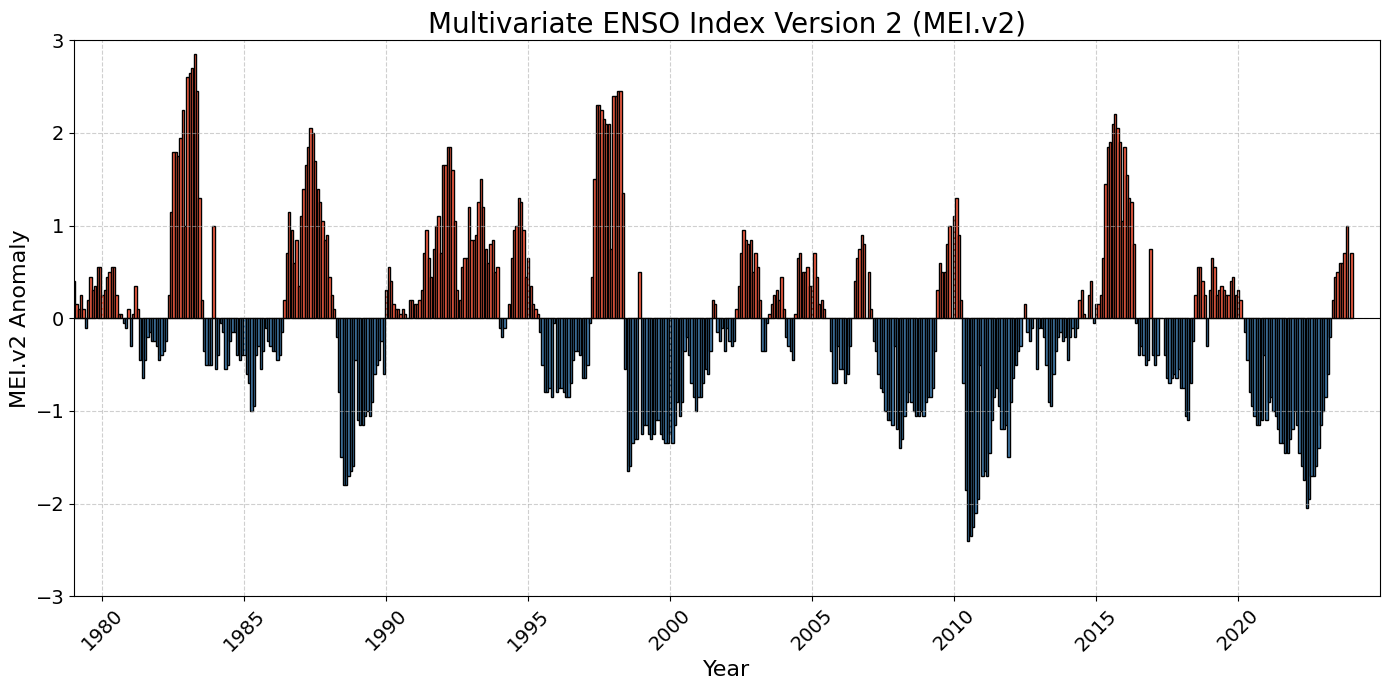

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the interpolated monthly MEI.v2 data
file_path = 'monthly_mei_v2.csv'  # Replace with your actual file path
mei_df = pd.read_csv(file_path)

# Set up the figure and axis
plt.figure(figsize=(14, 7))

# Plot the MEI.v2 anomalies with improved color shades
colors = ['#ff6347' if val > 0 else '#4682b4' for val in mei_df['MEI.v2']]
plt.bar(mei_df['Year'] + (mei_df['Month'] - 1) / 12, mei_df['MEI.v2'], color=colors, edgecolor='black', width=0.08)

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=0.8)

# Add title and labels with increased font sizes
plt.title('Multivariate ENSO Index Version 2 (MEI.v2)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('MEI.v2 Anomaly', fontsize=16)

# Customize tick parameters for readability
plt.xticks(range(1980, 2025, 5), fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Set grid and layout
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust x-axis limits and y-axis limits
plt.xlim(1979, 2025)
plt.ylim(-3, 3)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


# 6.1 Plotting Smoothed Precipitation Anomaly along with ENSO
## Plotting smoothed precipitation against ENSO anomaly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the smoothed anomalies and MEI.v2 data are saved
smoothed_anomalies_dir = 'smoothed_anomalies_plots'  # Directory where smoothed anomalies CSV files are saved
mei_file_path = 'monthly_mei_v2.csv'  # Replace with your actual MEI.v2 file path

# Load the MEI.v2 data
mei_df = pd.read_csv(mei_file_path)

# Filter MEI.v2 data to include only 1998 to 2019
mei_df = mei_df[(mei_df['Year'] >= 1998) & (mei_df['Year'] <= 2019)]

# Convert the MEI.v2 data to datetime for plotting
mei_df['Date'] = pd.to_datetime(mei_df[['Year', 'Month']].assign(Day=1))

# Function to load smoothed anomalies and plot them with MEI.v2
def plot_smoothed_anomalies_with_mei(region):
    # Load the smoothed anomalies data for the region
    smoothed_csv_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_precipitation_anomalies.csv')
    smoothed_anomalies = pd.read_csv(smoothed_csv_filename)

    # Convert date for precise plotting on the x-axis
    smoothed_anomalies['Date'] = pd.to_datetime(smoothed_anomalies[['Year', 'Month']].assign(Day=1))

    # Merge smoothed anomalies and MEI.v2 data based on Date
    merged_df = pd.merge(smoothed_anomalies, mei_df[['Date', 'MEI.v2']], on='Date', how='inner')

    # Plotting the smoothed anomalies and MEI.v2 together
    plt.figure(figsize=(14, 7))

    # Plotting smoothed precipitation anomaly
    ax1 = plt.gca()
    ax1.plot(merged_df['Date'], merged_df['Anomaly_Smoothed'], color='red', label='Smoothed Precipitation Anomaly')
    ax1.set_xlabel('Year', fontsize=16)
    ax1.set_ylabel('Smoothed Precipitation Anomaly (mm/hr)', fontsize=16, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')

    # Create a secondary y-axis for MEI.v2
    ax2 = ax1.twinx()
    ax2.plot(merged_df['Date'], merged_df['MEI.v2'], color='blue', label='MEI.v2 Anomaly')
    ax2.set_ylabel('MEI.v2 Anomaly', fontsize=16, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')

    # Adding legends
    ax1.legend(loc='upper left', fontsize=14)
    ax2.legend(loc='upper right', fontsize=14)

    # Set title and layout
    plt.title(f'Smoothed Precipitation Anomaly and MEI.v2 for {region} (1998-2019)', fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save the combined plot
    plot_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_anomalies_and_mei_v2.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f'Saved combined plot of smoothed anomalies and MEI.v2 for {region}: {plot_filename}')

# Generate combined plots for each region using saved smoothed anomalies and MEI.v2 data
for region in regions:
    print(f'Plotting smoothed precipitation anomalies with MEI.v2 for {region}...')
    plot_smoothed_anomalies_with_mei(region)


Plotting smoothed precipitation anomalies with MEI.v2 for North India...
Saved combined plot of smoothed anomalies and MEI.v2 for North India: smoothed_anomalies_plots\North India_smoothed_anomalies_and_mei_v2.png
Plotting smoothed precipitation anomalies with MEI.v2 for Central India...
Saved combined plot of smoothed anomalies and MEI.v2 for Central India: smoothed_anomalies_plots\Central India_smoothed_anomalies_and_mei_v2.png
Plotting smoothed precipitation anomalies with MEI.v2 for South India...
Saved combined plot of smoothed anomalies and MEI.v2 for South India: smoothed_anomalies_plots\South India_smoothed_anomalies_and_mei_v2.png
Plotting smoothed precipitation anomalies with MEI.v2 for Thailand...
Saved combined plot of smoothed anomalies and MEI.v2 for Thailand: smoothed_anomalies_plots\Thailand_smoothed_anomalies_and_mei_v2.png
Plotting smoothed precipitation anomalies with MEI.v2 for Indonesia...
Saved combined plot of smoothed anomalies and MEI.v2 for Indonesia: smoothed

## Correlation coefficient between ENSO time series and smoothed anomalies.
##### The correlation coefficient measures the strength and direction of a linear relationship between two variables. In our context, it helps us understand how closley the ENSO index is related to the precipitation anomalies in various regions
##### We use pearson correlation coefficinet beacuse it specifically measures linear relationships, which is what we're interested in here. It tells us how well a straight line can describe the relationship between the ENSO index and precipitation anomalies. 
##### The pearson correlation coefficient (r) is calculated using the following steps:
1. Compute the mean of both the ENSO index (MEI.v2) and the precipitation anomalies.
2. For each data point, subtract the mean of the respective variable.
3. Multiply the deviations of the two variables for each data point.
4. sum all the products of deviations.
5. Square the deviations for each variable separately and sum them.
6. Divide the sum of the product of deviations by the square root of the product of the summed squared deviations.

##### In our actual dataset, we have monthly data for multiple years for different regions. The above mentioned steps are applied programmatically to calculate the correlation coefficient between MEI.v2 index and precipitation anomalies for each region. 

# 6.2 Correlation Coefficient between ENSO and Precipitation Anomalies

          Region  Correlation Coefficient
0    North India                -0.328083
1  Central India                -0.160705
2    South India                -0.327154
3       Thailand                -0.553300
4      Indonesia                -0.744989
5       Malaysia                -0.744144
Correlation coefficients saved to 'the_correlation_coefficients.csv'


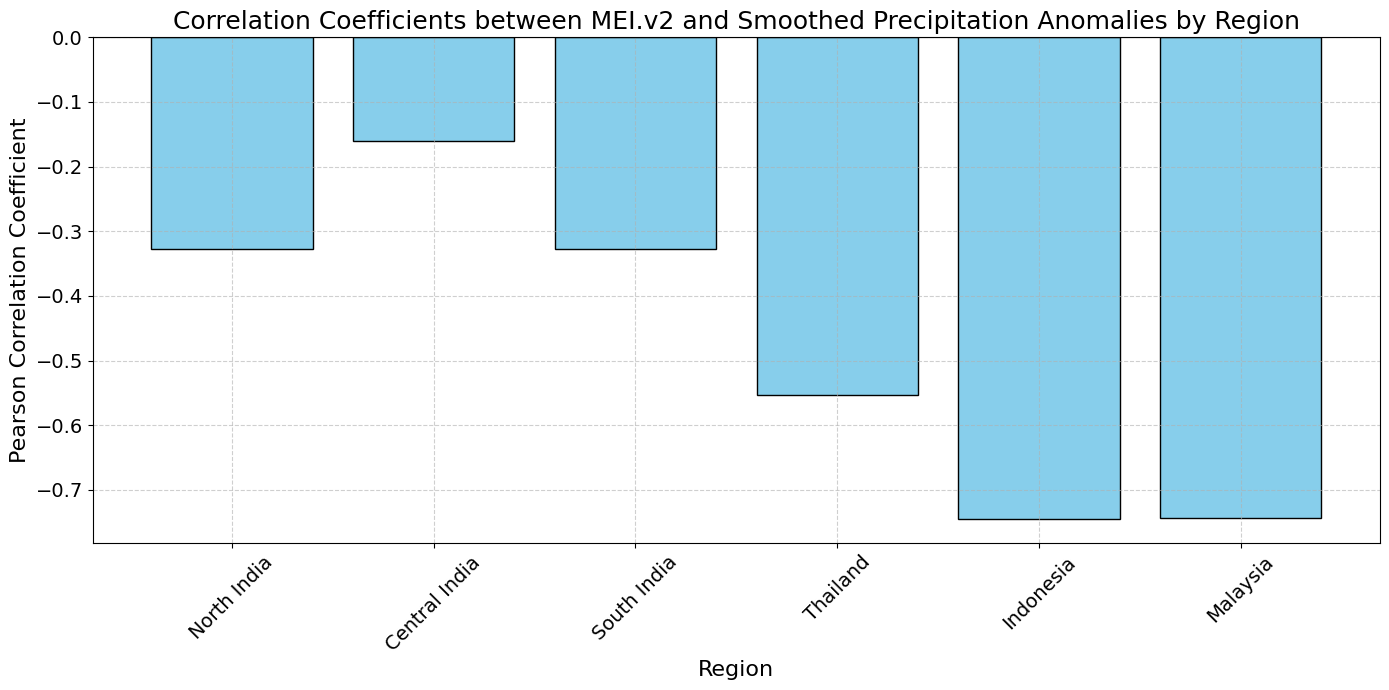

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the smoothed anomalies and MEI.v2 data are saved
smoothed_anomalies_dir = 'smoothed_anomalies_plots'  # Directory where smoothed anomalies CSV files are saved
mei_file_path = 'monthly_mei_v2.csv'  # Replace with your actual MEI.v2 file path

# Load the MEI.v2 data
svt_mei = pd.read_csv(mei_file_path)

# Filter MEI.v2 data to include only 1998 to 2019
svt_mei = svt_mei[(svt_mei['Year'] >= 1998) & (svt_mei['Year'] <= 2019)]

# Convert the MEI.v2 data to datetime for merging
svt_mei['Date'] = pd.to_datetime(svt_mei[['Year', 'Month']].assign(Day=1))

# Dictionary to store correlation coefficients
correlation_dict = {}

# Calculate the Pearson correlation coefficient for each region
for region in regions:
    # Load the smoothed anomalies data for the region
    smoothed_csv_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_precipitation_anomalies.csv')
    smoothed_anomalies = pd.read_csv(smoothed_csv_filename)

    # Convert date for precise merging
    smoothed_anomalies['Date'] = pd.to_datetime(smoothed_anomalies[['Year', 'Month']].assign(Day=1))

    # Merge smoothed anomalies and MEI.v2 data based on Date
    merged_df = pd.merge(smoothed_anomalies, svt_mei[['Date', 'MEI.v2']], on='Date', how='inner')

    # Calculate the Pearson correlation coefficient
    correlation = merged_df['MEI.v2'].corr(merged_df['Anomaly_Smoothed'])
    correlation_dict[region] = correlation

# Create a DataFrame to display the results
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Region', 'Correlation Coefficient'])

# Display the DataFrame
print(correlation_df)

# Save the correlation coefficients to a CSV file
correlation_df.to_csv('the_correlation_coefficients.csv', index=False)
print("Correlation coefficients saved to 'the_correlation_coefficients.csv'")

# Plot the correlation coefficients
plt.figure(figsize=(14, 7))
plt.bar(correlation_df['Region'], correlation_df['Correlation Coefficient'], color='skyblue', edgecolor='black')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Pearson Correlation Coefficient', fontsize=16)
plt.title('Correlation Coefficients between MEI.v2 and Smoothed Precipitation Anomalies by Region', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the smoothed anomalies and MEI.v2 data are saved
smoothed_anomalies_dir = 'smoothed_anomalies_plots'  # Directory where smoothed anomalies CSV files are saved
mei_file_path = 'monthly_mei_v2.csv'  # Replace with your actual MEI.v2 file path

# Load the MEI.v2 data
svt_mei = pd.read_csv(mei_file_path)

# Filter MEI.v2 data to include only 1998 to 2019
svt_mei = svt_mei[(svt_mei['Year'] >= 1998) & (svt_mei['Year'] <= 2019)]

# Convert the MEI.v2 data to datetime for merging
svt_mei['Date'] = pd.to_datetime(svt_mei[['Year', 'Month']].assign(Day=1))

# Dictionary to store correlation coefficients and p-values
correlation_dict = {}
p_value_dict = {}

# Calculate the Pearson correlation coefficient and p-value for each region
for region in regions:
    # Load the smoothed anomalies data for the region
    smoothed_csv_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_precipitation_anomalies.csv')
    smoothed_anomalies = pd.read_csv(smoothed_csv_filename)

    # Convert date for precise merging
    smoothed_anomalies['Date'] = pd.to_datetime(smoothed_anomalies[['Year', 'Month']].assign(Day=1))

    # Merge smoothed anomalies and MEI.v2 data based on Date
    merged_df = pd.merge(smoothed_anomalies, svt_mei[['Date', 'MEI.v2']], on='Date', how='inner')

    # Calculate the Pearson correlation coefficient
    r = merged_df['MEI.v2'].corr(merged_df['Anomaly_Smoothed'])
    correlation_dict[region] = r

    # Calculate the t-statistic
    n = len(merged_df)
    t_stat = r * (n - 2)**0.5 / (1 - r**2)**0.5

    # Calculate the p-value using the t-distribution
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-2))
    p_value_dict[region] = p_value

    # Determine significance at 95% and 99% confidence levels
    significance_95 = p_value < 0.05
    significance_99 = p_value < 0.01

    print(f"{region}: r = {r:.3f}, p-value = {p_value:.3f}, Significant at 95%: {significance_95}, Significant at 99%: {significance_99}")

# Create a DataFrame to display the results
correlation_df = pd.DataFrame({
    'Region': list(correlation_dict.keys()),
    'Correlation Coefficient': list(correlation_dict.values()),
    'p-value': list(p_value_dict.values())
})

# Display the DataFrame
print(correlation_df)

# Save the correlation coefficients and p-values to a CSV file
correlation_df.to_csv('correlation_coefficients_with_p_values.csv', index=False)
print("Correlation coefficients and p-values saved to 'correlation_coefficients_with_p_values.csv'")


North India: r = -0.328, p-value = 0.000, Significant at 95%: True, Significant at 99%: True
Central India: r = -0.161, p-value = 0.009, Significant at 95%: True, Significant at 99%: True
South India: r = -0.327, p-value = 0.000, Significant at 95%: True, Significant at 99%: True
Thailand: r = -0.553, p-value = 0.000, Significant at 95%: True, Significant at 99%: True
Indonesia: r = -0.745, p-value = 0.000, Significant at 95%: True, Significant at 99%: True
Malaysia: r = -0.744, p-value = 0.000, Significant at 95%: True, Significant at 99%: True
          Region  Correlation Coefficient       p-value
0    North India                -0.328083  4.836634e-08
1  Central India                -0.160705  8.902376e-03
2    South India                -0.327154  5.302721e-08
3       Thailand                -0.553300  0.000000e+00
4      Indonesia                -0.744989  0.000000e+00
5       Malaysia                -0.744144  0.000000e+00
Correlation coefficients and p-values saved to 'correlat

##### The analysis of the correlation between the smoothed precipitation anomalies and the MEI.v2 index across the six regions—North India, Central India, South India, Thailand, Indonesia, and Malaysia—indicates a consistent pattern of negative correlation coefficients.

##### The negative correlation coefficients between the MEI.v2 index (representing ENSO phases) and the precipitation anomalies suggest that when ENSO events are strong (either El Niño or La Niña), the precipitation patterns in these regions tend to be opposite in behavior. For example, during El Niño events, there is a tendency for below-average rainfall in these regions, and during La Niña events, there is typically above-average rainfall.

##### India (North, Central, South): The negative correlation indicates that ENSO significantly impacts India's precipitation patterns, aligning with known effects where El Niño tends to cause droughts or reduced monsoon rainfall in India, and La Niña enhances monsoon activity. 
##### Southeast Asia (Thailand, Indonesia, Malaysia): The observed strong negative correlations, especially in Indonesia and Malaysia, indicate a robust ENSO influence. During El Niño, these regions often experience drier conditions, while La Niña usually brings wetter-than-average conditions.

##### From the plotted time series, the peaks and troughs of the MEI.v2 index and the precipitation anomalies often mirror each other in opposite directions, reinforcing the negative correlation observed statistically. This further solidifies the visual evidence that ENSO affects precipitation in these regions.

##### The consistent patterns observed over multiple years and the strength of the correlations provide solid evidence that ENSO is a key climate driver influencing rainfall in these areas. While these correlations do not establish causation, the alignment with established climatological knowledge about ENSO impacts supports the conclusion.

##### Seasonal analyses could further refine understanding by showing how specific phases of ENSO affect seasonal precipitation differently.

##### A negative correlation does not mean that ENSO has no effect; rather, it suggests that the ENSO index and precipitation anomalies move in opposite directions. For example, a strong El Niño (positive MEI.v2) often leads to drought or reduced rainfall in regions like Indonesia and Southeast Asia, which aligns with negative correlation values.

##### A negative correlation coefficient means that as one variable increases, the other tends to decrease. In your case, a negative correlation between MEI.v2 (ENSO) and precipitation anomalies implies that when MEI.v2 values are high (El Niño), precipitation anomalies tend to be low (reduced rainfall), and when MEI.v2 values are low (La Niña), precipitation anomalies tend to be high (increased rainfall).

##### The negative correlation confirms that ENSO (El Niño and La Niña events) significantly impacts the precipitation patterns in your regions. This fits the broader understanding that El Niño typically reduces rainfall in Southeast Asia, India, and surrounding regions, while La Niña tends to enhance rainfall.

##### The negative correlation coefficients validate ENSO's significant but inverse impact on regional precipitation, as expected based on known climate science. 

# 6.2.1: ENSO  Seasonal Correlation Coefficient

Region: North India, Number of DJF points: 66
Region: Central India, Number of DJF points: 66
Region: South India, Number of DJF points: 66
Region: Thailand, Number of DJF points: 66
Region: Indonesia, Number of DJF points: 66
Region: Malaysia, Number of DJF points: 66
          Region  DJF Correlation Coefficient
0    North India                     0.396964
1  Central India                     0.130382
2    South India                    -0.221051
3       Thailand                    -0.543576
4      Indonesia                    -0.717252
5       Malaysia                    -0.751909
DJF correlation coefficients saved to 'the_djf_correlation_coefficients.csv'


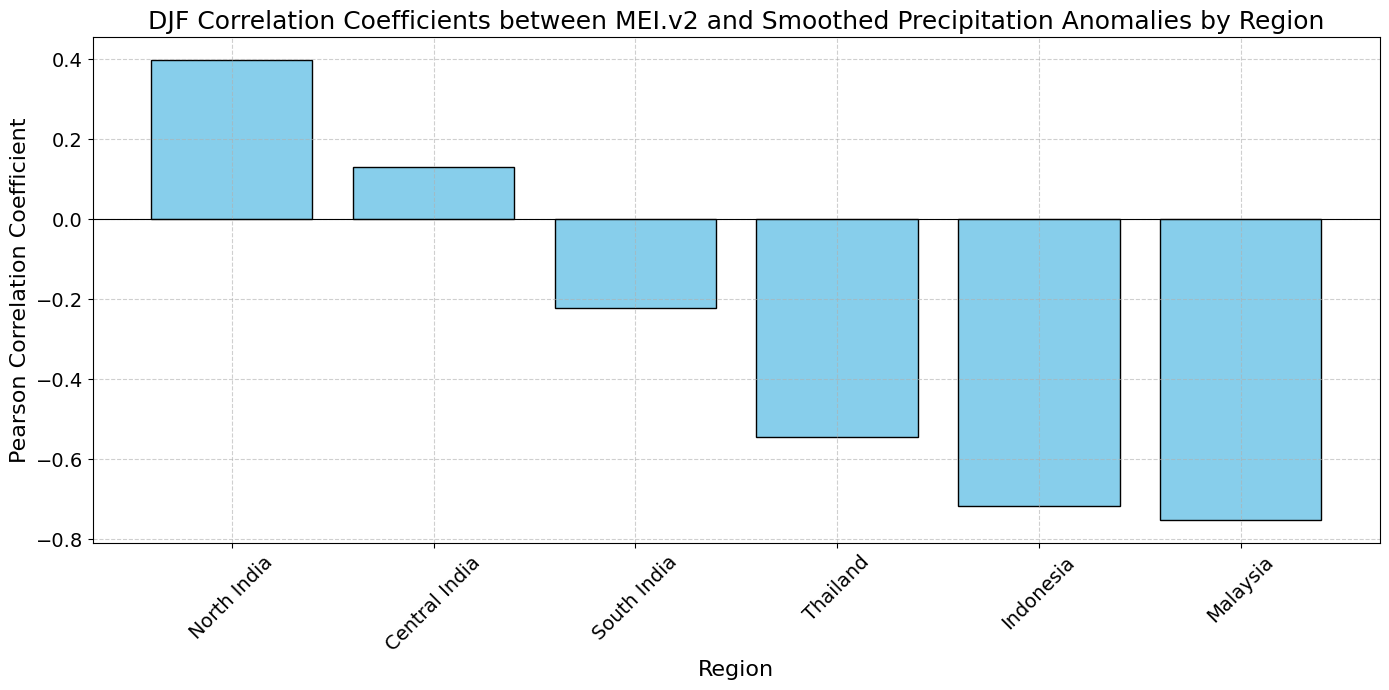

Region: North India, Number of MAM points: 66
Region: Central India, Number of MAM points: 66
Region: South India, Number of MAM points: 66
Region: Thailand, Number of MAM points: 66
Region: Indonesia, Number of MAM points: 66
Region: Malaysia, Number of MAM points: 66
          Region  MAM Correlation Coefficient
0    North India                     0.095294
1  Central India                    -0.071885
2    South India                    -0.449359
3       Thailand                    -0.758701
4      Indonesia                    -0.512826
5       Malaysia                    -0.755034
MAM correlation coefficients saved to 'the_mam_correlation_coefficients.csv'


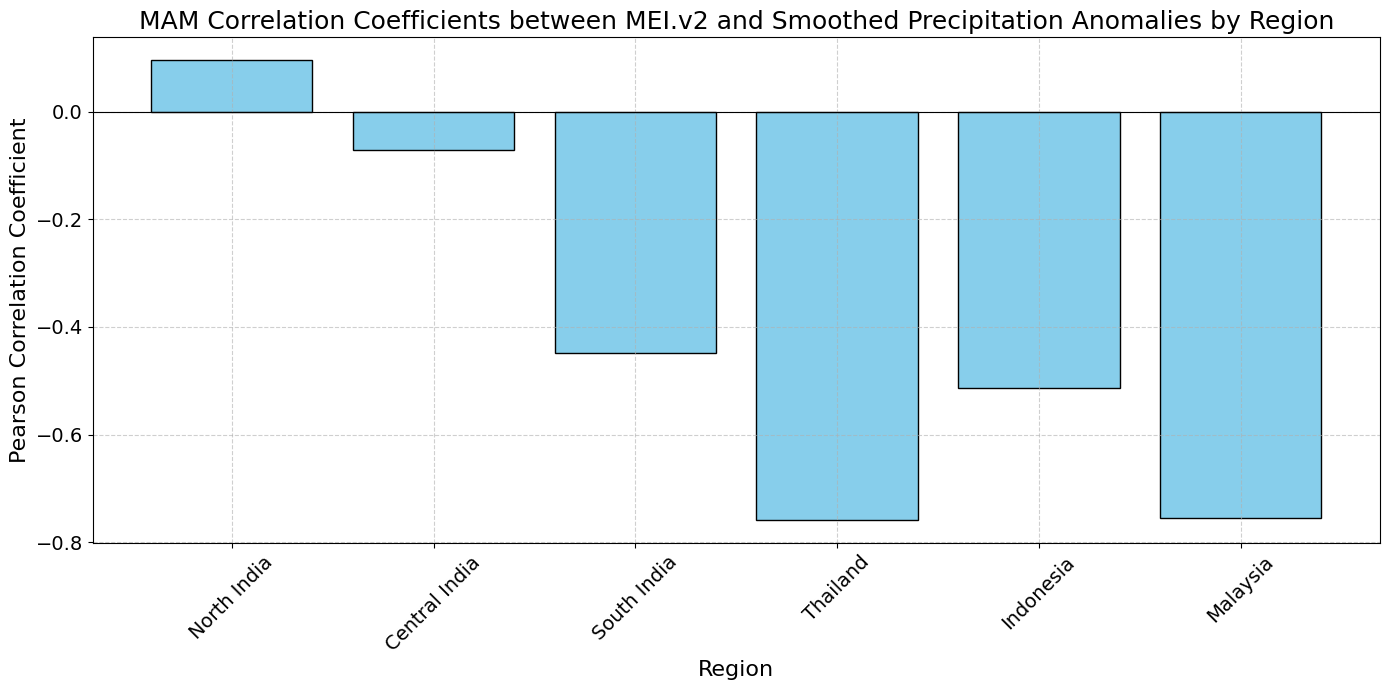

Region: North India, Number of JJA points: 66
Region: Central India, Number of JJA points: 66
Region: South India, Number of JJA points: 66
Region: Thailand, Number of JJA points: 66
Region: Indonesia, Number of JJA points: 66
Region: Malaysia, Number of JJA points: 66
          Region  JJA Correlation Coefficient
0    North India                    -0.664237
1  Central India                    -0.179025
2    South India                    -0.550106
3       Thailand                    -0.288110
4      Indonesia                    -0.829486
5       Malaysia                    -0.751713
JJA correlation coefficients saved to 'the_jja_correlation_coefficients.csv'


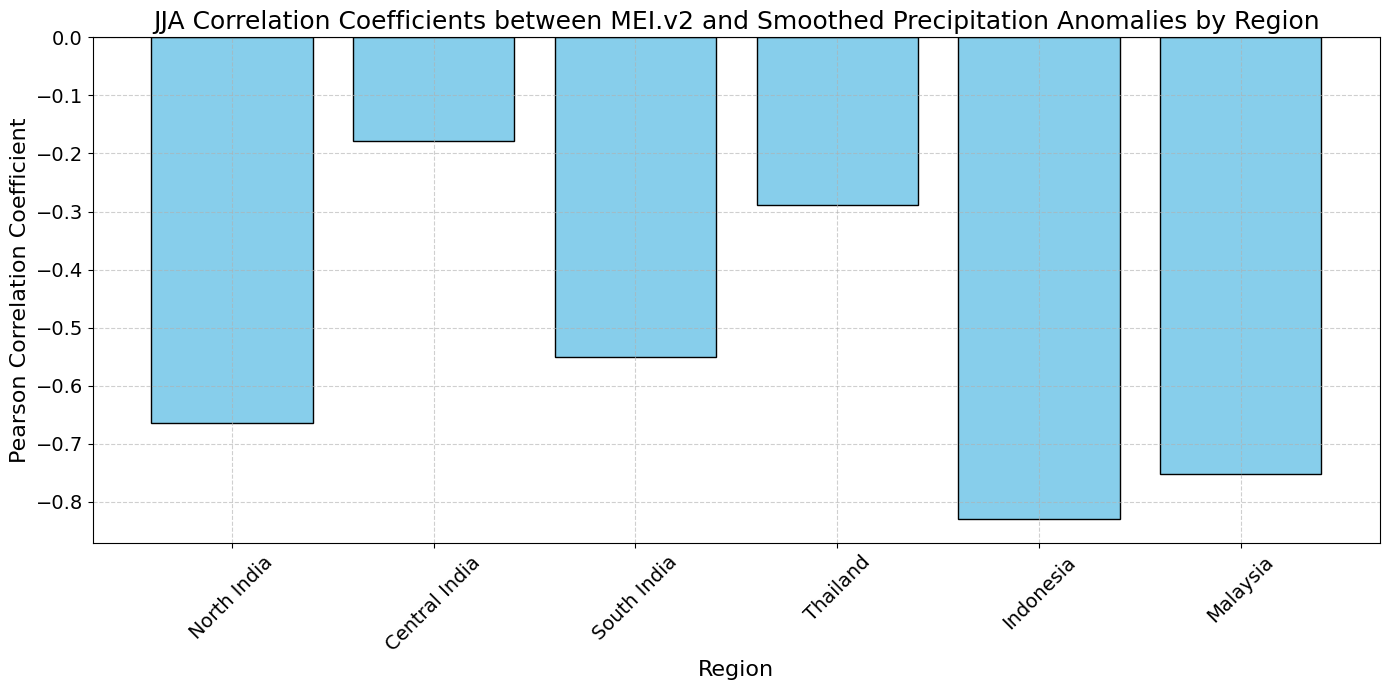

Region: North India, Number of SON points: 66
Region: Central India, Number of SON points: 66
Region: South India, Number of SON points: 66
Region: Thailand, Number of SON points: 66
Region: Indonesia, Number of SON points: 66
Region: Malaysia, Number of SON points: 66
          Region  SON Correlation Coefficient
0    North India                    -0.631246
1  Central India                    -0.278172
2    South India                    -0.222883
3       Thailand                    -0.575363
4      Indonesia                    -0.843472
5       Malaysia                    -0.764057
SON correlation coefficients saved to 'the_son_correlation_coefficients.csv'


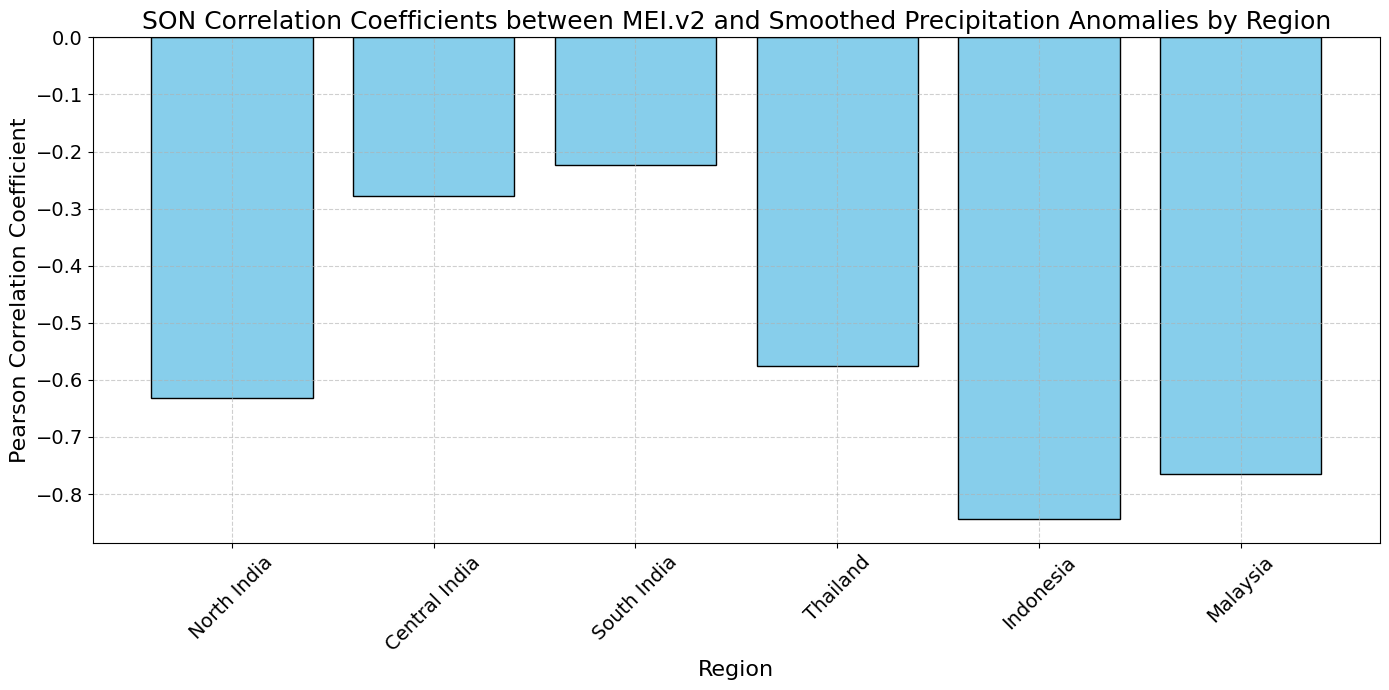

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the smoothed anomalies and MEI.v2 data are saved
smoothed_anomalies_dir = 'smoothed_anomalies_plots'  # Directory where smoothed anomalies CSV files are saved
mei_file_path = 'monthly_mei_v2.csv'  # Replace with your actual MEI.v2 file path

# Load the MEI.v2 data
svt_mei = pd.read_csv(mei_file_path)

# Filter MEI.v2 data to include only 1998 to 2019
svt_mei = svt_mei[(svt_mei['Year'] >= 1998) & (svt_mei['Year'] <= 2019)]

# Convert the MEI.v2 data to datetime for merging
svt_mei['Date'] = pd.to_datetime(svt_mei[['Year', 'Month']].assign(Day=1))

# Define seasons and their corresponding months
seasons = {
    'DJF': [12, 1, 2],
    'MAM': [3, 4, 5
    'JJA': [6, 7, 8],
    'SON': [9, 10, 11]
}

# Function to calculate and plot correlation coefficients for a given season
def calculate_and_plot_correlation(season_name, months):
    season_correlation_dict = {}

    # Iterate over each region to calculate the seasonal correlation coefficient
    for region in regions:
        # Load the smoothed anomalies data for the region
        smoothed_csv_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_precipitation_anomalies.csv')
        smoothed_anomalies = pd.read_csv(smoothed_csv_filename)

        # Convert date for precise merging
        smoothed_anomalies['Date'] = pd.to_datetime(smoothed_anomalies[['Year', 'Month']].assign(Day=1))

        # Merge smoothed anomalies and MEI.v2 data based on Date
        merged_df = pd.merge(smoothed_anomalies, svt_mei[['Date', 'MEI.v2']], on='Date', how='inner')

        # Filter the merged data for the specified season months
        season_df = merged_df[merged_df['Month'].isin(months)]

        # Print the number of points for each region
        print(f"Region: {region}, Number of {season_name} points: {len(season_df)}")

        # Calculate the Pearson correlation coefficient for the season
        correlation = season_df['MEI.v2'].corr(season_df['Anomaly_Smoothed'])
        season_correlation_dict[region] = correlation

    # Create a DataFrame to display the results
    season_correlation_df = pd.DataFrame(list(season_correlation_dict.items()), columns=['Region', f'{season_name} Correlation Coefficient'])

    # Display the DataFrame
    print(season_correlation_df)

    # Save the correlation coefficients to a CSV file
    season_correlation_df.to_csv(f'the_{season_name.lower()}_correlation_coefficients.csv', index=False)
    print(f"{season_name} correlation coefficients saved to 'the_{season_name.lower()}_correlation_coefficients.csv'")

    # Plot the correlation coefficients for the season
    plt.figure(figsize=(14, 7))
    plt.bar(season_correlation_df['Region'], season_correlation_df[f'{season_name} Correlation Coefficient'], color='skyblue', edgecolor='black')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.xlabel('Region', fontsize=16)
    plt.ylabel('Pearson Correlation Coefficient', fontsize=16)
    plt.title(f'{season_name} Correlation Coefficients between MEI.v2 and Smoothed Precipitation Anomalies by Region', fontsize=18)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Calculate and plot for each season
for season_name, months in seasons.items():
    calculate_and_plot_correlation(season_name, months)


##### The seasonal correlation coefficients between the ENSO (MEI.v2 index) and the smoothed precipitation anomalies across the regions provide a deeper insight into how ENSO influences rainfall patterns on a seasonal basis.

##### North India (0.396): Positive correlation indicates that during DJF, ENSO has a moderate influence, potentially enhancing precipitation during positive ENSO phases (El Niño). This is unusual since El Niño often leads to drier conditions, suggesting complex interactions in this season.

##### Central India (0.130): Weak positive correlation, suggesting minimal ENSO impact during DJF.

##### South India, Thailand, Indonesia, Malaysia: All regions, especially Thailand (-0.544), Indonesia (-0.717), and Malaysia (-0.752), show negative correlations, indicating that El Niño leads to reduced precipitation during DJF, while La Niña increases rainfall. This aligns with known patterns where Southeast Asia and the western Pacific face droughts during El Niño.

#####  the influence of IOD (Indian Ocean Dipole) can indeed interfere with or modify the effects of ENSO on precipitation patterns in India, particularly in the cases where the expected correlations between ENSO and rainfall do not match typical patterns. 

##### If the IOD is in a positive phase (warmer waters in the western Indian Ocean and cooler in the east), it can enhance convection and rainfall over India, even during El Niño conditions. The positive IOD can counteract the drying influence of El Niño, leading to enhanced rainfall in Northern India during DJF, as seen in the moderate positive correlation. IOD’s impact tends to be more localized over the Indian Ocean region, and its influence can sometimes dominate or modify the impact of ENSO, particularly in the western and northern parts of India. 

##### Similar to North India, a positive IOD can bring enhanced rainfall during DJF, even when ENSO conditions might suggest a drier scenario. When both ENSO and IOD are active, their combined effects can sometimes lead to complex and less predictable weather patterns, with IOD potentially mitigating or enhancing the rainfall depending on its phase.

##### ENSO exerts a more direct influence on Southeast Asia and the Pacific regions due to proximity to the central and eastern Pacific Ocean, where the El Niño/La Niña effects are most pronounced. India, being further away, experiences ENSO's influence through atmospheric teleconnections, which can be weaker or modulated by other regional climate drivers like IOD.

##### During years when ENSO and IOD are in opposite phases (El Niño and positive IOD), their impacts on Indian rainfall can partly cancel each other out, leading to unpredictable or altered precipitation patterns.

##### Very weak positive correlation, indicating little to no significant ENSO influence during this pre-monsoon season.
##### These regions show strong negative correlations, suggesting ENSO's substantial influence in reducing precipitation during El Niño, especially in Thailand and Malaysia, which face drought conditions during this season.

##### North India (-0.664): Strong negative correlation, indicating ENSO significantly reduces monsoon rainfall during El Niño. This aligns with the well-documented impact of ENSO on weakening the Indian monsoon.

##### South India (-0.550) and Indonesia (-0.829): The strongest negative impact of ENSO occurs in Indonesia, where the dry conditions during JJA are exacerbated during El Niño.

##### Thailand and Malaysia: Both regions continue to show substantial negative correlations, suggesting reduced rainfall during El Niño, impacting agriculture and water resources.

##### North India (-0.631): Negative correlation continues into the post-monsoon season, suggesting ongoing ENSO influence, particularly in weakening retreating monsoon patterns.

##### Indonesia (-0.843) and Malaysia (-0.764): The strongest correlations suggest ENSO's substantial effect in reducing rainfall during SON, impacting these regions' secondary monsoon or transitional rainfall patterns.

##### South India, Central India, and Thailand: Show negative correlations, reinforcing that the ENSO signal predominantly disrupts precipitation patterns, leading to drier conditions during El Niño.

#### In India: ENSO particularly affects the monsoon and post-monsoon periods (JJA, SON), with El Niño events correlating with reduced rainfall, which aligns with the broader understanding of ENSO's impact on the Indian monsoon system.

#### In Southeast Asia (Thailand, Indonesia, Malaysia): ENSO impacts are most pronounced in DJF, MAM, and SON, often leading to droughts and reduced rainfall during El Niño events, severely impacting water resources and agriculture.

#### These findings confirm that ENSO's climate signal plays a crucial role in modulating precipitation patterns seasonally across these regions, emphasizing the need for adaptive strategies in water management and agriculture to mitigate ENSO's impacts.

## Indian Ocean Dipole (DMI) 
##### The Dipole mode Index (DMI) is used to quantify the IOD. It is calculated as the difference between the sea surface temperature (SST) anomalies of two regions: 
a.	Western Indian Ocean: 10˚S to 10˚N, 50˚E to 70˚E
b.	Eastern Indian Ocean: 10˚S to 0˚, 90˚E to 110˚E
##### DMI = SST anomaly (western) – SST anomaly (eastern) 
##### The data appear to be monthly DMI values from 1870 to 2024. The values are anomalies, which means they represent the deviation from the long-term average SST for those regions.
##### The first column represent the year.
##### The following twelve columns represent the monthly DMI values from January to December for that year.
##### A value of -9999.00 is used to indicate missing data. 
##### Positive values of the DMI indicate a positive IOD event. 
##### Negative values indicate a negative IOD event. 
##### For the year 2023, the DMI is positive for all months, indicating a persistent positive IOD event throughout the year. 
##### The year 1874, DMI is negative for all months, indicating a persistent negative IOD event throughout the year. 
##### The DMI is a critical index for understanding and monitoring the IOD, and it provides valuable insights into the climatic interactions between the Indian ocean and the surrounding landmasses. 


# 2.5 Plotting DMI index Anomaly 

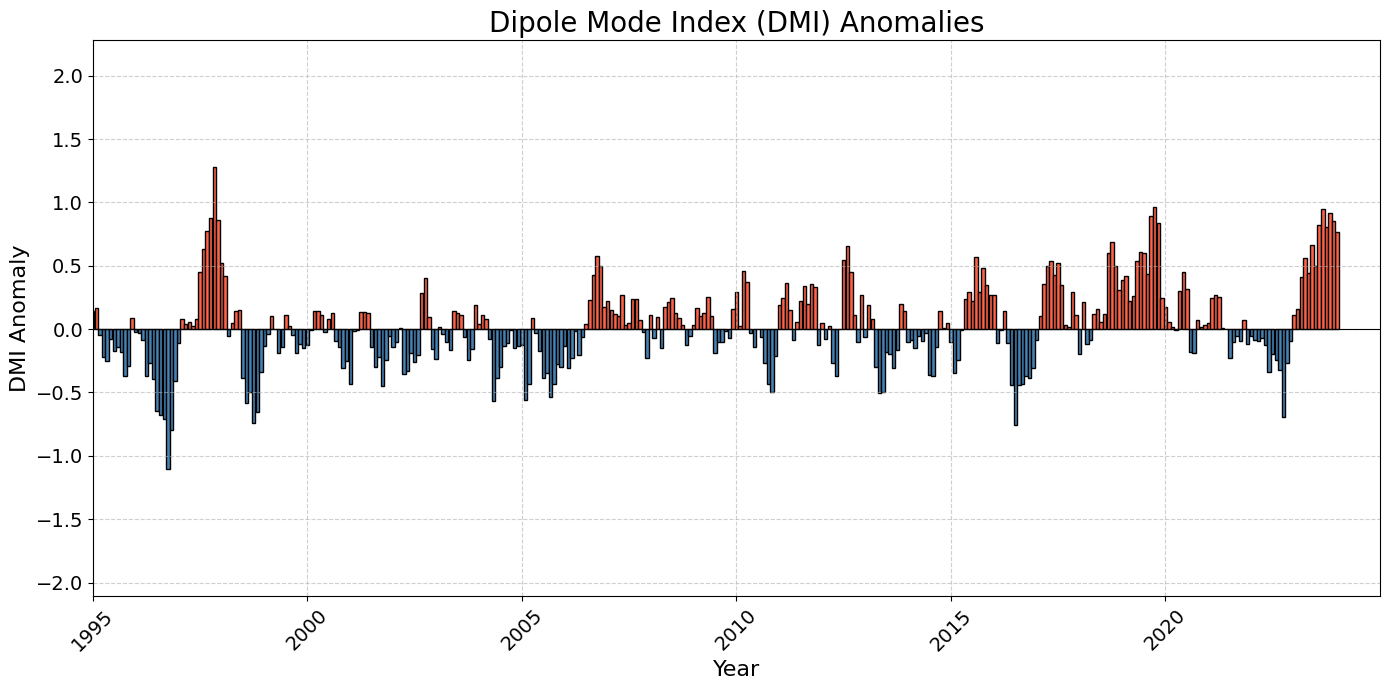

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Pooja\mon_data1\DMI index org.csv'  # Replace with your actual file path
dmi_df = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
dmi_df.columns = dmi_df.columns.str.strip()

# Melt the DataFrame to have a single column for the month
dmi_df = pd.melt(dmi_df, id_vars=['Year'], var_name='Month', value_name='DMI')

# Convert the month names to numbers for easier plotting
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dmi_df['Month'] = dmi_df['Month'].apply(lambda x: month_to_num[x])

# Remove rows with missing values (assuming -9999.000 is used for missing values)
dmi_df = dmi_df[dmi_df['DMI'] != -9999.000]

# Filter the data to include only from 1995 onwards
dmi_df = dmi_df[dmi_df['Year'] >= 1995]

# Set up the figure and axis
plt.figure(figsize=(14, 7))

# Plot the DMI anomalies with improved color shades
colors = ['#ff6347' if val > 0 else '#4682b4' for val in dmi_df['DMI']]
plt.bar(dmi_df['Year'] + (dmi_df['Month'] - 1) / 12, dmi_df['DMI'], color=colors, edgecolor='black', width=0.08)

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=0.8)

# Add title and labels with increased font sizes
plt.title('Dipole Mode Index (DMI) Anomalies', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('DMI Anomaly', fontsize=16)

# Set grid and layout
plt.grid(True, linestyle='--', alpha=0.6)

# Customize x-axis with larger tick labels
plt.xticks(range(1995, 2025, 5), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(1995, 2025)
plt.ylim(dmi_df['DMI'].min() - 1, dmi_df['DMI'].max() + 1)

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


##  7.1 Plotting Smoothed Precipitation Anomaly with IOD

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the smoothed anomalies and DMI data are saved
smoothed_anomalies_dir = 'smoothed_anomalies_plots'  # Directory where smoothed anomalies CSV files are saved
dmi_file_path = r'C:\Users\Pooja\mon_data1\DMI index org.csv'  # Replace with your actual DMI file path

# Load the DMI data
dmi_df = pd.read_csv(dmi_file_path)

# Strip any leading/trailing spaces from column names
dmi_df.columns = dmi_df.columns.str.strip()

# Melt the DataFrame to have a single column for the month
dmi_df = pd.melt(dmi_df, id_vars=['Year'], var_name='Month', value_name='DMI')

# Convert the month names to numbers for easier plotting
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dmi_df['Month'] = dmi_df['Month'].apply(lambda x: month_to_num[x])

# Remove rows with missing values (assuming -9999.000 is used for missing values)
dmi_df = dmi_df[dmi_df['DMI'] != -9999.000]

# Convert the DMI data to datetime for merging
dmi_df['Date'] = pd.to_datetime(dmi_df[['Year', 'Month']].assign(Day=1))

# Create directory to save the final images
output_dir = r'C:\Users\Pooja\Jup_Not\dmi_smoothed'
os.makedirs(output_dir, exist_ok=True)

# Function to plot smoothed anomalies with DMI for each region
def plot_smoothed_anomalies_with_dmi(region):
    # Load the smoothed anomalies data for the region
    smoothed_csv_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_precipitation_anomalies.csv')
    smoothed_anomalies = pd.read_csv(smoothed_csv_filename)

    # Convert date for precise plotting on the x-axis
    smoothed_anomalies['Date'] = pd.to_datetime(smoothed_anomalies[['Year', 'Month']].assign(Day=1))

    # Merge smoothed anomalies and DMI data based on Date
    merged_df = pd.merge(smoothed_anomalies, dmi_df[['Date', 'DMI']], on='Date', how='inner')

    # Plotting the smoothed anomalies and DMI together
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plotting smoothed precipitation anomaly
    color = 'tab:red'
    ax1.set_xlabel('Year', fontsize=16)
    ax1.set_ylabel('Smoothed Precipitation Anomaly (mm/hr)', fontsize=16, color=color)
    ax1.plot(merged_df['Date'], merged_df['Anomaly_Smoothed'], color=color, label='Smoothed Precipitation Anomaly')
    ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.axhline(0, color='black', linewidth=0.8)

    # Create a secondary y-axis for DMI
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('DMI Anomaly', fontsize=16, color=color)
    ax2.plot(merged_df['Date'], merged_df['DMI'], color=color, label='DMI Anomaly')
    ax2.tick_params(axis='y', labelcolor=color, labelsize=14)
    ax2.axhline(0, color='black', linewidth=0.8)

    # Set title and layout
    plt.title(f'Smoothed Precipitation Anomaly and DMI for {region} (1998-2019)', fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.6)
    fig.tight_layout()  # Adjust the layout

    # Save the figure
    output_filename = os.path.join(output_dir, f'{region}_smoothed_anomalies_and_dmi.png')
    plt.savefig(output_filename, dpi=300)
    plt.close()

    print(f'Saved plot for {region} to {output_filename}')

# Generate combined plots for each region using saved smoothed anomalies and DMI data
for region in regions:
    print(f'Plotting smoothed precipitation anomalies with DMI for {region}...')
    plot_smoothed_anomalies_with_dmi(region)


Plotting smoothed precipitation anomalies with DMI for North India...
Saved plot for North India to C:\Users\Pooja\Jup_Not\dmi_smoothed\North India_smoothed_anomalies_and_dmi.png
Plotting smoothed precipitation anomalies with DMI for Central India...
Saved plot for Central India to C:\Users\Pooja\Jup_Not\dmi_smoothed\Central India_smoothed_anomalies_and_dmi.png
Plotting smoothed precipitation anomalies with DMI for South India...
Saved plot for South India to C:\Users\Pooja\Jup_Not\dmi_smoothed\South India_smoothed_anomalies_and_dmi.png
Plotting smoothed precipitation anomalies with DMI for Thailand...
Saved plot for Thailand to C:\Users\Pooja\Jup_Not\dmi_smoothed\Thailand_smoothed_anomalies_and_dmi.png
Plotting smoothed precipitation anomalies with DMI for Indonesia...
Saved plot for Indonesia to C:\Users\Pooja\Jup_Not\dmi_smoothed\Indonesia_smoothed_anomalies_and_dmi.png
Plotting smoothed precipitation anomalies with DMI for Malaysia...
Saved plot for Malaysia to C:\Users\Pooja\Jup_N

## Correlation coefficient 

#### the Pearson correlation coefficient between the DMI time series and the smoothed precipitation anomalies for each region. This will help quantify the relationship between the Dipole Mode Index (DMI) and the precipitation anomalies in each region, similar to the previous calculations done with the MEI.v2 data.

#  7.2 Correlation Coefficient between IOD and Precipitation Anomalies

          Region  Correlation Coefficient
0    North India                -0.083938
1  Central India                -0.021647
2    South India                -0.125643
3       Thailand                -0.089893
4      Indonesia                -0.386369
5       Malaysia                -0.189830
Correlation coefficients saved to 'dmi_correlation_coefficients.csv'


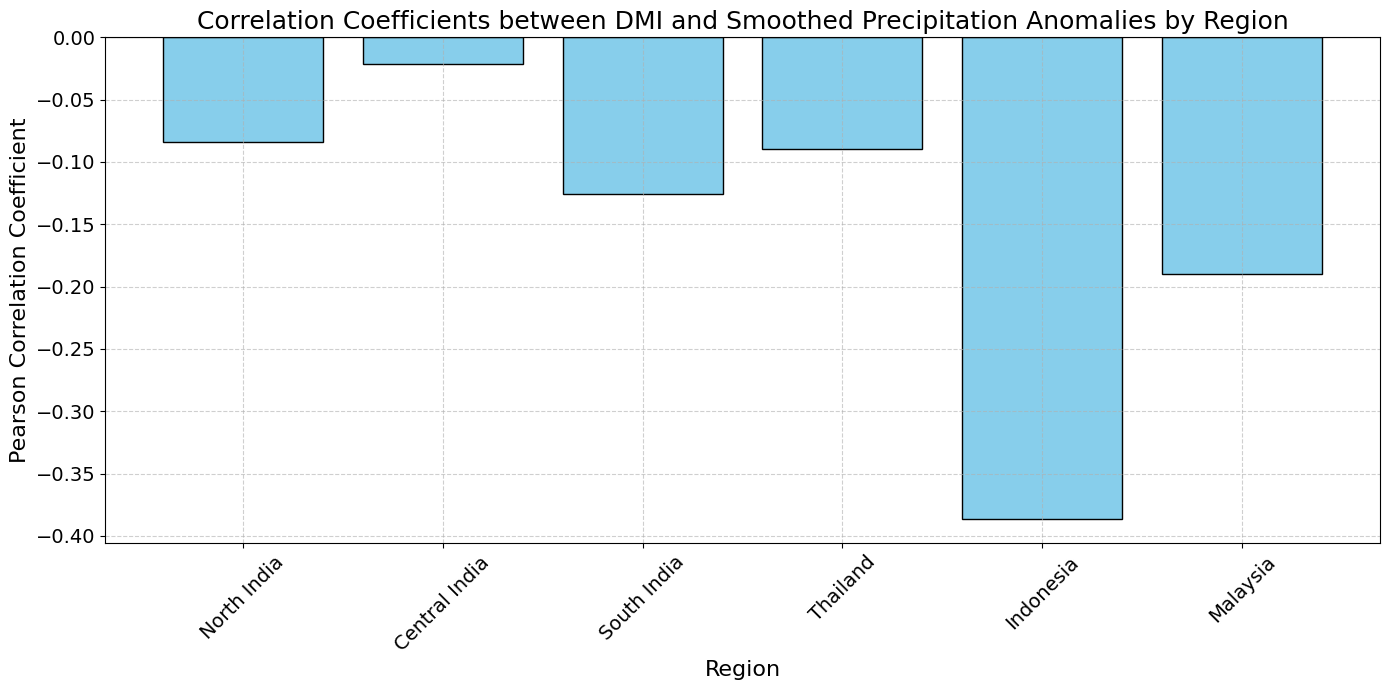

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the smoothed anomalies and DMI data are saved
smoothed_anomalies_dir = 'smoothed_anomalies_plots'  # Directory where smoothed anomalies CSV files are saved
dmi_file_path = r'C:\Users\Pooja\mon_data1\DMI index org.csv'  # Replace with your actual DMI file path

# Load the DMI data
dmi_df = pd.read_csv(dmi_file_path)

# Strip any leading/trailing spaces from column names
dmi_df.columns = dmi_df.columns.str.strip()

# Melt the DataFrame to have a single column for the month
dmi_df = pd.melt(dmi_df, id_vars=['Year'], var_name='Month', value_name='DMI')

# Convert the month names to numbers for easier plotting
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dmi_df['Month'] = dmi_df['Month'].apply(lambda x: month_to_num[x])

# Remove rows with missing values (assuming -9999.000 is used for missing values)
dmi_df = dmi_df[dmi_df['DMI'] != -9999.000]

# Convert the DMI data to datetime for merging
dmi_df['Date'] = pd.to_datetime(dmi_df[['Year', 'Month']].assign(Day=1))

# Dictionary to store correlation coefficients
dmi_correlation_dict = {}

# Calculate the Pearson correlation coefficient for each region
for region in regions:
    # Load the smoothed anomalies data for the region
    smoothed_csv_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_precipitation_anomalies.csv')
    smoothed_anomalies = pd.read_csv(smoothed_csv_filename)

    # Convert date for precise merging
    smoothed_anomalies['Date'] = pd.to_datetime(smoothed_anomalies[['Year', 'Month']].assign(Day=1))

    # Merge smoothed anomalies and DMI data based on Date
    merged_df = pd.merge(smoothed_anomalies, dmi_df[['Date', 'DMI']], on='Date', how='inner')

    # Calculate the Pearson correlation coefficient
    correlation = merged_df['DMI'].corr(merged_df['Anomaly_Smoothed'])
    dmi_correlation_dict[region] = correlation

# Create a DataFrame to display the results
dmi_correlation_df = pd.DataFrame(list(dmi_correlation_dict.items()), columns=['Region', 'Correlation Coefficient'])

# Display the DataFrame
print(dmi_correlation_df)

# Save the correlation coefficients to a CSV file
dmi_correlation_df.to_csv('dmi_correlation_coefficients.csv', index=False)
print("Correlation coefficients saved to 'dmi_correlation_coefficients.csv'")

# Plot the correlation coefficients with larger fonts
plt.figure(figsize=(14, 7))
plt.bar(dmi_correlation_df['Region'], dmi_correlation_df['Correlation Coefficient'], color='skyblue', edgecolor='black')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Pearson Correlation Coefficient', fontsize=16)
plt.title('Correlation Coefficients between DMI and Smoothed Precipitation Anomalies by Region', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats  # Import the necessary library for significance testing

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the smoothed anomalies and DMI data are saved
smoothed_anomalies_dir = 'smoothed_anomalies_plots'  # Directory where smoothed anomalies CSV files are saved
dmi_file_path = r'C:\Users\Pooja\mon_data1\DMI index org.csv'  # Replace with your actual DMI file path

# Load the DMI data
dmi_df = pd.read_csv(dmi_file_path)

# Strip any leading/trailing spaces from column names
dmi_df.columns = dmi_df.columns.str.strip()

# Melt the DataFrame to have a single column for the month
dmi_df = pd.melt(dmi_df, id_vars=['Year'], var_name='Month', value_name='DMI')

# Convert the month names to numbers for easier plotting
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dmi_df['Month'] = dmi_df['Month'].apply(lambda x: month_to_num[x])

# Remove rows with missing values (assuming -9999.000 is used for missing values)
dmi_df = dmi_df[dmi_df['DMI'] != -9999.000]

# Convert the DMI data to datetime for merging
dmi_df['Date'] = pd.to_datetime(dmi_df[['Year', 'Month']].assign(Day=1))

# Dictionaries to store correlation coefficients and p-values
correlation_dict = {}
p_value_dict = {}

# Calculate the Pearson correlation coefficient and p-value for each region
for region in regions:
    # Load the smoothed anomalies data for the region
    smoothed_csv_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_precipitation_anomalies.csv')
    smoothed_anomalies = pd.read_csv(smoothed_csv_filename)

    # Convert date for precise merging
    smoothed_anomalies['Date'] = pd.to_datetime(smoothed_anomalies[['Year', 'Month']].assign(Day=1))

    # Merge smoothed anomalies and DMI data based on Date
    merged_df = pd.merge(smoothed_anomalies, dmi_df[['Date', 'DMI']], on='Date', how='inner')

    # Calculate the Pearson correlation coefficient
    r = merged_df['DMI'].corr(merged_df['Anomaly_Smoothed'])
    correlation_dict[region] = r

    # Calculate the t-statistic
    n = len(merged_df)
    t_stat = r * (n - 2)**0.5 / (1 - r**2)**0.5

    # Calculate the p-value using the t-distribution
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-2))
    p_value_dict[region] = p_value

    # Determine significance at 95% and 99% confidence levels
    significance_95 = p_value < 0.05
    significance_99 = p_value < 0.01

    print(f"{region}: r = {r:.3f}, p-value = {p_value:.3f}, Significant at 95%: {significance_95}, Significant at 99%: {significance_99}")

# Create a DataFrame to display the results
correlation_df = pd.DataFrame({
    'Region': list(correlation_dict.keys()),
    'Correlation Coefficient': list(correlation_dict.values()),
    'p-value': list(p_value_dict.values())
})

# Display the DataFrame
print(correlation_df)

# Save the correlation coefficients and p-values to a CSV file
correlation_df.to_csv('dmi_correlation_coefficients_with_p_values.csv', index=False)
print("Correlation coefficients and p-values saved to 'dmi_correlation_coefficients_with_p_values.csv'")


North India: r = -0.084, p-value = 0.174, Significant at 95%: False, Significant at 99%: False
Central India: r = -0.022, p-value = 0.726, Significant at 95%: False, Significant at 99%: False
South India: r = -0.126, p-value = 0.041, Significant at 95%: True, Significant at 99%: False
Thailand: r = -0.090, p-value = 0.145, Significant at 95%: False, Significant at 99%: False
Indonesia: r = -0.386, p-value = 0.000, Significant at 95%: True, Significant at 99%: True
Malaysia: r = -0.190, p-value = 0.002, Significant at 95%: True, Significant at 99%: True
          Region  Correlation Coefficient       p-value
0    North India                -0.083938  1.739055e-01
1  Central India                -0.021647  7.262689e-01
2    South India                -0.125643  4.136396e-02
3       Thailand                -0.089893  1.452250e-01
4      Indonesia                -0.386369  7.915024e-11
5       Malaysia                -0.189830  1.948611e-03
Correlation coefficients and p-values saved to 'd

#### The DMI correlation coefficients generally show weaker relationships compared to ENSO, but still predominantly negative, particularly in Indonesia. This suggests that during positive IOD phases (positive DMI), there is a tendency for reduced precipitation, although the influence appears less robust compared to ENSO.

#### In regions like North and Central India, the correlations are close to zero, indicating a minimal influence of the IOD on precipitation patterns, potentially overshadowed by other climatic factors, including ENSO.

#### Both ENSO and DMI show overlapping effects, particularly in Southeast Asia and Indonesia. This overlapping influence often complicates direct attribution, as positive ENSO (El Niño) and positive IOD (warm phase) can both lead to similar outcomes of reduced precipitation. In some instances, the combined impact of both indices can amplify the dryness (e.g., during simultaneous El Niño and positive IOD events), making it challenging to separate their individual contributions purely through correlation analysis.

#### ENSO Influence: ENSO appears to have a more consistent and stronger impact on precipitation patterns in Southeast Asia and Indonesia, aligning with established climatological patterns. Its influence in India is weaker but still present, potentially indicating complex interactions with monsoon dynamics and other regional factors.

#### IOD Influence: IOD shows some impact, especially in Indonesia, but its role is generally less dominant compared to ENSO. The weaker correlations suggest that while IOD does play a role, it might not be the primary driver of precipitation variability in these regions.

##### it shows an inverse relationship, meaning when DMI is high (positive IOD), precipitation in certain regions tends to be lower (drier), and when DMI is low (negative IOD), precipitation tends to be higher (wetter).

##### For regions like Indonesia, a strong negative correlation confirms the expected outcome: during positive IOD events, rainfall is suppressed, aligning with your data showing reduced precipitation when the DMI is high.

##### For India and Southeast Asia, the influence is more complex and can vary depending on the specific location and time of year. The correlation does not mean a lack of influence but rather a nuanced relationship that reflects how the IOD phases impact different regions differently.

##### The IOD does influence precipitation patterns, but the nature of this influence can vary significantly depending on the region and season. The observed negative correlation coefficients highlight an inverse relationship between DMI and precipitation anomalies, consistent with known IOD impacts, such as suppressed rainfall during positive IOD phases in regions like Indonesia.

##### Negative correlation values do not imply no impact but indicate how the DMI phases affect rainfall inversely. Understanding these patterns helps in predicting rainfall changes during different IOD phases, which is critical for water resource management, agriculture, and disaster preparedness in affected regions.

# 7.3 DMI Seasonal Correlation Coefficient  

Region: North India, Number of DJF points: 66
Region: Central India, Number of DJF points: 66
Region: South India, Number of DJF points: 66
Region: Thailand, Number of DJF points: 66
Region: Indonesia, Number of DJF points: 66
Region: Malaysia, Number of DJF points: 66
          Region  DJF Correlation Coefficient
0    North India                     0.035279
1  Central India                    -0.118388
2    South India                    -0.012354
3       Thailand                    -0.134396
4      Indonesia                    -0.285214
5       Malaysia                    -0.103102
DJF correlation coefficients saved to 'the_dmi_djf_correlation_coefficients.csv'


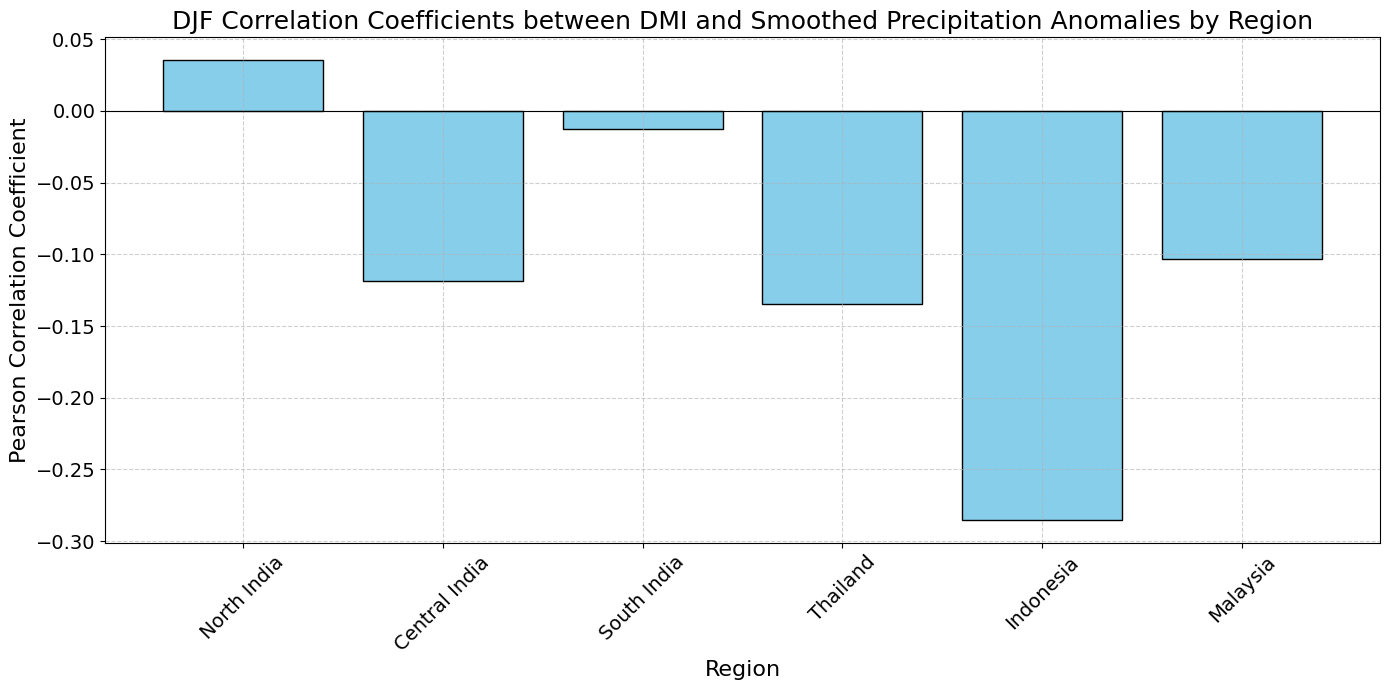

Region: North India, Number of MAM points: 66
Region: Central India, Number of MAM points: 66
Region: South India, Number of MAM points: 66
Region: Thailand, Number of MAM points: 66
Region: Indonesia, Number of MAM points: 66
Region: Malaysia, Number of MAM points: 66
          Region  MAM Correlation Coefficient
0    North India                    -0.013009
1  Central India                    -0.211815
2    South India                    -0.114648
3       Thailand                     0.085979
4      Indonesia                     0.165840
5       Malaysia                     0.129016
MAM correlation coefficients saved to 'the_dmi_mam_correlation_coefficients.csv'


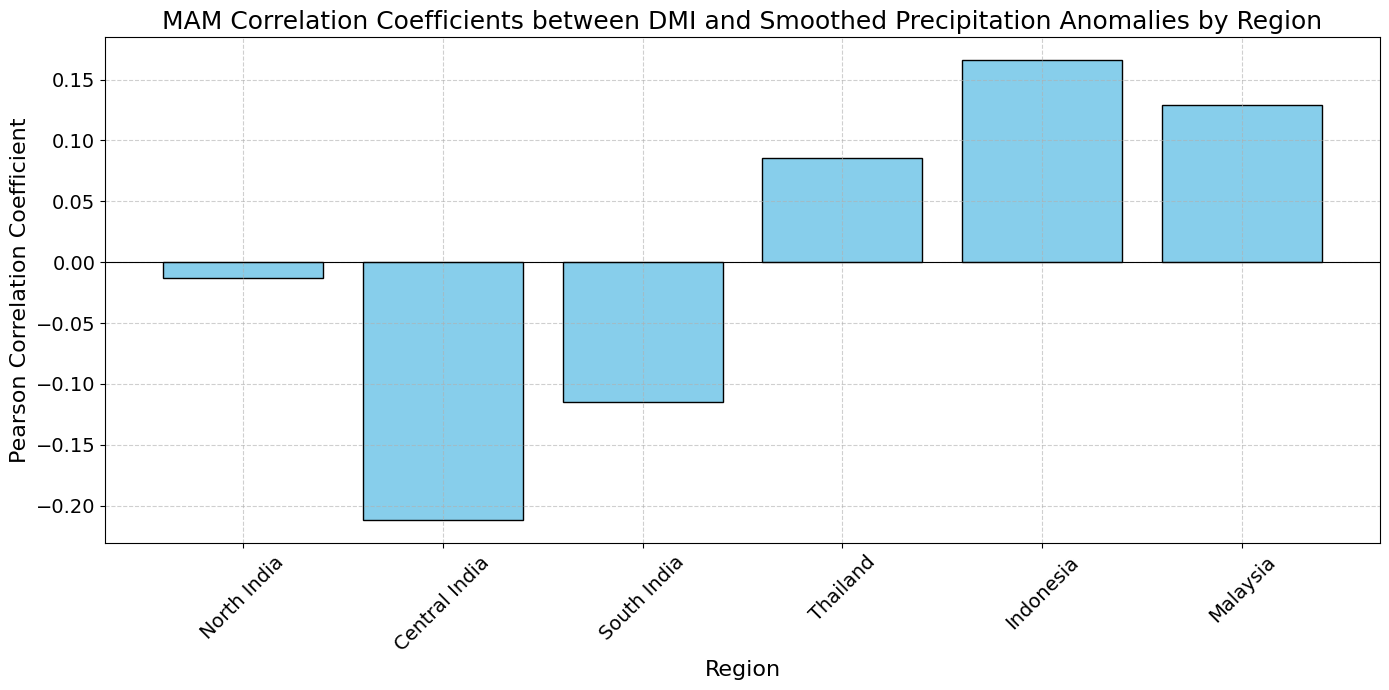

Region: North India, Number of JJA points: 66
Region: Central India, Number of JJA points: 66
Region: South India, Number of JJA points: 66
Region: Thailand, Number of JJA points: 66
Region: Indonesia, Number of JJA points: 66
Region: Malaysia, Number of JJA points: 66
          Region  JJA Correlation Coefficient
0    North India                     0.032910
1  Central India                     0.041423
2    South India                    -0.116802
3       Thailand                     0.030007
4      Indonesia                    -0.293455
5       Malaysia                    -0.121197
JJA correlation coefficients saved to 'the_dmi_jja_correlation_coefficients.csv'


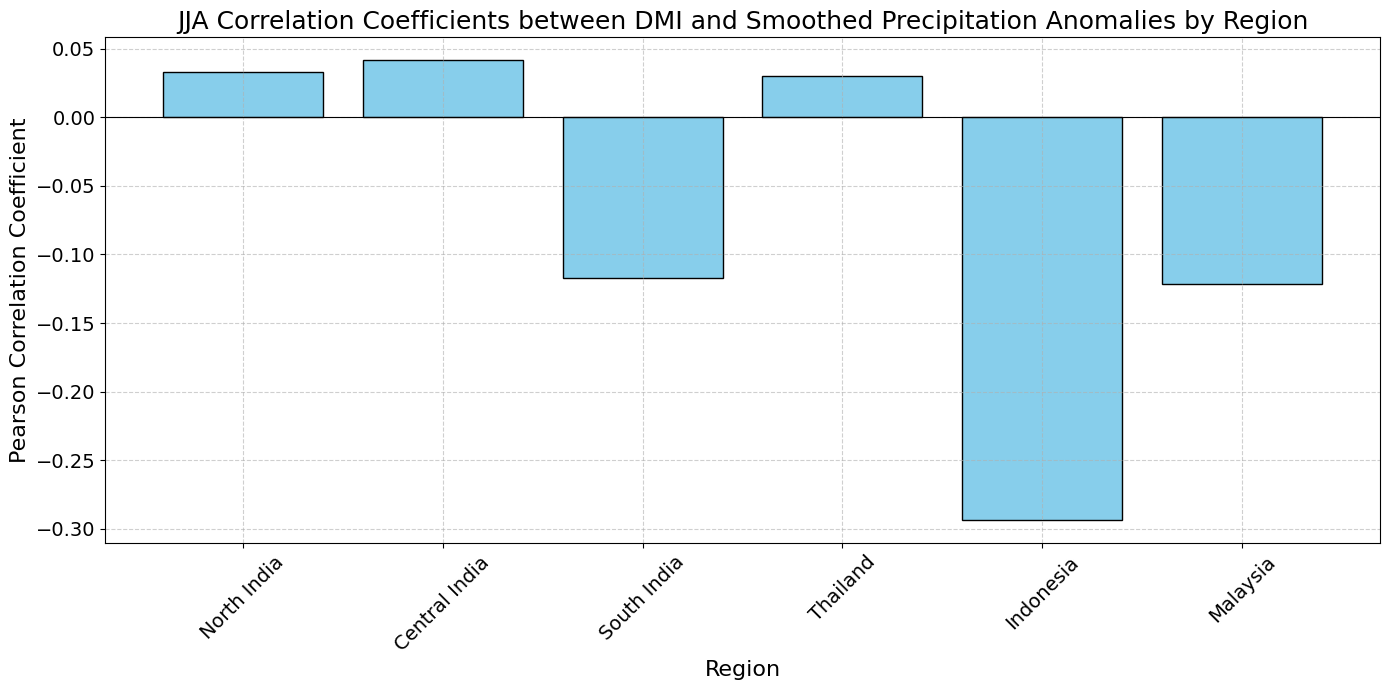

Region: North India, Number of SON points: 66
Region: Central India, Number of SON points: 66
Region: South India, Number of SON points: 66
Region: Thailand, Number of SON points: 66
Region: Indonesia, Number of SON points: 66
Region: Malaysia, Number of SON points: 66
          Region  SON Correlation Coefficient
0    North India                    -0.314992
1  Central India                    -0.005138
2    South India                    -0.183871
3       Thailand                    -0.337470
4      Indonesia                    -0.708274
5       Malaysia                    -0.586815
SON correlation coefficients saved to 'the_dmi_son_correlation_coefficients.csv'


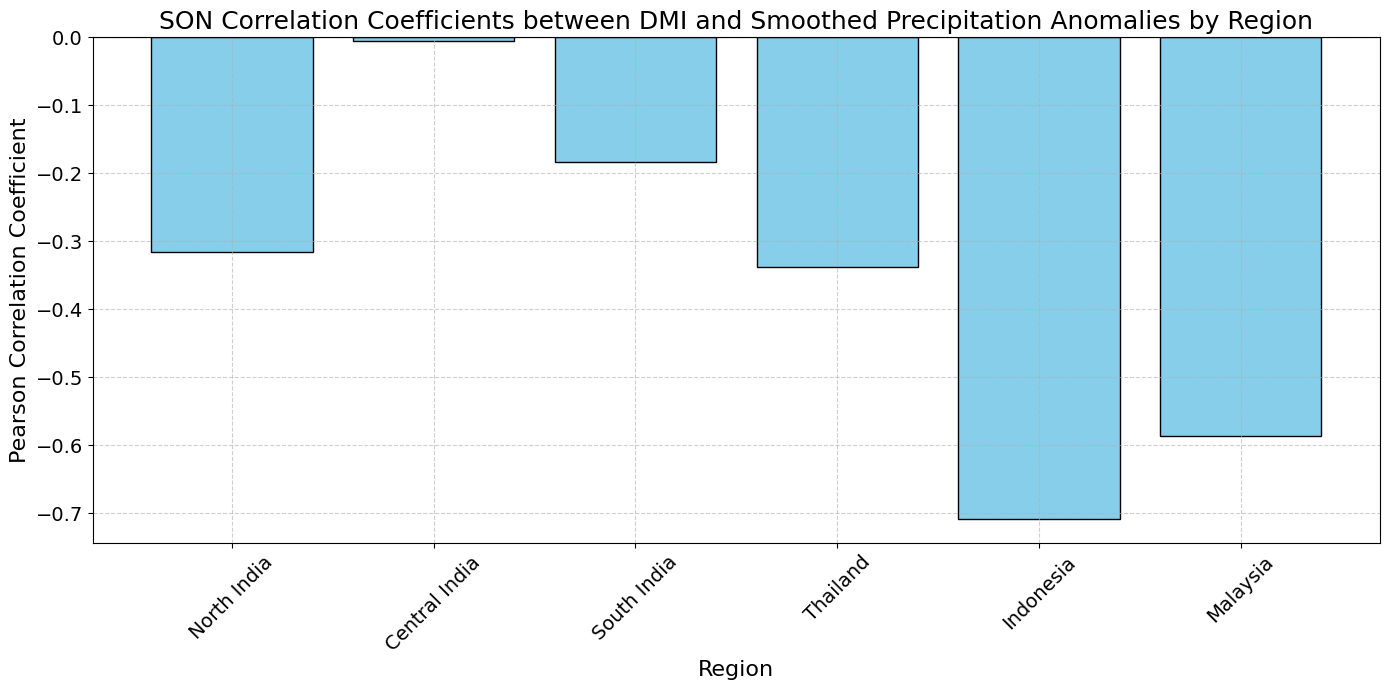

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of regions to process
regions = ['North India', 'Central India', 'South India', 'Thailand', 'Indonesia', 'Malaysia']

# Directories where the smoothed anomalies and DMI data are saved
smoothed_anomalies_dir = 'smoothed_anomalies_plots'  # Directory where smoothed anomalies CSV files are saved
dmi_file_path = r'C:\Users\Pooja\mon_data1\DMI index org.csv'  # Replace with your actual DMI file path

# Load the DMI data
dmi_df = pd.read_csv(dmi_file_path)

# Strip any leading/trailing spaces from column names
dmi_df.columns = dmi_df.columns.str.strip()

# Melt the DataFrame to have a single column for the month
dmi_df = pd.melt(dmi_df, id_vars=['Year'], var_name='Month', value_name='DMI')

# Convert the month names to numbers for easier plotting
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dmi_df['Month'] = dmi_df['Month'].apply(lambda x: month_to_num[x])

# Remove rows with missing values (assuming -9999.000 is used for missing values)
dmi_df = dmi_df[dmi_df['DMI'] != -9999.000]

# Convert the DMI data to datetime for merging
dmi_df['Date'] = pd.to_datetime(dmi_df[['Year', 'Month']].assign(Day=1))

# Define seasons and their corresponding months
seasons = {
    'DJF': [12, 1, 2],
    'MAM': [3, 4, 5],
    'JJA': [6, 7, 8],
    'SON': [9, 10, 11]
}

# Function to calculate and plot correlation coefficients for a given season
def calculate_seasonal_correlation(season_name, months):
    season_correlation_dict = {}

    # Iterate over each region to calculate the seasonal correlation coefficient
    for region in regions:
        # Load the smoothed anomalies data for the region
        smoothed_csv_filename = os.path.join(smoothed_anomalies_dir, f'{region}_smoothed_precipitation_anomalies.csv')
        smoothed_anomalies = pd.read_csv(smoothed_csv_filename)

        # Convert date for precise merging
        smoothed_anomalies['Date'] = pd.to_datetime(smoothed_anomalies[['Year', 'Month']].assign(Day=1))

        # Merge smoothed anomalies and DMI data based on Date
        merged_df = pd.merge(smoothed_anomalies, dmi_df[['Date', 'DMI']], on='Date', how='inner')

        # Filter the merged data for the specified season months
        season_df = merged_df[merged_df['Month'].isin(months)]

        # Print the number of points for each region
        print(f"Region: {region}, Number of {season_name} points: {len(season_df)}")

        # Calculate the Pearson correlation coefficient for the season
        correlation = season_df['DMI'].corr(season_df['Anomaly_Smoothed'])
        season_correlation_dict[region] = correlation

    # Create a DataFrame to display the results
    season_correlation_df = pd.DataFrame(list(season_correlation_dict.items()), columns=['Region', f'{season_name} Correlation Coefficient'])

    # Display the DataFrame
    print(season_correlation_df)

    # Save the correlation coefficients to a CSV file
    season_correlation_df.to_csv(f'the_dmi_{season_name.lower()}_correlation_coefficients.csv', index=False)
    print(f"{season_name} correlation coefficients saved to 'the_dmi_{season_name.lower()}_correlation_coefficients.csv'")

    # Plot the correlation coefficients for the season with larger font sizes
    plt.figure(figsize=(14, 7))
    plt.bar(season_correlation_df['Region'], season_correlation_df[f'{season_name} Correlation Coefficient'], color='skyblue', edgecolor='black')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.xlabel('Region', fontsize=16)  # Increase x-label font size
    plt.ylabel('Pearson Correlation Coefficient', fontsize=16)  # Increase y-label font size
    plt.title(f'{season_name} Correlation Coefficients between DMI and Smoothed Precipitation Anomalies by Region', fontsize=18)  # Increase title font size
    plt.xticks(rotation=45, fontsize=14)  # Increase x-ticks font size
    plt.yticks(fontsize=14)  # Increase y-ticks font size
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Calculate and plot for each season
for season_name, months in seasons.items():
    calculate_seasonal_correlation(season_name, months)


#### The results consistently show negative correlations between DMI and precipitation anomalies, particularly in Indonesia and Malaysia, during various seasons. This suggests that positive IOD phases, associated with warm waters in the western Indian Ocean, often lead to drier conditions in Southeast Asia, especially during SON when the effect is most pronounced.

#### The influence of DMI on precipitation varies across regions and seasons, with Indonesia and Malaysia showing the strongest impacts. In India, the correlations are generally weaker, suggesting that DMI plays a more secondary role compared to other climatic drivers like ENSO.

#### The correlations with DMI are generally weaker than those observed with ENSO, indicating that ENSO might be a more dominant factor influencing precipitation patterns in these regions. However, during certain seasons, the combined effects of ENSO and DMI can complicate the overall impact on regional precipitation.

## Global Analysis

# 3.3 Global Total Monthly Precipitation Analysis

Processing years: 100%|████████████████████████████████████████████████████████████████| 22/22 [00:08<00:00,  2.46it/s]


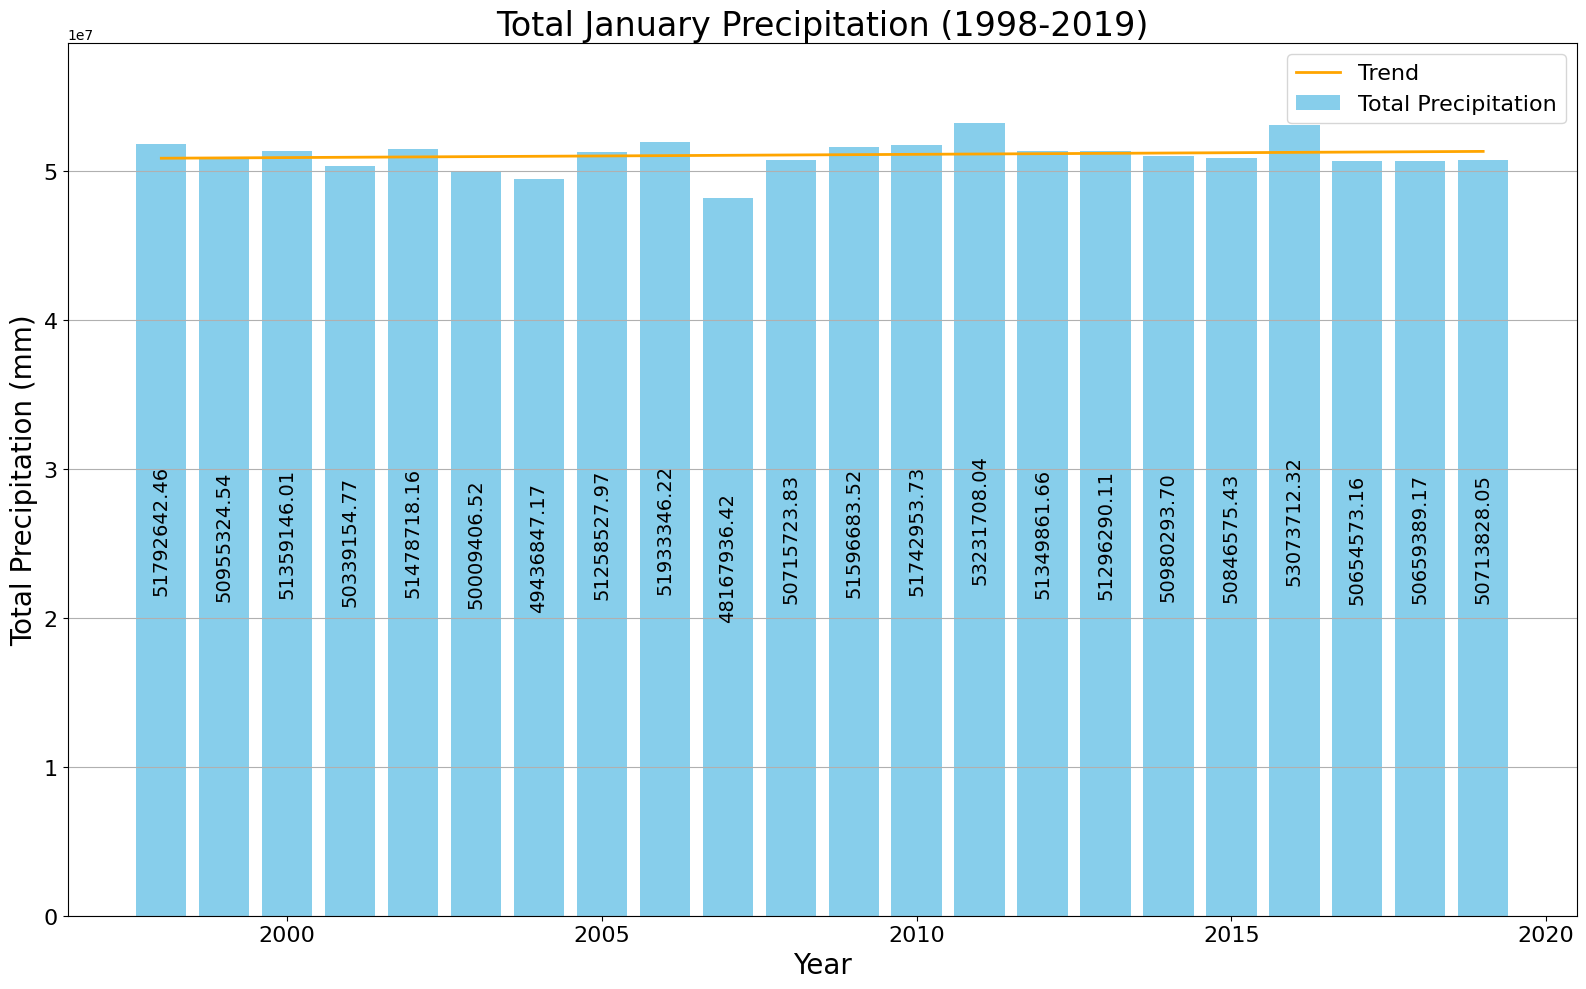

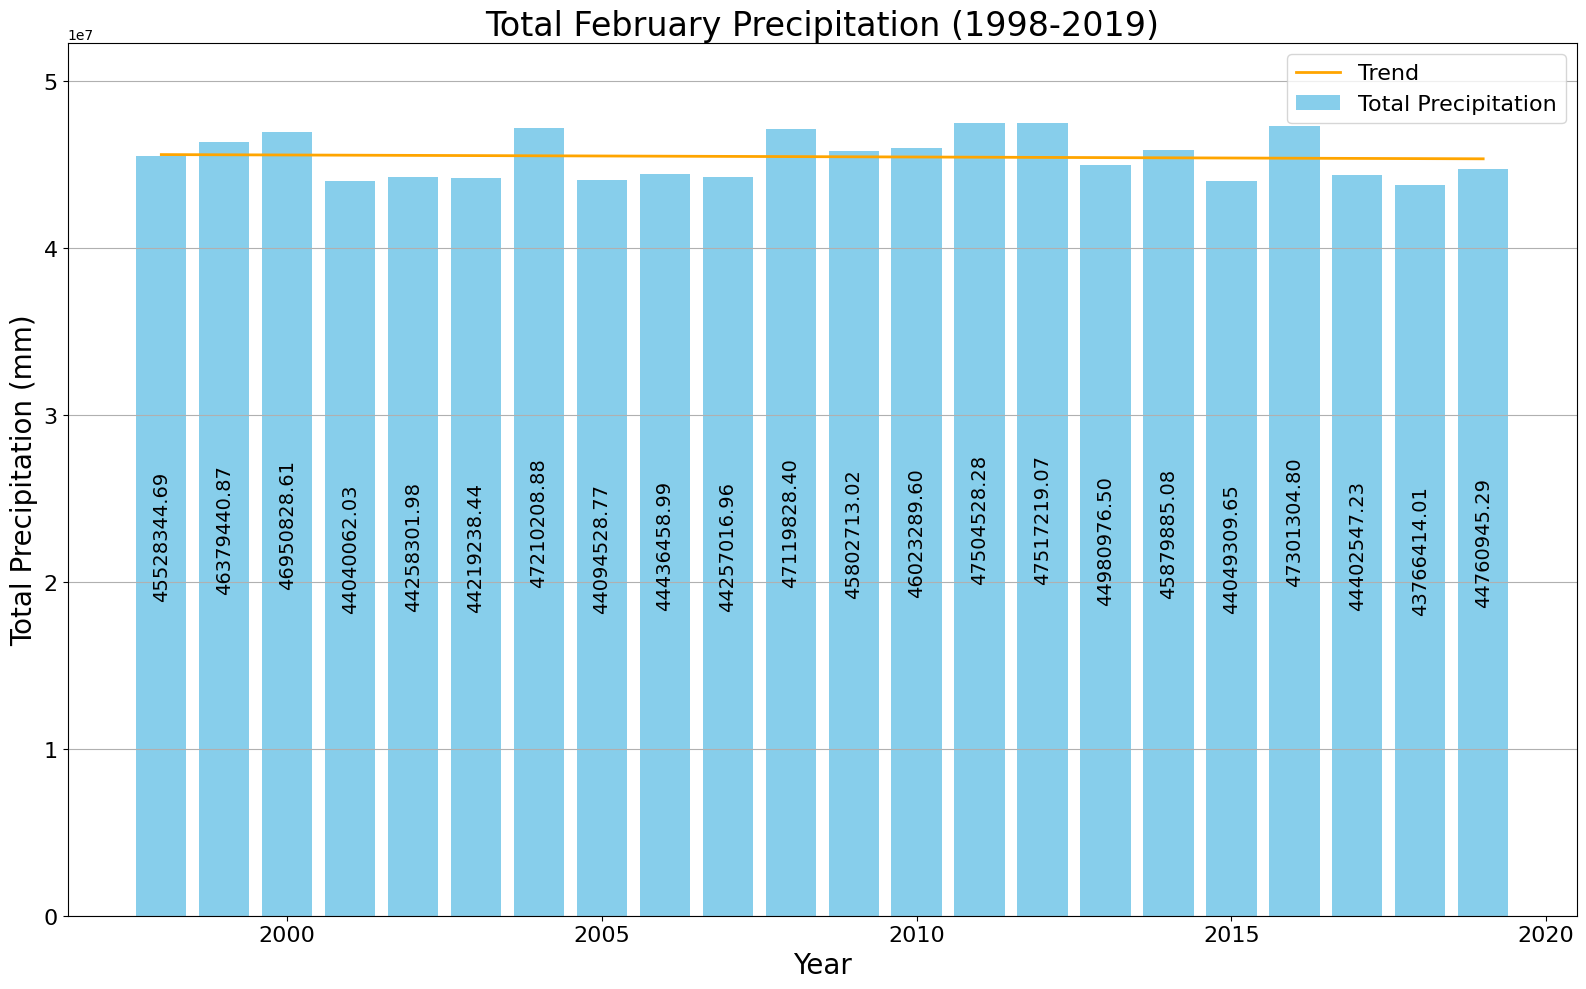

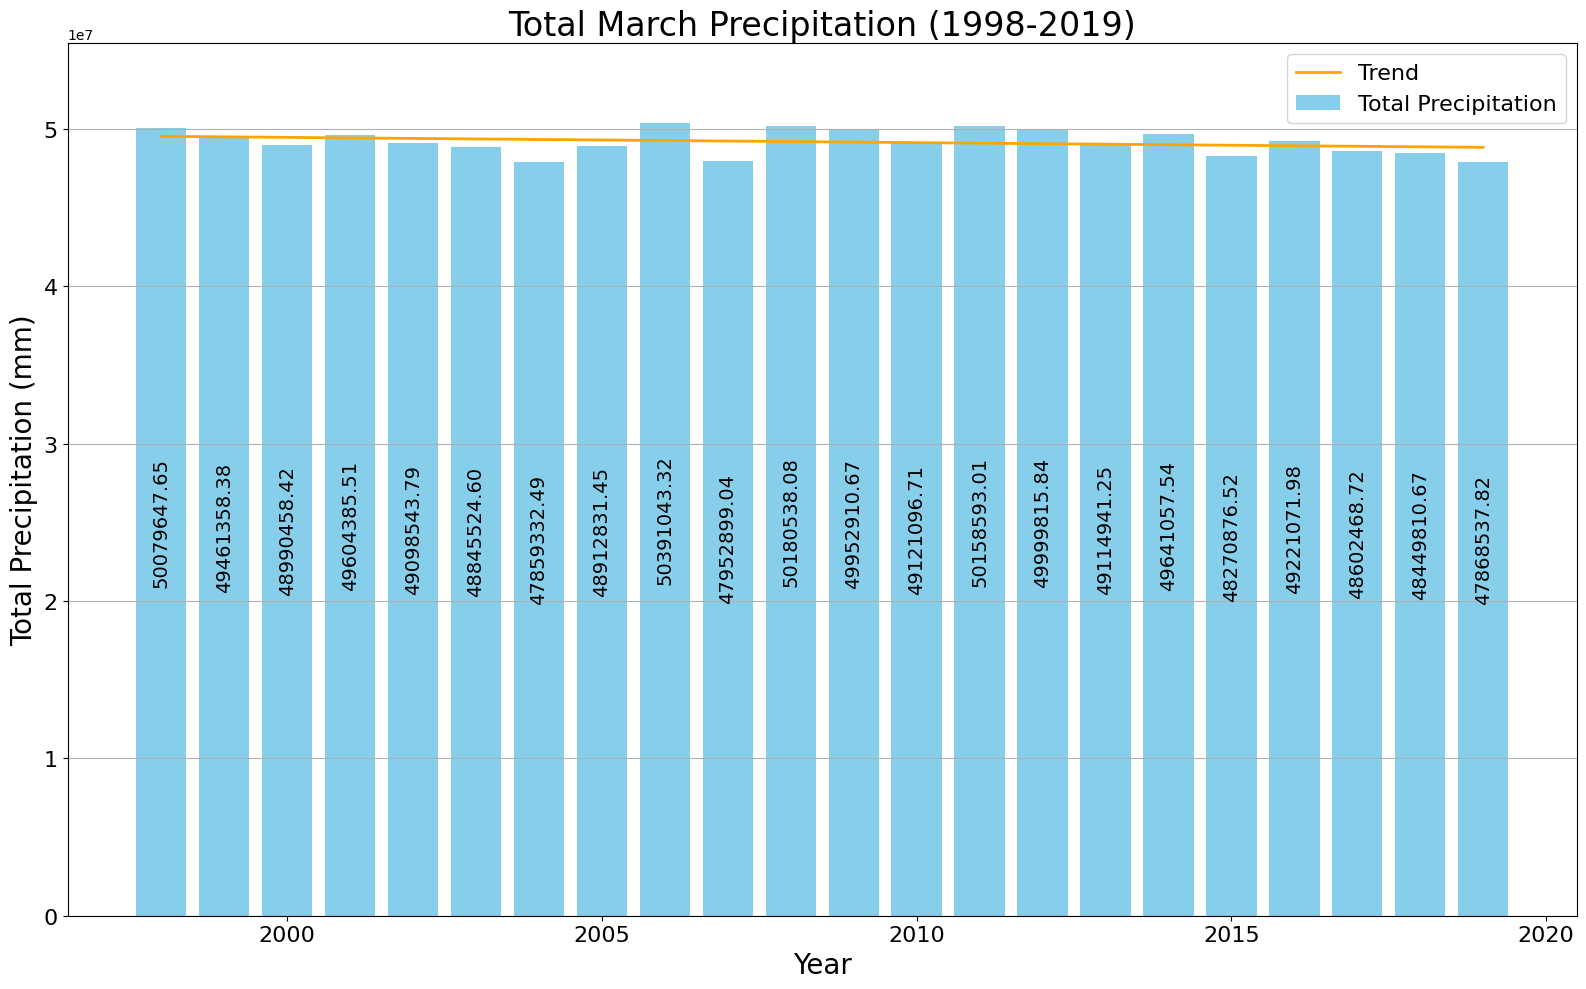

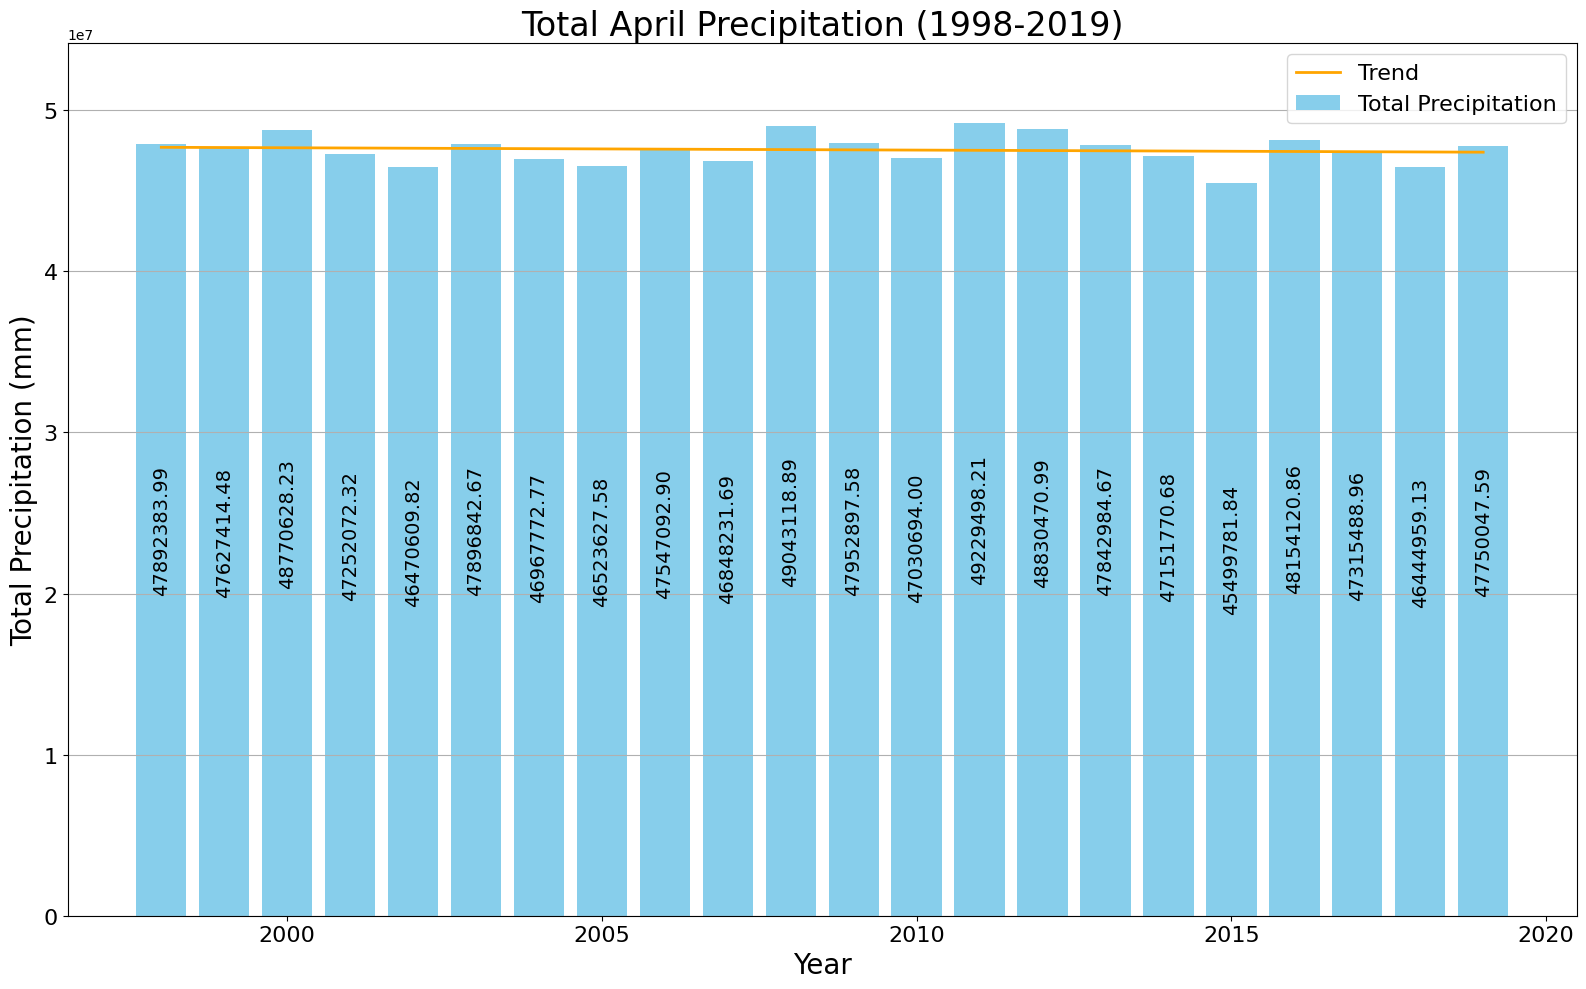

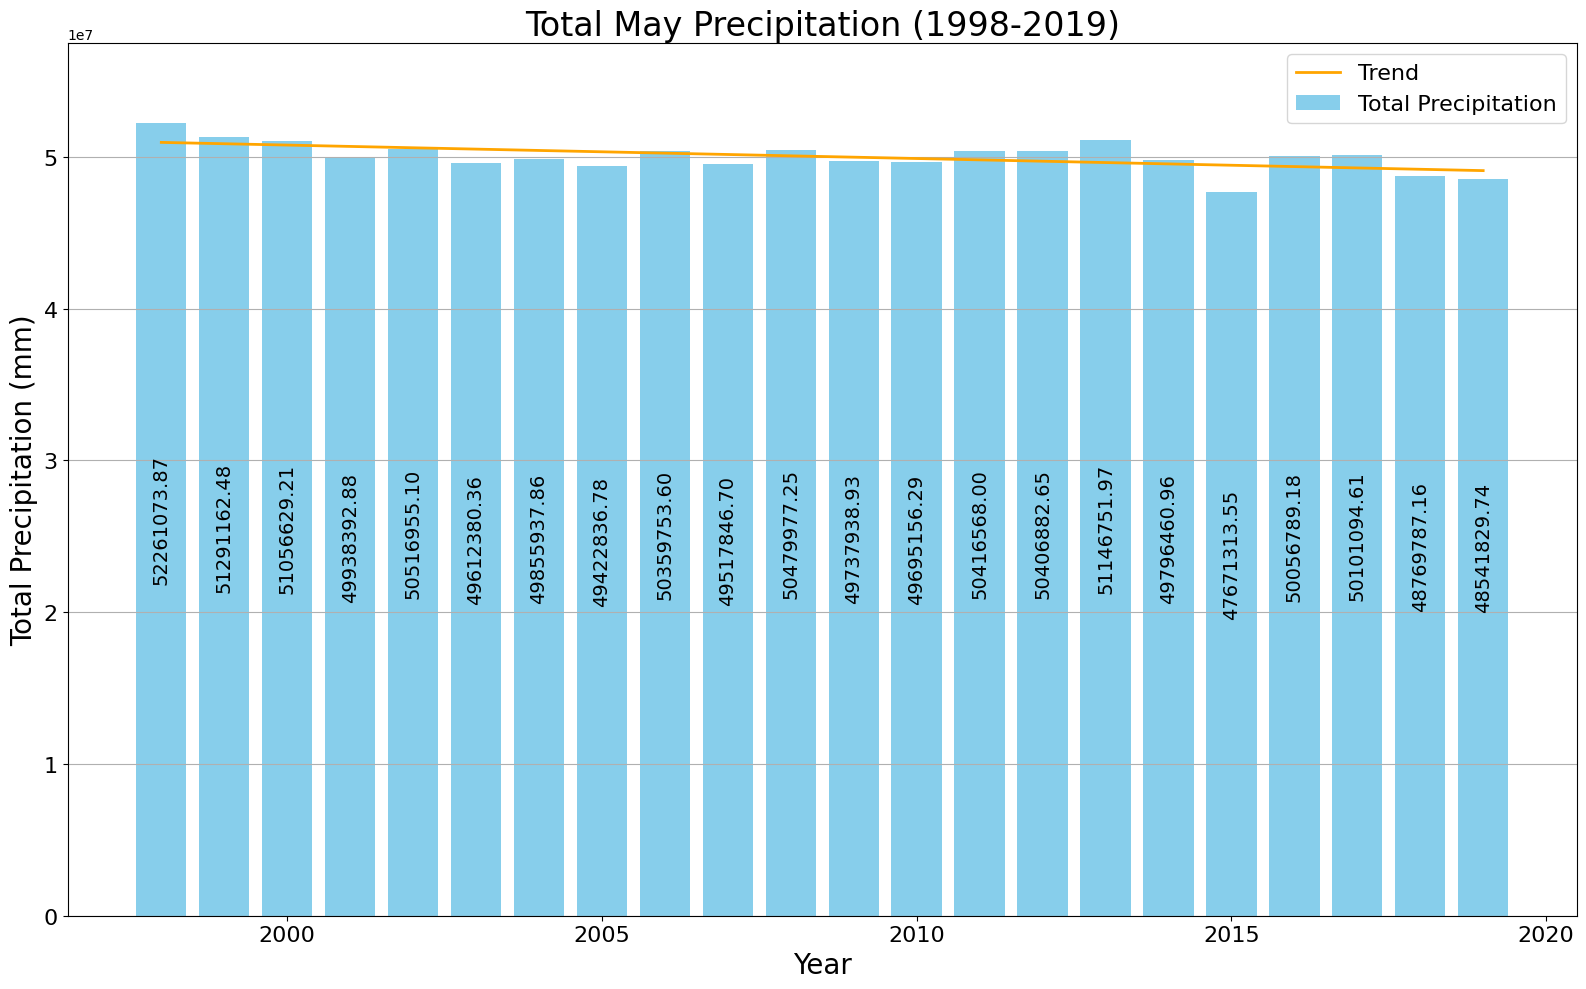

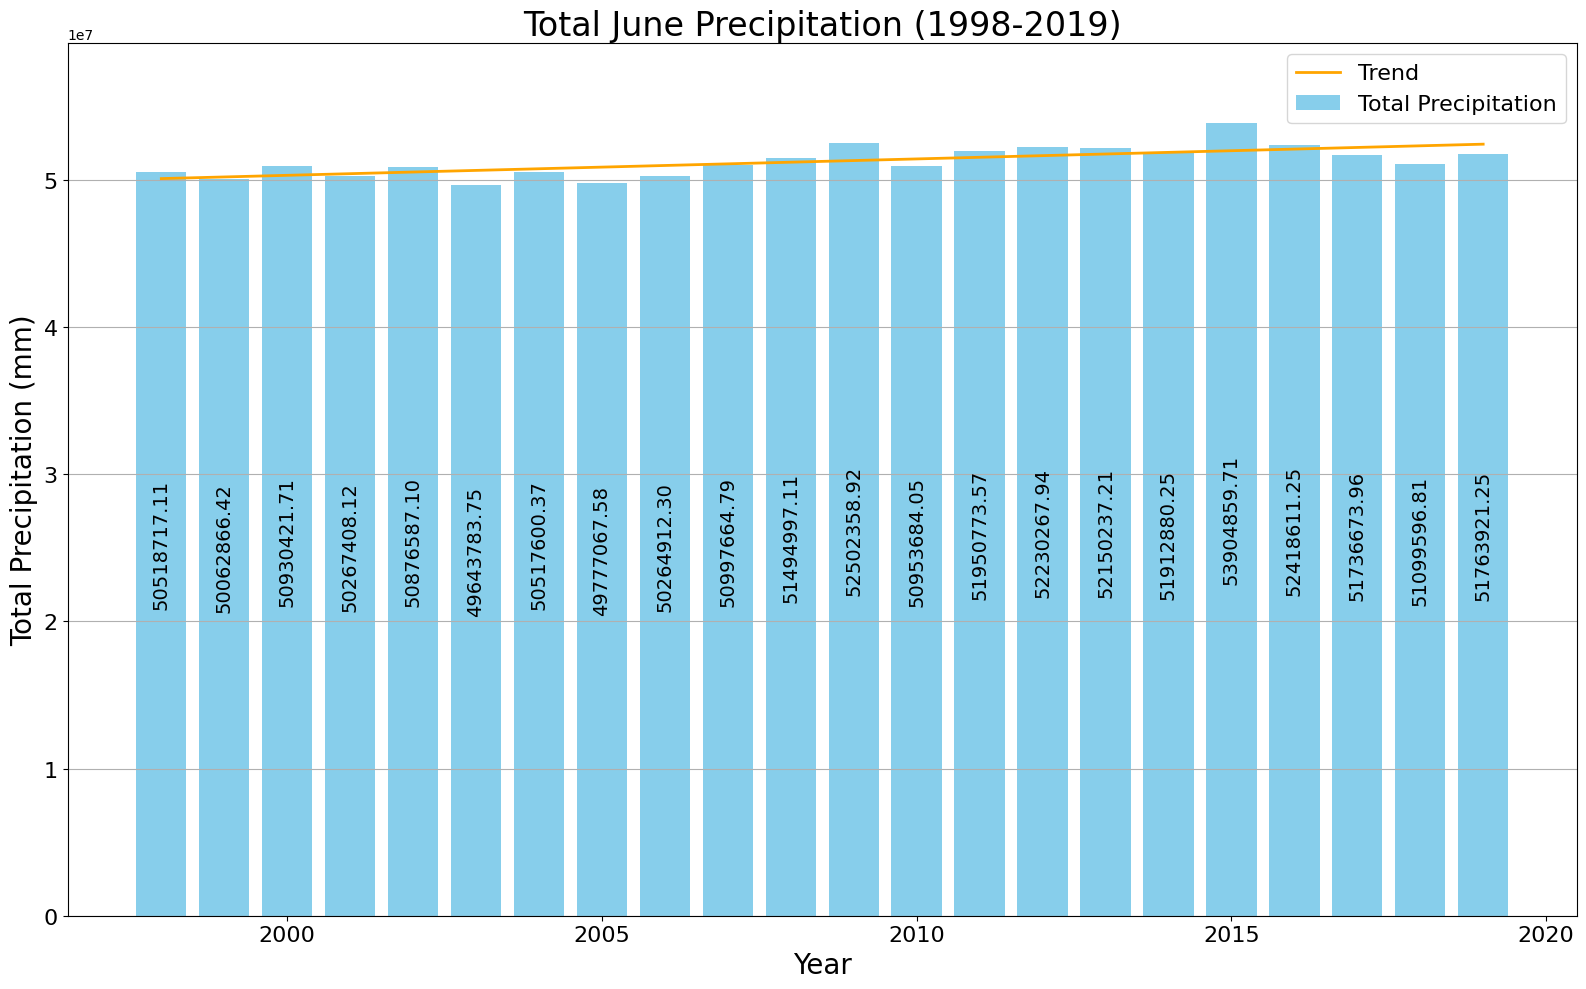

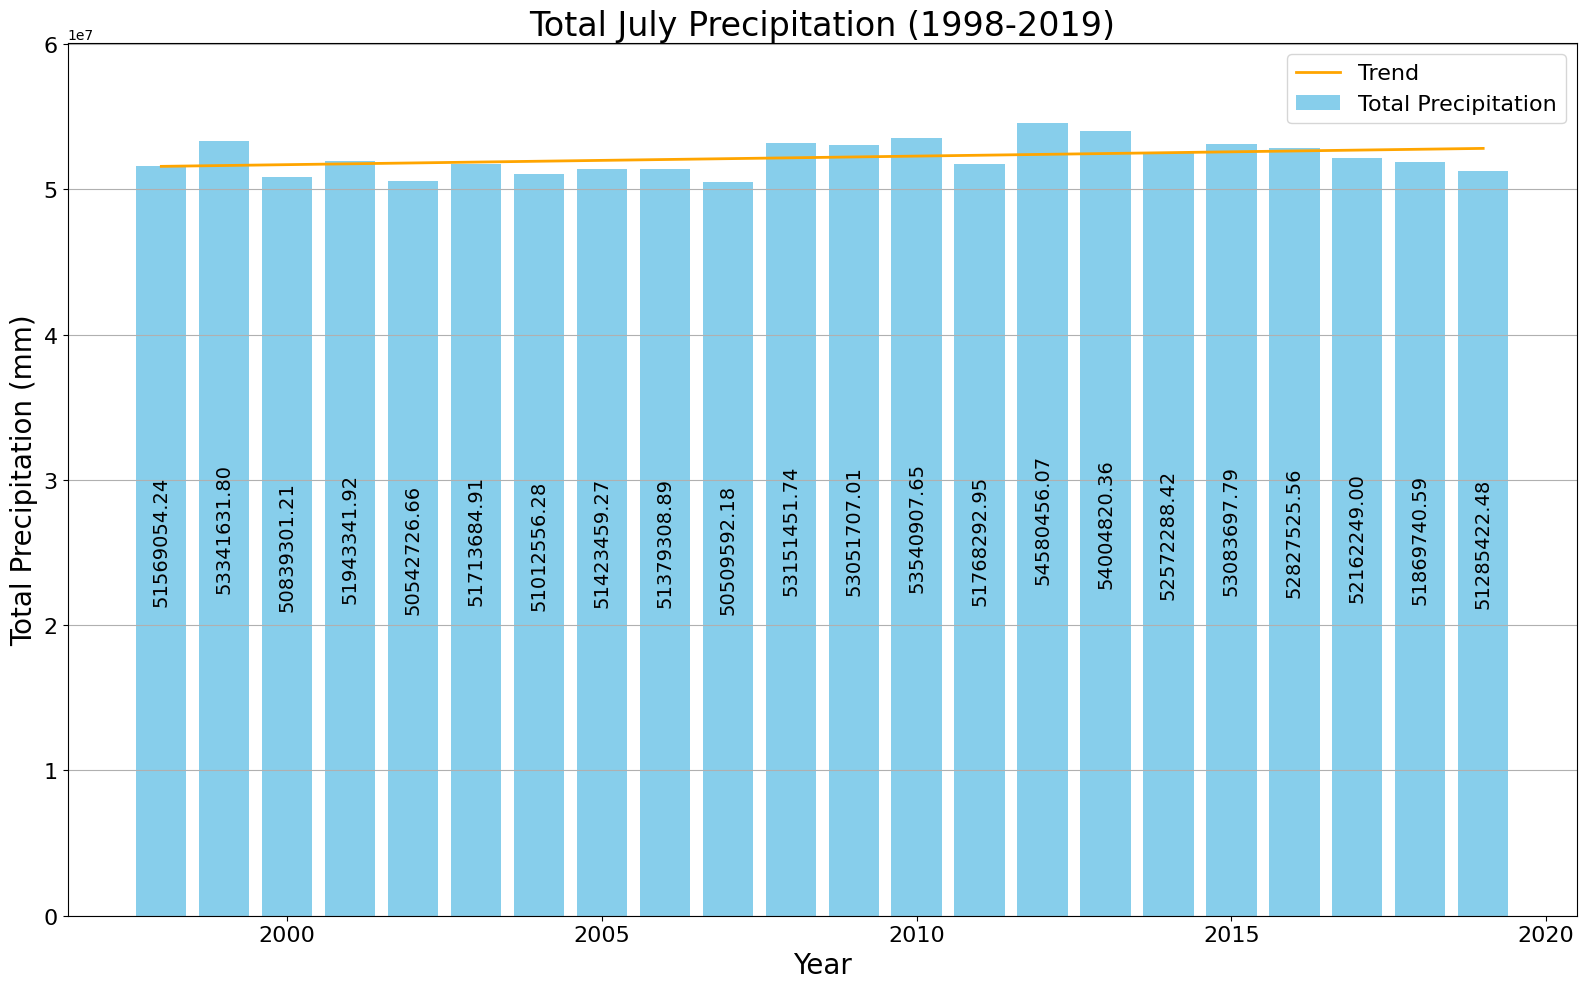

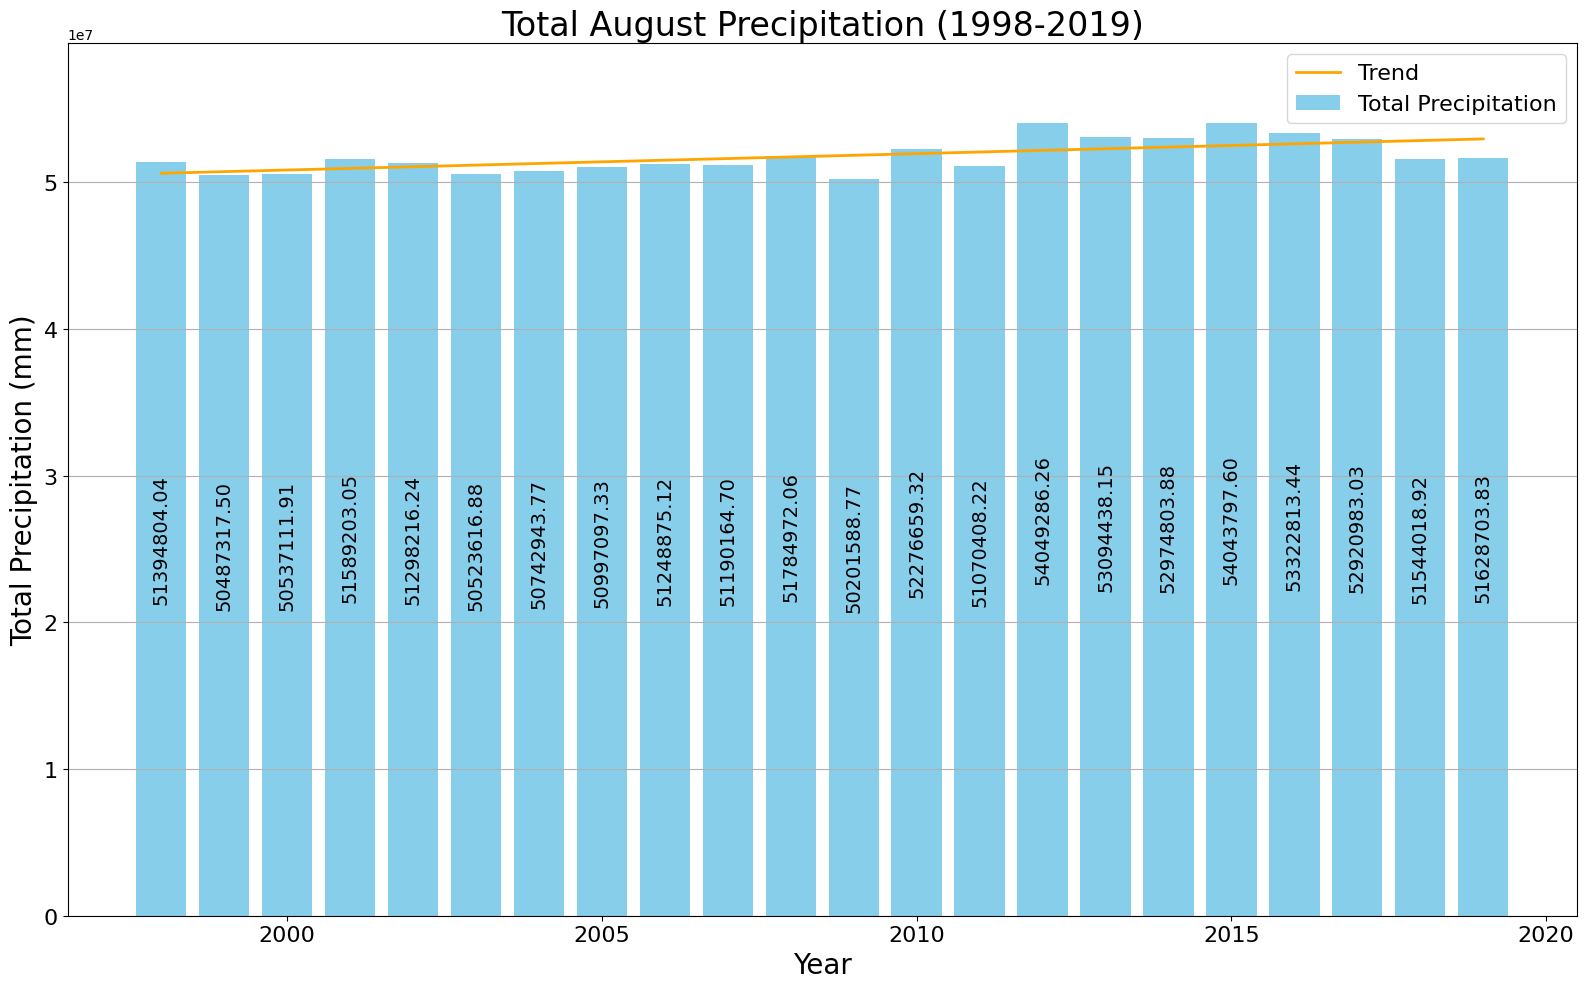

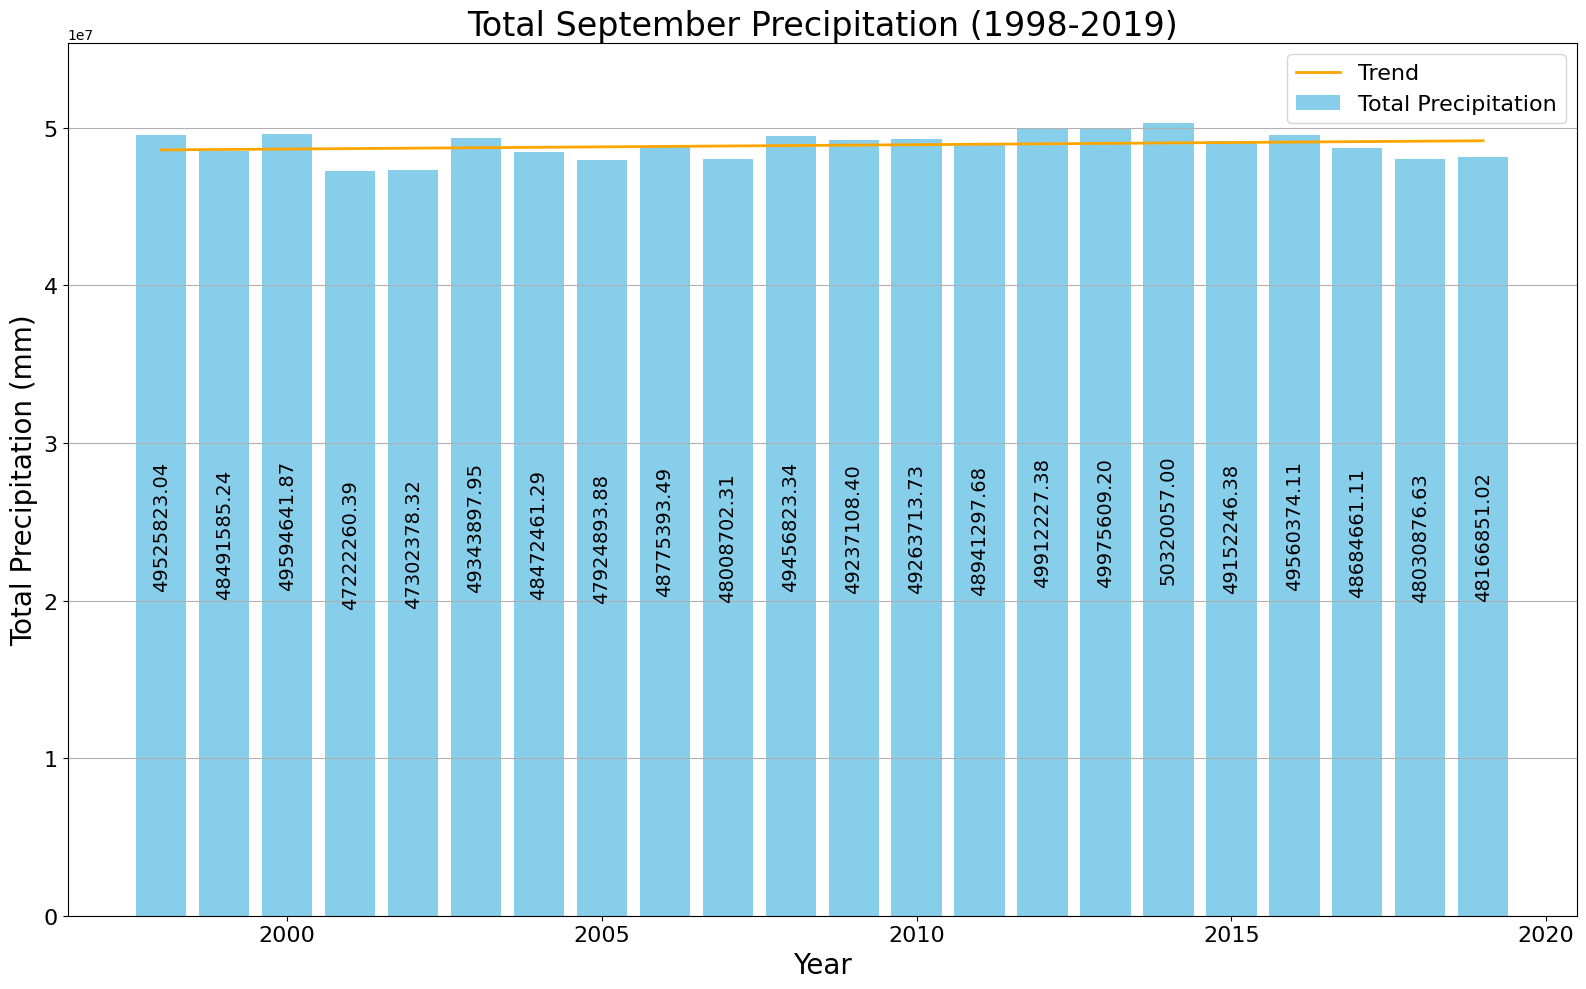

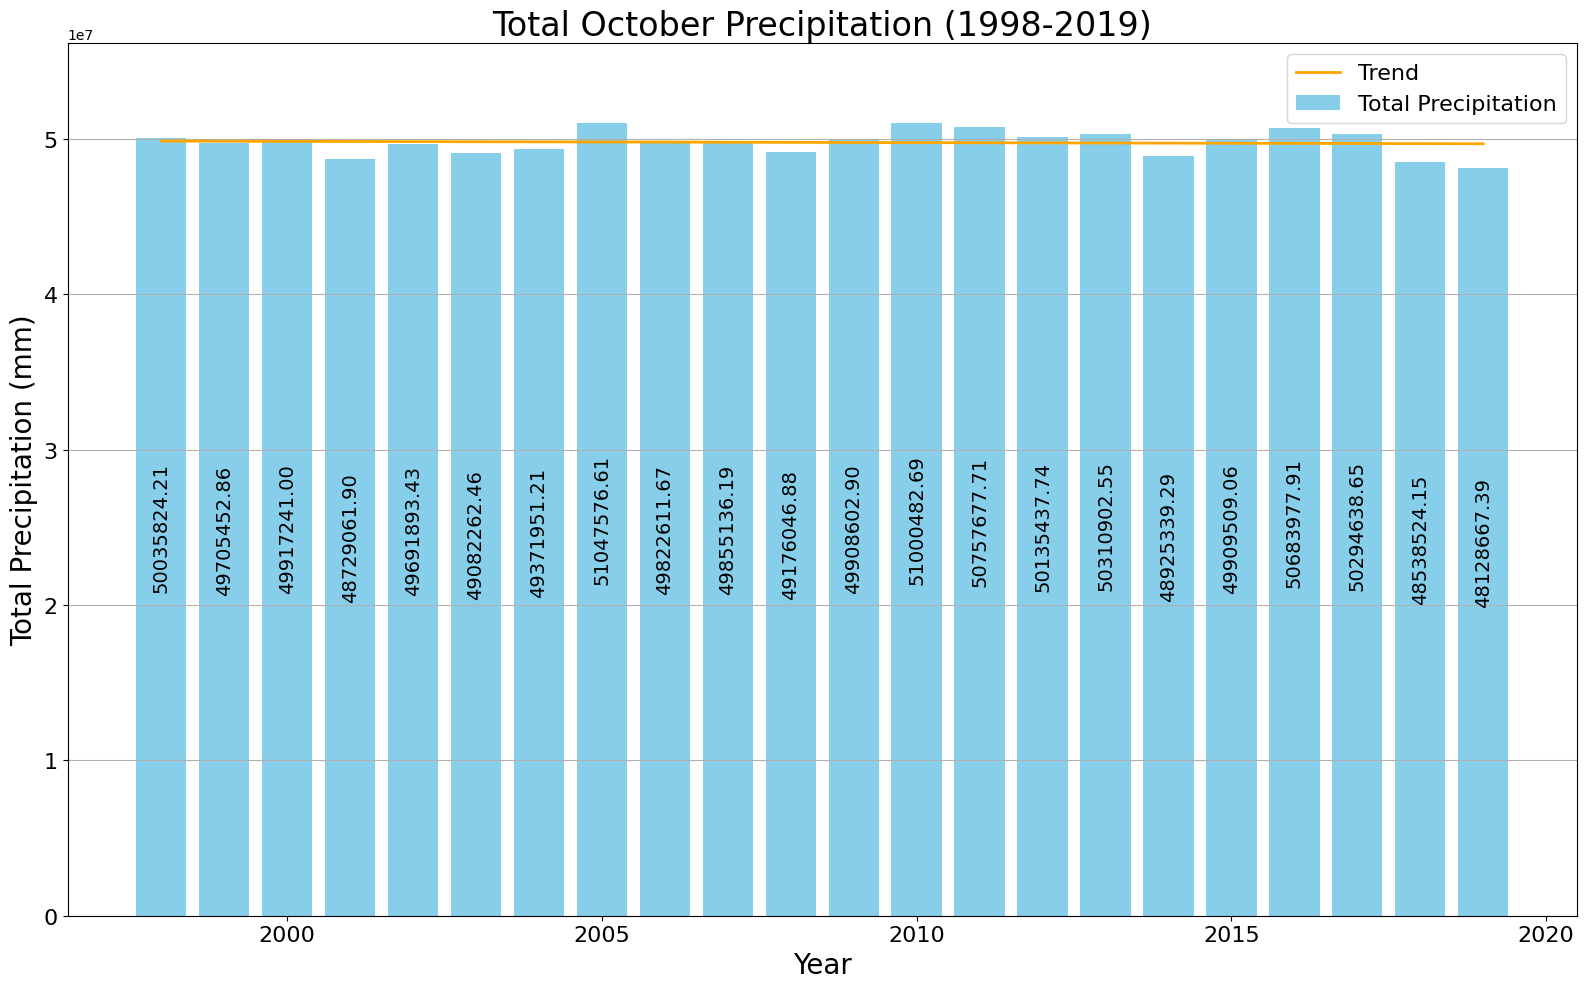

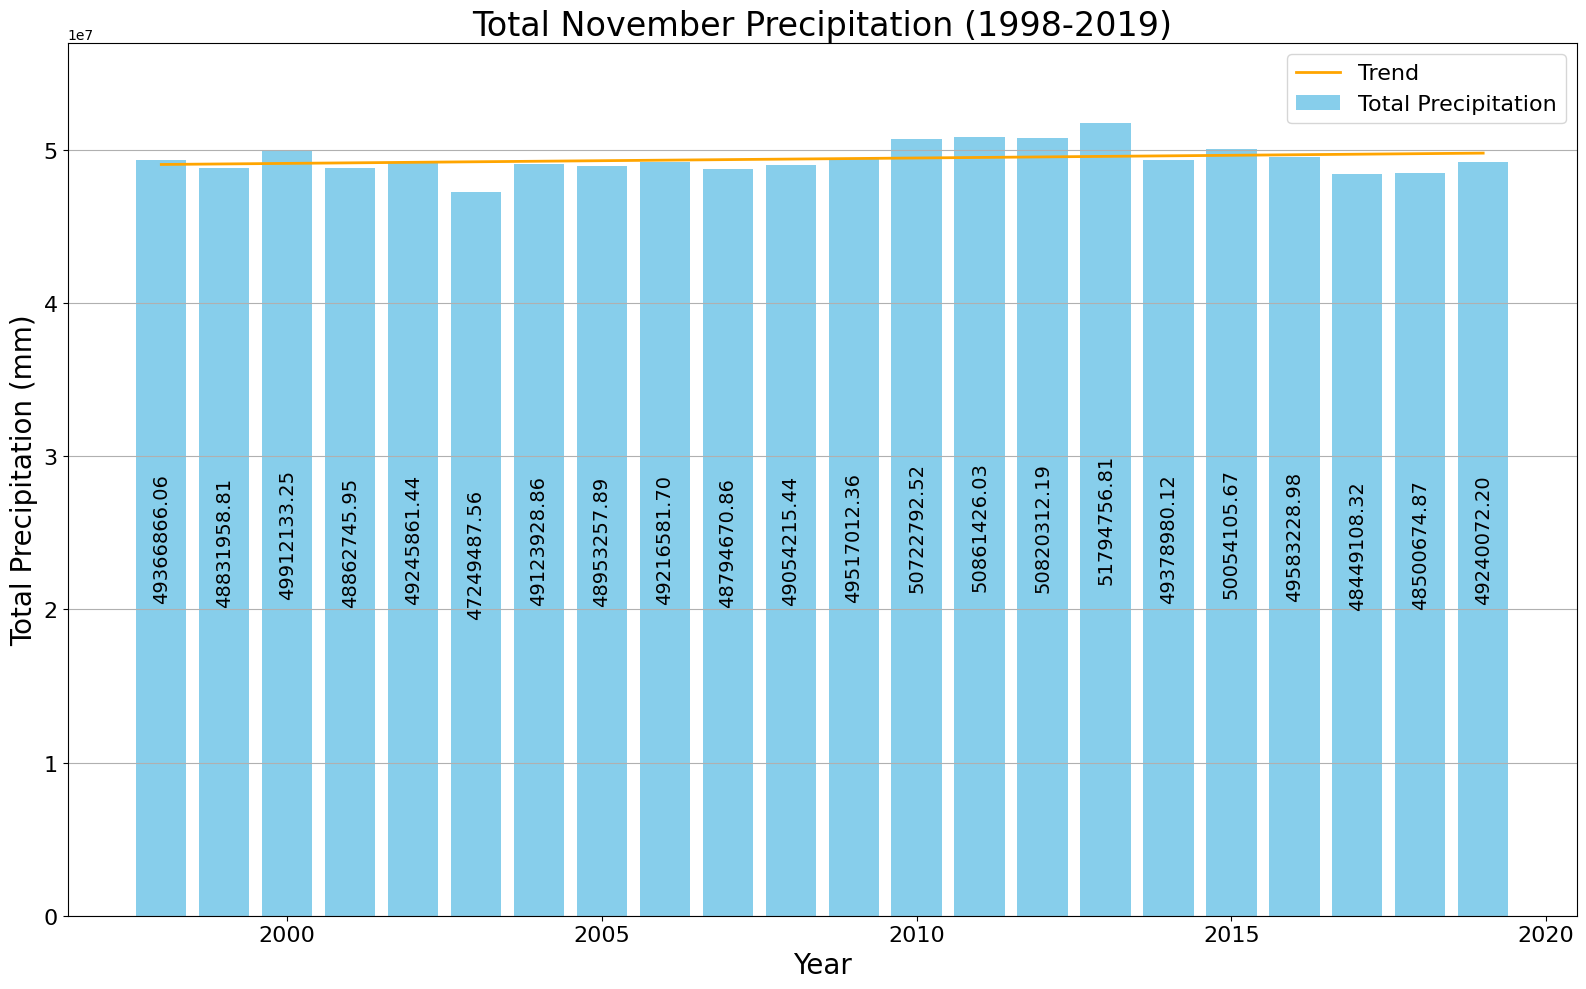

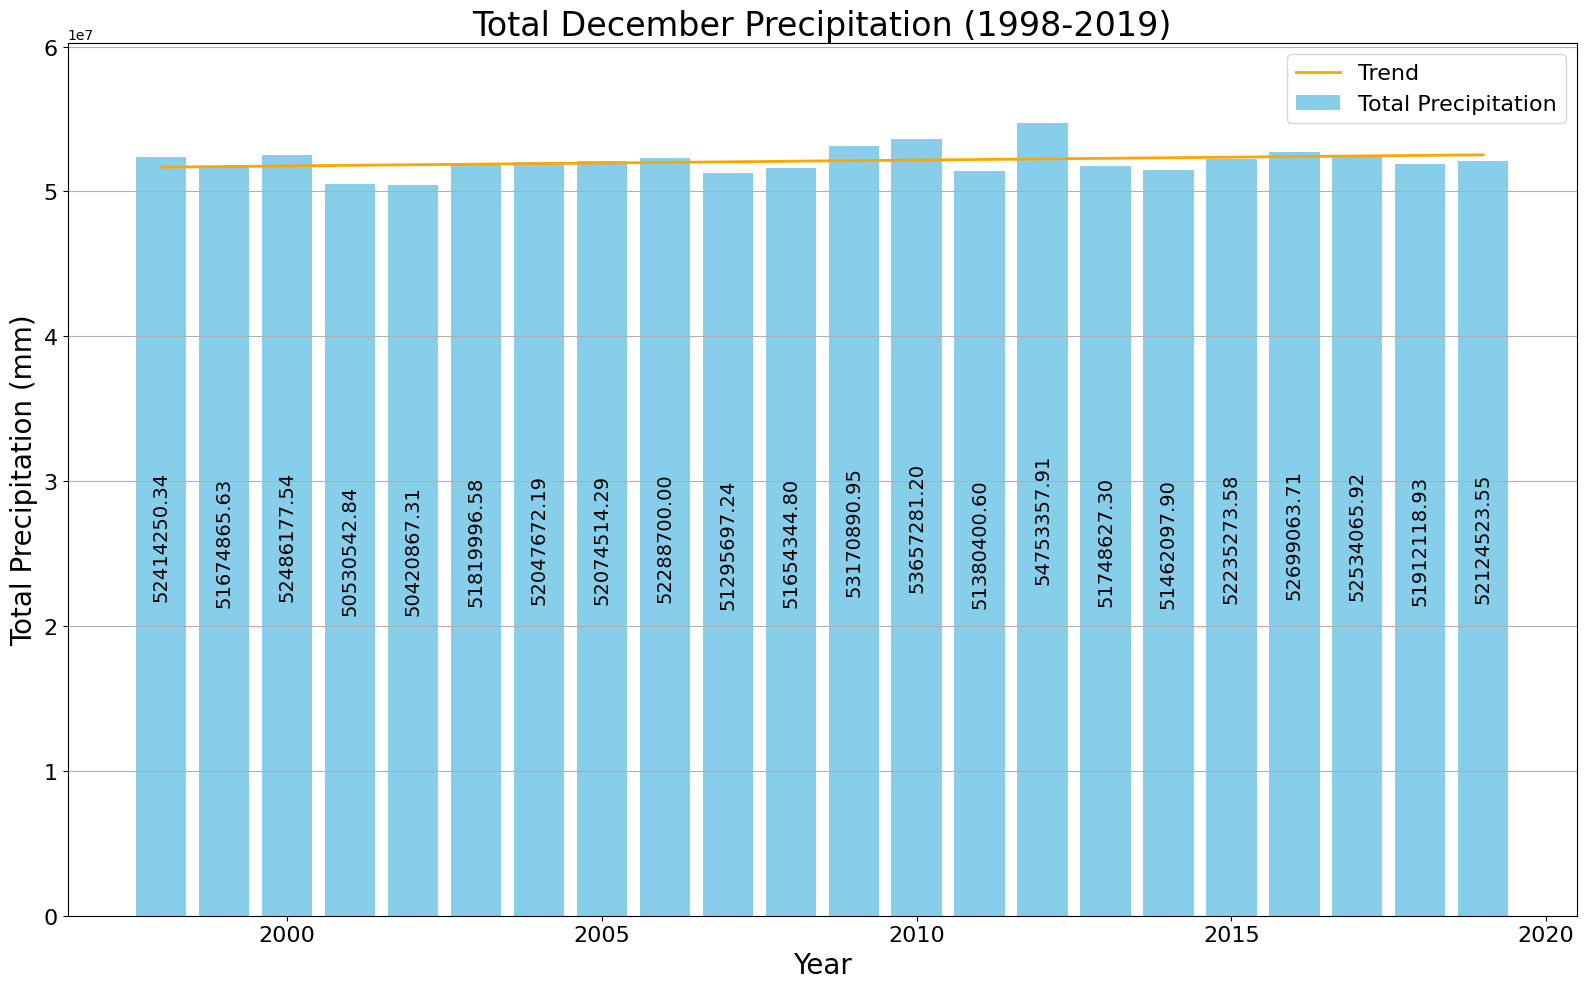

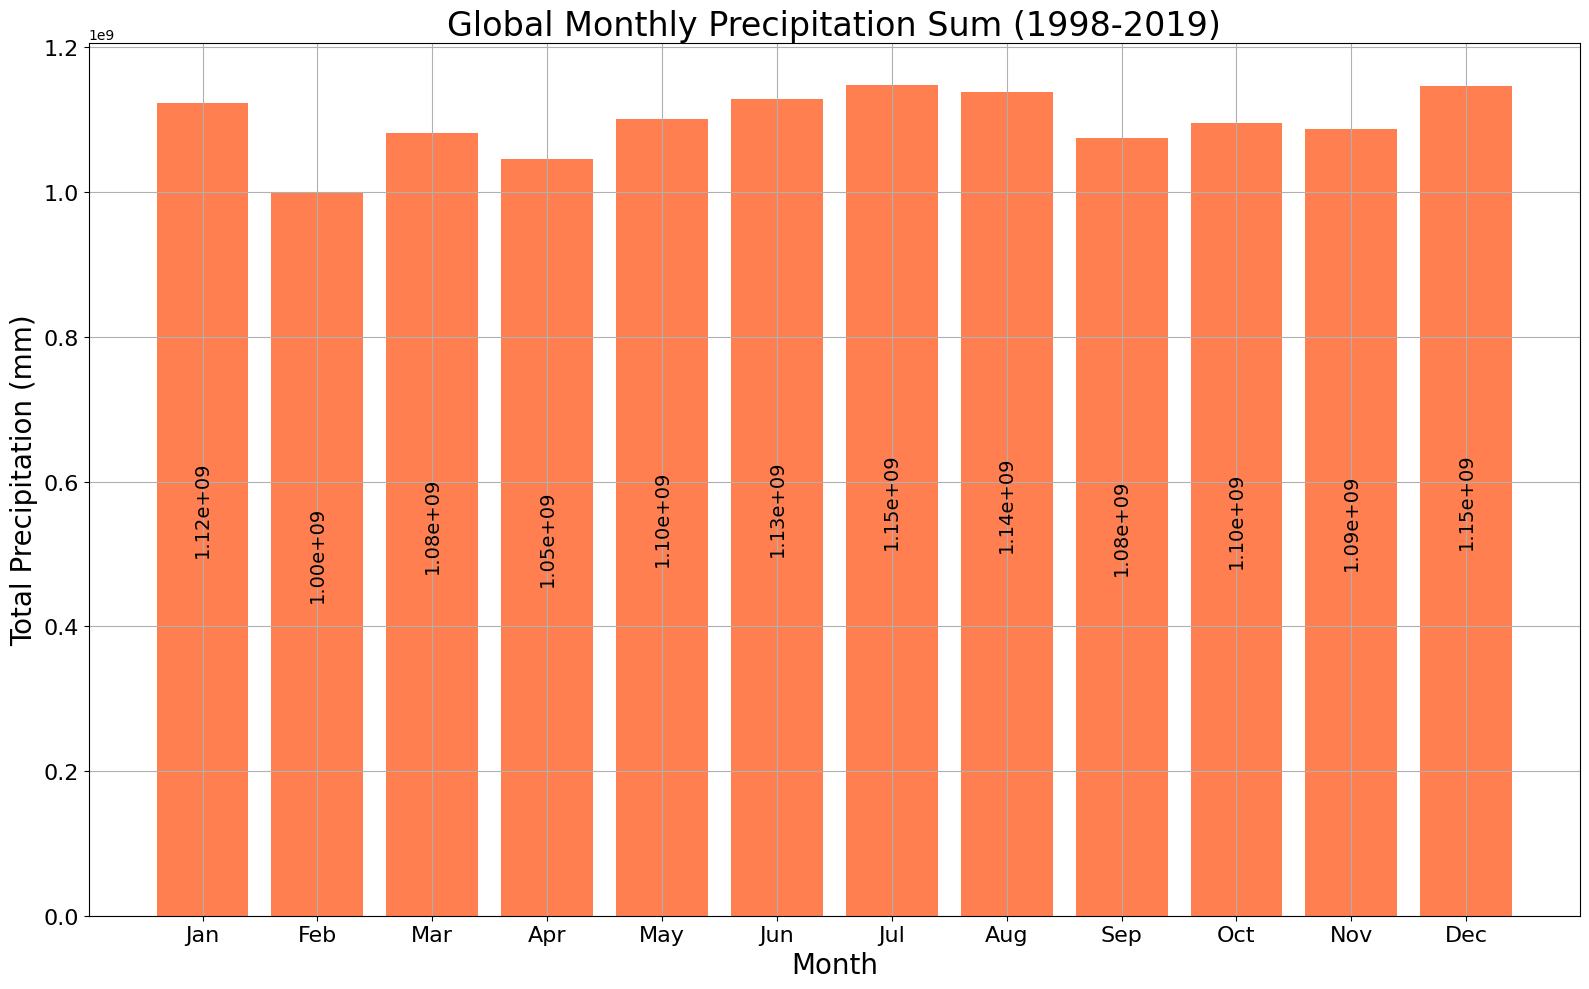

In [16]:
import os
import netCDF4 as nc
import numpy as np
import calendar
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm

# Path to your data directory
base_dir = r'C:/Users/Pooja/mon_data1'

# Years to process
years = range(1998, 2020)
months = range(1, 13)

# Fill value to mask
fill_value = -9999.900390625

# Initialize a list to store global monthly precipitation data
global_svt_monthly_data = []

# Function to calculate global monthly precipitation
def calculate_global_monthly_precipitation(year, month):
    # Construct the file paths for the month's data (7 and 7A)
    file_path_7A = os.path.join(base_dir, f'3B43.{year:04d}{month:02d}01.7A.HDF.nc4')
    file_path_7 = os.path.join(base_dir, f'3B43.{year:04d}{month:02d}01.7.HDF.nc4')
    
    # Choose the file to use (prioritize 7A if it exists)
    if os.path.exists(file_path_7A):
        dataset = nc.Dataset(file_path_7A)
    else:
        dataset = nc.Dataset(file_path_7)
    
    # Extract precipitation data
    precipitation = dataset.variables['precipitation'][:]
    
    # Mask the fill values
    precipitation = np.ma.masked_where(precipitation == fill_value, precipitation)
    
    # Convert precipitation rates (mm/hr) to total precipitation in mm for the month
    hours_in_month = 24 * calendar.monthrange(year, month)[1]
    monthly_total_precipitation = np.sum(precipitation * hours_in_month)
    
    return monthly_total_precipitation

# Calculate monthly precipitation and populate the list
for year in tqdm(years, desc="Processing years"):
    for month in months:
        total_precipitation = calculate_global_monthly_precipitation(year, month)
        global_svt_monthly_data.append({
            'Year': year,
            'Month': month,
            'TotalPrecipitation_mm': total_precipitation
        })

# Convert the list of dictionaries to a DataFrame
global_svt_monthly = pd.DataFrame(global_svt_monthly_data)

# Plotting total precipitation for each month across all years
for month in months:
    month_name = calendar.month_name[month]
    month_precipitation = global_svt_monthly[global_svt_monthly['Month'] == month]
    
    plt.figure(figsize=(16, 10))  # Increased the figure size to lengthen the y-axis
    bars = plt.bar(month_precipitation['Year'], month_precipitation['TotalPrecipitation_mm'], color='skyblue', label='Total Precipitation')
    
    # Calculate and plot trend line
    slope, intercept, _, _, _ = linregress(month_precipitation['Year'], month_precipitation['TotalPrecipitation_mm'])
    trend = slope * month_precipitation['Year'] + intercept
    plt.plot(month_precipitation['Year'], trend, color='orange', label='Trend', linewidth=2)
    
    plt.title(f'Total {month_name} Precipitation (1998-2019)', fontsize=24)  # Increased title fontsize
    plt.xlabel('Year', fontsize=20)  # Increased x-label fontsize
    plt.ylabel('Total Precipitation (mm)', fontsize=20)  # Increased y-label fontsize
    plt.ylim(0, max(month_precipitation['TotalPrecipitation_mm']) * 1.1)  # Adjusted y-axis to be a bit longer
    plt.grid(axis='y')
    plt.legend(fontsize=16)  # Increased legend font size

    # Display values inside each bar, placed in the middle of the bar height
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', fontsize=14, rotation=90)  # Adjusted va to 'center' for middle placement
    
    plt.xticks(fontsize=16)  # Increased x-tick label fontsize
    plt.yticks(fontsize=16)  # Increased y-tick label fontsize
    plt.tight_layout()
    plt.savefig(os.path.join(base_dir, f'total_{month_name.lower()}_precipitation_trend.png'), dpi=300)
    plt.show()

# Additional Plot: Global Monthly Precipitation Sum Across All 12 Months for 22 Years as a Bar Plot
monthly_sum = global_svt_monthly.groupby('Month')['TotalPrecipitation_mm'].sum()

plt.figure(figsize=(16, 10))
bars = plt.bar(months, monthly_sum, color='coral')  # Changed bar color to coral

# Display values inside each bar, placed in the middle of the bar height
for bar, yval in zip(bars, monthly_sum):
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2e}', ha='center', va='center', fontsize=14, rotation=90)  # Adjusted va to 'center' for middle placement

plt.title('Global Monthly Precipitation Sum (1998-2019)', fontsize=24)  # Increased title fontsize
plt.xlabel('Month', fontsize=20)  # Increased x-label fontsize
plt.ylabel('Total Precipitation (mm)', fontsize=20)  # Increased y-label fontsize
plt.grid(True)
plt.xticks(months, calendar.month_abbr[1:], fontsize=16)  # Increased x-tick label fontsize
plt.yticks(fontsize=16)  # Increased y-tick label fontsize
plt.tight_layout()
plt.savefig(os.path.join(base_dir, 'global_monthly_precipitation_all_years_barplot.png'), dpi=300)
plt.show()


# 3.2  Global Annual Precipitation Analysis

Processing years: 100%|████████████████████████████████████████████████████████████████| 22/22 [00:09<00:00,  2.22it/s]


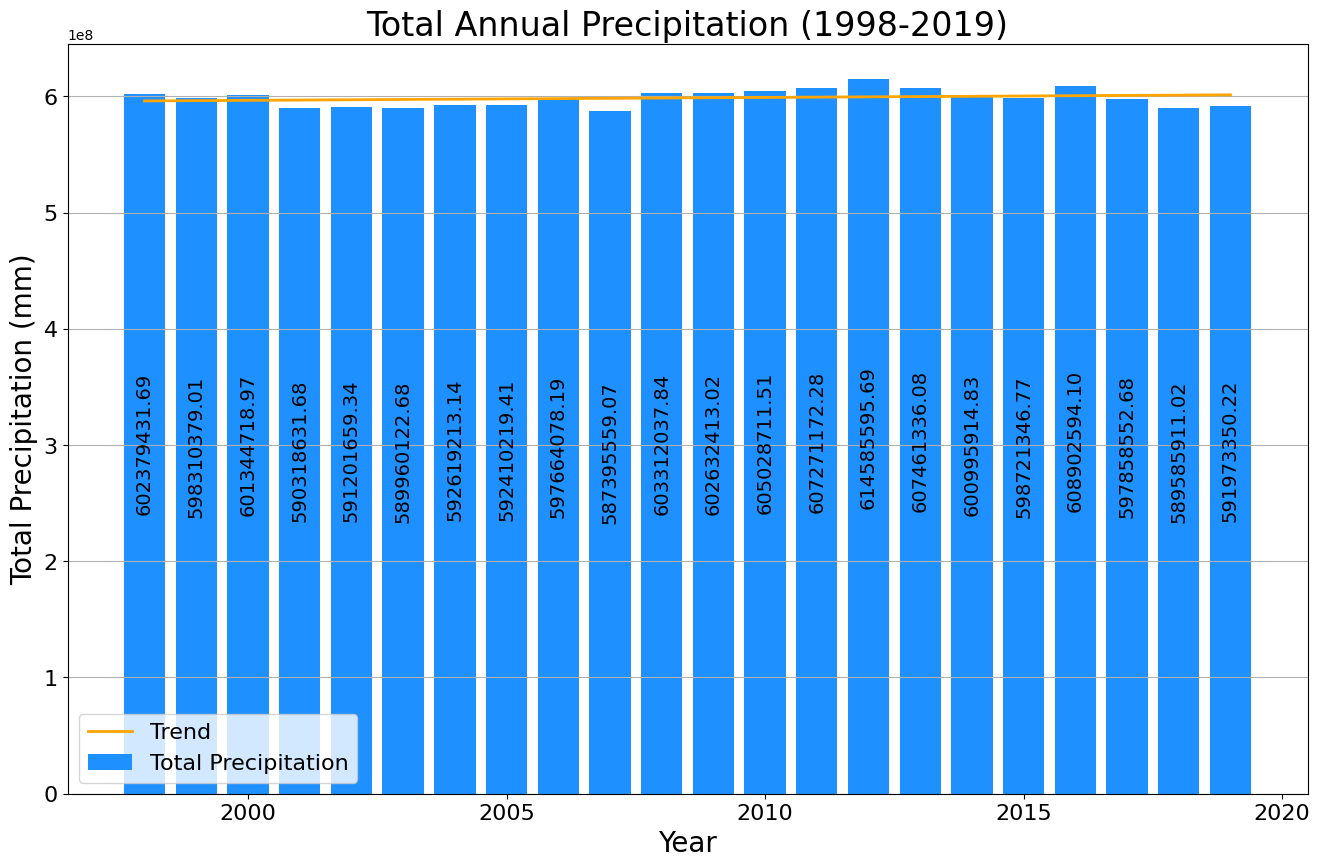

In [12]:
import os
import netCDF4 as nc
import numpy as np
import calendar  # Ensure this is imported for calendar-related functions
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm

# Path to your data directory
base_dir = r'C:/Users/Pooja/mon_data1'

# Years to process
years = range(1998, 2020)

# Fill value to mask
fill_value = -9999.900390625

# Initialize a list to store global annual precipitation data
global_svt_annual_data = []

# Function to calculate global monthly precipitation
def calculate_global_monthly_precipitation(year, month):
    # Construct the file paths for the month's data (7 and 7A)
    file_path_7A = os.path.join(base_dir, f'3B43.{year:04d}{month:02d}01.7A.HDF.nc4')
    file_path_7 = os.path.join(base_dir, f'3B43.{year:04d}{month:02d}01.7.HDF.nc4')
    
    # Choose the file to use (prioritize 7A if it exists)
    if os.path.exists(file_path_7A):
        dataset = nc.Dataset(file_path_7A)
    else:
        dataset = nc.Dataset(file_path_7)
    
    # Extract precipitation data
    precipitation = dataset.variables['precipitation'][:]
    
    # Mask the fill values
    precipitation = np.ma.masked_where(precipitation == fill_value, precipitation)
    
    # Convert precipitation rates (mm/hr) to total precipitation in mm for the month
    hours_in_month = 24 * calendar.monthrange(year, month)[1]
    monthly_total_precipitation = np.sum(precipitation * hours_in_month)
    
    return monthly_total_precipitation

# Calculate annual precipitation by summing up the monthly totals
for year in tqdm(years, desc="Processing years"):
    annual_total_precipitation = 0
    for month in range(1, 13):
        monthly_precipitation = calculate_global_monthly_precipitation(year, month)
        annual_total_precipitation += monthly_precipitation
    
    global_svt_annual_data.append({
        'Year': year,
        'TotalPrecipitation_mm': annual_total_precipitation
    })

# Convert the list of dictionaries to a DataFrame
global_svt_annual = pd.DataFrame(global_svt_annual_data)

# Plotting total annual precipitation
plt.figure(figsize=(16, 10))  # Increased figure size
bars = plt.bar(global_svt_annual['Year'], global_svt_annual['TotalPrecipitation_mm'], color='dodgerblue', label='Total Precipitation')

# Calculate and plot trend line
slope, intercept, _, _, _ = linregress(global_svt_annual['Year'], global_svt_annual['TotalPrecipitation_mm'])
trend = slope * global_svt_annual['Year'] + intercept
plt.plot(global_svt_annual['Year'], trend, color='orange', label='Trend', linewidth=2)

plt.title('Total Annual Precipitation (1998-2019)', fontsize=24)  # Increased title fontsize
plt.xlabel('Year', fontsize=20)  # Increased x-label fontsize
plt.ylabel('Total Precipitation (mm)', fontsize=20)  # Increased y-label fontsize
plt.grid(axis='y')
plt.legend(fontsize=16, loc='lower left')  # Moved legend to the lower left

# Display values inside each bar, positioned in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', fontsize=14, rotation=90)  # Text in the middle of the bar

# Manually adjust the layout to accommodate all elements
plt.xticks(fontsize=16)  # Increased x-tick label fontsize
plt.yticks(fontsize=16)  # Increased y-tick label fontsize
plt.subplots_adjust(bottom=0.15, top=0.9)

plt.savefig(os.path.join(base_dir, 'total_annual_precipitation_trend.png'), dpi=300)
plt.show()


# Grid points 

##### A grid refers to the combination of latitude and longitude points that form a matrix representing the earth's surface. 
##### The "latitude" array contains values ranging from -49.875 to 49.875. 
##### The "Longitude" array contains values ranging from -179.875 to 179.875.
##### Each combination of a latitude and a longitude value represents a unqiue grid points. 
##### For eg:  the pair (-49.875, -179.875) is one grid point, and (-49.875, -179.625) is another grid point.
##### In the matrix, precipitation[i, j] represents the precipitation value at the grid point formed by latitude[i] and longitude[j].
##### The TRMM monthly data is divided into grid cells that cover the specified geographical area. To understand how amny grid cells are present in the dataset, we can look at the dimensions of the longitude (nlon) and latitude (nlat) variables. 

##### To calculate the total number of grid cells, we multiply the number of longitudes by the number of latitudes:
 Total number of grid cells = 1440 * 400 = 5,76,000

##### So there are 5,76,000 grid cells in the TRMM monthly data. 

Each grid cell represents a geographical area with a resolution of 0.25 degrees in both latitude and longitude. 


# Understanding Fill values and Zero Values 

##### Fill value: This is a special value used in NetCDF files to represent missing or invalid data. In your dataset, the _FillValue is -9999.900390625.
##### Zero Precipitation: A value of 0 in the precipitation dataset typically means that there was no rainfall recorded at that grid point and time.
##### Difference from Fill Values: A zero value is a legitimate measurement indicating no rainfall, whereas a fill value indicates that the data is missing or invalid.

##### Many regions can experience no rainfall during certain periods, especially in arid or semi-arid regions, or during dry seasons. Therefore, zero values in the dataset are valid and indicate actual observations of no rainfall. 

##### Zero Values: Should be treated as valid data indicating no rainfall.
##### Fill Values: Should be masked or handled appropriately to indicate missing data.

# Mask Fill values

##### Fill values are placeholders for missing or invalid data. 
##### When performing calculations (e.g., sums, averages), including fill values can lead to incorrect results.
##### Fill values are typically set to extreme numbers (e.g., -9999.900390625) that do not represent realistic data points.
##### Masking fill values ensures that they are excluded from any mathematical operations or statistical analyses.

# 3.3 Global Spatial Plots

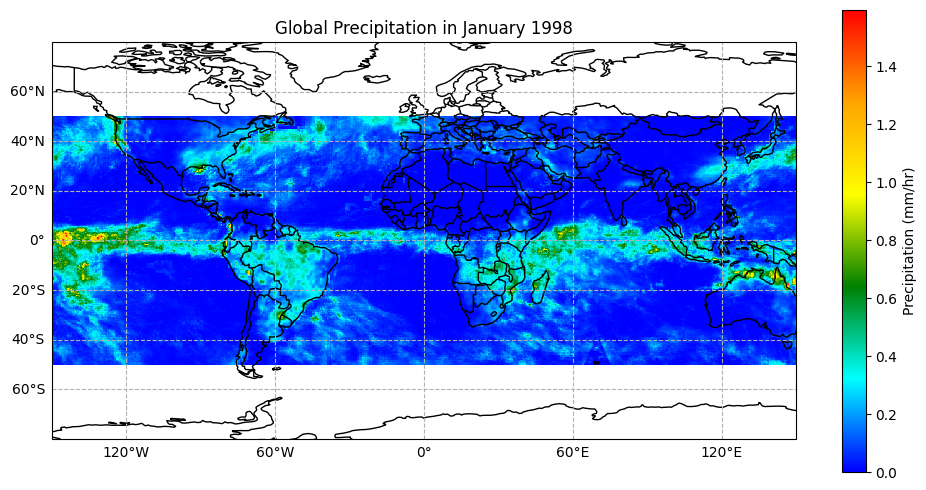

In [27]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# Function to load NetCDF data
def load_nc_data(file_path):
    dataset = nc.Dataset(file_path)
    return dataset

# Function to extract precipitation data
def extract_precipitation_data(dataset):
    precipitation = dataset.variables['precipitation'][:]
    return precipitation

# Function to extract longitude and latitude data
def extract_lon_lat_data(dataset):
    lon = dataset.variables['nlon'][:]
    lat = dataset.variables['nlat'][:]
    return lon, lat

# Path to the specific file for January 1998
precipitation_file_path = r'C:\Users\Pooja\mon_data1\3B43.19980101.7.HDF.nc4'

# Load the dataset
dataset = load_nc_data(precipitation_file_path)

# Extract precipitation data
precipitation = extract_precipitation_data(dataset)

# Extract longitude and latitude data
lon, lat = extract_lon_lat_data(dataset)

# Plotting the precipitation data with Cartopy
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Mask _FillValue
fill_value = dataset.variables['precipitation']._FillValue
precipitation = np.ma.masked_where(precipitation == fill_value, precipitation)

lon = lon.data
lat = lat.data

# Create a custom colormap with a broad range of distinguishable colors
colors = [(0, "blue"), (0.2, "cyan"), (0.4, "green"), (0.6, "yellow"), (0.8, "orange"), (1.0, "red")]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Create a color scale normalization to enhance distinguishability
norm = mcolors.Normalize(vmin=np.nanmin(precipitation), vmax=np.nanmax(precipitation))

# Plot the data using the custom colormap and normalization
lon, lat = np.meshgrid(lon, lat)
cs = ax.pcolormesh(lon, lat, precipitation.T, shading='auto', cmap=custom_cmap, norm=norm, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(cs, orientation='vertical', pad=0.05)
cbar.set_label('Precipitation (mm/hr)')

ax.set_extent([-150, 150, -80, 80], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Global Precipitation in January 1998')
plt.show()


##### January 1988 was a period of strong EL nino , a climate phenomenon that affects the gloabl weather patterns and can cause ususally higher precipitation in certain regions, such as the western coast of south america. 

##### Such short-term phenomena may not be as apparent in the long-term average data. 

Number of masked values: 13175


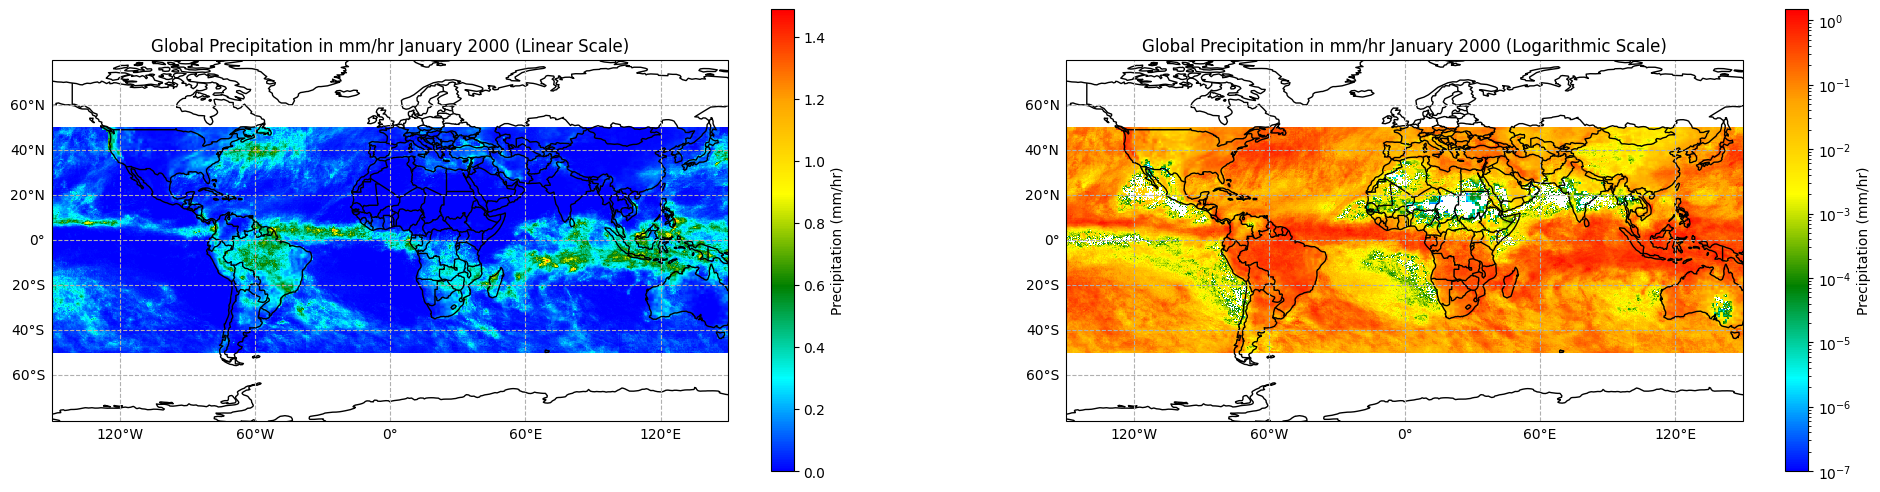

In [2]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# Function to load NetCDF data
def load_nc_data(file_path):
    dataset = nc.Dataset(file_path)
    return dataset

# Function to extract precipitation data
def extract_precipitation_data(dataset):
    precipitation = dataset.variables['precipitation'][:]
    return precipitation

# Function to extract longitude and latitude data
def extract_lon_lat_data(dataset):
    lon = dataset.variables['nlon'][:]
    lat = dataset.variables['nlat'][:]
    return lon, lat

# Path to the specific file for January 1998
precipitation_file_path = r'C:\Users\Pooja\mon_data1\3B43.20000101.7A.HDF.nc4'

# Load the dataset
dataset = load_nc_data(precipitation_file_path)

# Extract precipitation data
precipitation = extract_precipitation_data(dataset)

# Extract longitude and latitude data
lon, lat = extract_lon_lat_data(dataset)

# Mask _FillValue
fill_value = dataset.variables['precipitation']._FillValue
precipitation = np.ma.masked_where(precipitation == fill_value, precipitation)

# Set a minimum threshold to avoid zero or negative values for log scale
min_valid_value = 0.0000001  # Adjust this value as needed
precipitation_log = np.ma.masked_where(precipitation < min_valid_value, precipitation)

# Check and print the number of masked values
print("Number of masked values:", np.ma.count_masked(precipitation_log))

# Convert lon and lat to regular arrays
lon = lon.data
lat = lat.data

# Create custom colormaps with a broad range of distinguishable colors
colors = [(0, "blue"), (0.2, "cyan"), (0.4, "green"), (0.6, "yellow"), (0.8, "orange"), (1.0, "red")]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Create color scale normalizations for linear and logarithmic scales
norm_linear = mcolors.Normalize(vmin=np.ma.min(precipitation), vmax=np.ma.max(precipitation))
log_norm = LogNorm(vmin=min_valid_value, vmax=np.ma.max(precipitation_log))

# Plotting the precipitation data with Cartopy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot linear scale
ax1.set_global()
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
cs1 = ax1.pcolormesh(lon_mesh, lat_mesh, precipitation.T, shading='auto', cmap=custom_cmap, norm=norm_linear, transform=ccrs.PlateCarree())
cbar1 = plt.colorbar(cs1, ax=ax1, orientation='vertical', pad=0.05)
cbar1.set_label('Precipitation (mm/hr)')
ax1.set_extent([-150, 150, -80, 80], crs=ccrs.PlateCarree())
gl1 = ax1.gridlines(draw_labels=True, linestyle='--')
gl1.top_labels = False
gl1.right_labels = False
ax1.set_title('Global Precipitation in mm/hr January 2000 (Linear Scale)')

# Plot logarithmic scale
ax2.set_global()
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS)
cs2 = ax2.pcolormesh(lon_mesh, lat_mesh, precipitation_log.T, shading='auto', cmap=custom_cmap, norm=log_norm, transform=ccrs.PlateCarree())
cbar2 = plt.colorbar(cs2, ax=ax2, orientation='vertical', pad=0.05)
cbar2.set_label('Precipitation (mm/hr)')
ax2.set_extent([-150, 150, -80, 80], crs=ccrs.PlateCarree())
gl2 = ax2.gridlines(draw_labels=True, linestyle='--')
gl2.top_labels = False
gl2.right_labels = False
ax2.set_title('Global Precipitation in mm/hr January 2000 (Logarithmic Scale)')

plt.show()
